# Chapter 4. Linear Methods for Classification
# $\S$ 4.1. Introduction

Since our predictor $G(x)$ takes values in a discrete set $\mathcal{G}$, we can always divide the input space into a collection of regions labeled according to the classification. We saw in Chapter 2 that the boundaries of these regions can be rough or smooth, depending on the prediction function. For an important class of procedures, these *decision boundaries* are linear; this is what we will mean by linear methodds for classification.

### Linear regression

In Chapter 2 we fit linear regression models to the class indicator variable, and classify to the largest fit. Suppose there are $K$ classes labeled $1,\cdots,K$, and the fitted linear model for the $k$th indicator response variable is

\begin{equation}
\hat{f}_k(x) = \hat\beta_{k0} + \hat\beta_k^Tx.
\end{equation}

The decision boundary between class $k$ and $l$ is that set of points

\begin{equation}
\left\lbrace x: \hat{f}_k(x) = \hat{f}_l(x) \right\rbrace = \left\lbrace x: (\hat\beta_{k0}-\hat\beta_{l0}) + (\hat\beta_k-\hat\beta_l)^Tx = 0 \right\rbrace,
\end{equation}

which is an affine set or hyperplane. Since the same is true for any pair of classes, the input space is divided into regions of constant classification, with piecewise hyperplanar decision boundaries.

### Discriminant function

The regression approach is a member of a class of methods that model *discriminant functions* $\delta_k(x)$ for each class, and then classify $x$ to the class with the largest value for its discriminant function. Methods that model the posterior probabilities $\text{Pr}(G=k|X=x)$ are also in this class. Clearly, if either the $\delta_k(x)$ or $\text{Pr}(G=k|X=x)$ are linear in $x$, then the decision boundaries will be linear.

### Logit transformation

Actually, all we require is that some monotone transformation of $\delta_k$  or $\text{Pr}(G=k|X=x)$ be linear for the decision boundaries to be linear. For example, if there are two classes, a popular model for the posterior probabilities is

\begin{align}
\text{Pr}(G=1|X=x) &= \frac{\exp(\beta_0+\beta^Tx)}{1+\exp(\beta_0+\beta^Tx)},\\
\text{Pr}(G=2|X=x) &= \frac{1}{1+\exp(\beta_0+\beta^Tx)},\\
\end{align}

where the monotone transformation is the *logit* transformation

\begin{equation}
\log\frac{p}{1-p},
\end{equation}

and in fact we see that

\begin{equation}
\log\frac{\text{Pr}(G=1|X=x)}{\text{Pr}(G=2|X=x)} = \beta_0 + \beta^Tx.
\end{equation}

The decision boundary is the set of points for which the *log-odds* are zero, and this is a hyperplane defined by

\begin{equation}
\left\lbrace x: \beta_0+\beta^Tx = 0 \right\rbrace.
\end{equation}

We discuss two very popular but different methods that result in linear log-odds or logits: Linear discriminant analysis and linear logistic regression. Although they differ in their derivation, the essential difference between them is in the way the lineaer function is fit to the training data.

### Separating hyperplanes

A more direct approach is to explicitly model the boundaries between the classes as linear. For a two-class problem, this amounts to modeling the decision boundary as a hyperplane; a normal vector and a cut-point.

We will look at two methods that explicitly look for "separating hyperplanes".

1. The well-known *perceptron* model of Rosenblatt (1958), with an algorithm that finds a separating hyperplane in the training data, if one exists.
2. Vapnik (1996) finds an *optimally separating hyperplane* if one exists, else finds a hyperplane that minimizes some measure of overlap in the training data.

We treat separable cases here, and defer the nonseparable case to Chapter 12.

### Scope for generalization

We can expand the input by including their squares $X_1^2,X_2^2,\cdots$, and cross-products $X_1X_2,\cdots$, thereby adding $p(p+1)/2$ additional variables. Linear functions in the augmented space map down to quadratic decision boundaires. FIGURE 4.1 illustrates the idea.

This approach can be used with any basis transformation $h(X): \mathbb{R}^p\mapsto\mathbb{R}^q$ with $q > p$, and will be explored in later chapters.

# $\S$ 4.2. Linear Regression of an Indicator Matrix

Here each of the response categories are coded via an indicator variable. Thus if $\mathcal{G}$ has $K$ classes, there will be $K$ such indicators $Y_k$, $k=1,\cdots,K$, with

\begin{equation}
Y_k = 1 \text{ if } G = k \text{ else } 0.
\end{equation}

These are collected together in a vector $Y=(Y_1,\cdots,Y_k)$, and the $N$ training instances of these form an $N\times K$ *indicator response matrix* $\mathbf{Y}$, which is a matrix of $0$'s and $1$'s, with each row having a single $1$.

We fit a linear regression model to each of the columns of $\mathbf{Y}$ simultaneously, and the fit is given by

$$\begin{equation}
\underset{N\times K}{\hat{\mathbf{Y}}} = \mathbf{X}\left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{Y} = \underset{N\times (p+1)}{\mathbf{X}}\underset{(p+1)\times K}{\hat{\mathbf{B}}}
\end{equation}$$

Note that we have a coefficient vector for each response columns $\mathbf{y}_k$, and hence a $(p+1)\times K$ coefficient matrix $\hat{\mathbf{B}} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{Y}$. Here $\mathbf{X}$ is the model matrix with $p+1$ columns with a leading columns of $1$'s for the intercept.

A new observation with input $x$ is classified as follows:

* Compute the fitted output $\hat{f}(x)^T = (1, x^T)\hat{\mathbf{B}}$, a $K$ vector.
* Identify the largest component and classify accordingly:  

\begin{equation}
\hat{G}(x) = \arg\max_{k\in\mathcal{G}} \hat{f}_k(x).
\end{equation}

### Rationale

One rather formal justification is to view the regression as an estimate of conditional expectation. For the random variable $Y_k$, 

\begin{equation}
\text{E}(Y_k|X=x) = \text{Pr}(G=k|X=x),
\end{equation}

so conditional expectation of each $Y_k$ seems a sensible goal.

The real issue is: How good an approximation to conditional expectation is the rather rigid linear regression model? Alternatively, are the $\hat{f}_k(x)$ reasonable estimates of the posterior probabilities $\text{Pr}(G=k|X=x)$, and more importantly, does this matter?

It is quite straightforward to verify that, as long as the model has an intercept,

\begin{equation}
\sum_{k\in\mathcal{G}}\hat{f}_k(x) = 1.
\end{equation}

However it is possible that $\hat{f}_k(x) < 0$ or $\hat{f}_k(x) > 1$, and typically some are. This is a consequence of the rigid nature of linear regression, especially if we make predictions outside the hull of the training data. These violations in themselves do not guarantee that this approach will not work, and in fact on many problems it gives similar results to more standard linear methods for classification.

If we allow linear regression onto basis expansions $h(X)$ of the inputs, this approach can lead to consistent estimates of the probabilities. As the size of the training set $N$ grows bigger, we adaptively include more basis elements so that linear regression onto these basis functions approaches conditional expectation. We discuss such approaches in Chapter 5.

### A more simplistic viewpoint

Denote $t_k$ as the $k$th column of $\mathbf{I}_K$, the $K\times K$ identity matrix, then a more simplistic viewpoint is to construct *targets* $t_k$ for each class. The response vector ($i$th row of $\mathbf{Y}$)

\begin{equation}
y_i = t_k \text{ if } g_i = k.
\end{equation}

We might then fit the linear model by least squares: The criterion is a sum-of-squared Euclidean distances of the fitted vectors from their targets.

\begin{equation}
\min_{\mathbf{B}} \sum_{i=1}^N \left\| y_i - \left[ (1,x_i^T)\mathbf{B} \right]^T \right\|^2.
\end{equation}

Then a new observation is classified by computing its fitted vector $\hat{f}(x)$ and classifying to the closest target:

\begin{equation}
\hat{G}(x) = \arg\min_k \left\| \hat{f}(x)-t_k \right\|^2.
\end{equation}

This is exactly the same as the previous linear regression approach. Below are the reasons:

1. The sum-of-squared-norm criterion is exactly the same with multiple response linear regression, just viewed slightly differently. The component decouple and can be rearranged as a separate linear model for each element because there is nothing in the model that binds the diferent response together.

2. The closest target classification rule is exactly the same as the maximum fitted component criterion.

### Masked class with the regression approach

There is a serious problem with the regression approach when the number of class $K\ge 3$, especially prevalent when $K$ is large. Because of the rigid nature of the regression model, classes can be *masked* by others. FIGURE 4.2 illustrates an extreme situation when $K=3$. The three classes are perfectly separated by linear decision boundaries, yet linear regression misses the middle class completely.

In [1]:
import scipy
import scipy.linalg
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import math
np.set_printoptions(precision=4, suppress=True)

%load_ext rpy2.ipython

In [6]:
"""FIGURE 4.2. (Left) The data come from three classes in R^2 and are easily
separated by linear decision boundaries. This plot shows the boundaires
found by linear regression of the indicator response variables. The middle
class is completely masked (never dominates).

Instead of drawing the decision boundary, showing the classified data is
enough to illustrate masking phenomenon."""

# Make the simulation data
size_cluster = 300
mat_cov = np.eye(2)
cluster1 = np.random.multivariate_normal([-4, -4], mat_cov, size_cluster)
cluster2 = np.random.multivariate_normal([0, 0], mat_cov, size_cluster)
cluster3 = np.random.multivariate_normal([4, 4], mat_cov, size_cluster)
target1, target2, target3 = np.eye(3)
print(target1, target2, target3, type(target1))
mat_x0 = np.concatenate((cluster1, cluster2, cluster3))
mat_x = np.hstack((np.ones((size_cluster*3, 1)), mat_x0))
mat_y = np.vstack((np.tile(target1, (size_cluster, 1)),
                      np.tile(target2, (size_cluster, 1)),
                      np.tile(target3, (size_cluster, 1))))
print(mat_x.shape)
print(mat_y.shape)

# Multiple linear regression
mat_beta = scipy.linalg.solve(mat_x.T @ mat_x, mat_x.T @ mat_y)
mat_y_hat = mat_x @ mat_beta
#sum(axis=1) sum the row
assert np.allclose(mat_y_hat.sum(axis=1), 1)
print(mat_y_hat)
#argmax(axis=1) Returns the indices of the maximum values along the row.
idx_classified_y = mat_y_hat.argmax(axis=1)
print(idx_classified_y, idx_classified_y.size)

classified_cluster1 = mat_x0[idx_classified_y == 0]
classified_cluster2 = mat_x0[idx_classified_y == 1]
classified_cluster3 = mat_x0[idx_classified_y == 2]

[1. 0. 0.] [0. 1. 0.] [0. 0. 1.] <class 'numpy.ndarray'>
(900, 3)
(900, 3)
[[ 0.79118865  0.33248045 -0.1236691 ]
 [ 0.85014483  0.33261569 -0.18276052]
 [ 0.78423187  0.33116915 -0.11540103]
 ...
 [-0.21401706  0.3339582   0.88005886]
 [-0.21901358  0.33362912  0.88538446]
 [-0.06011645  0.33403974  0.72607671]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 0 2 2 2 2 2 0 2 0 2 0 2 2 0 0 0 0 2 0 2 2 2 2 2 2 0 2 2 2 0
 2 0 0 2 0

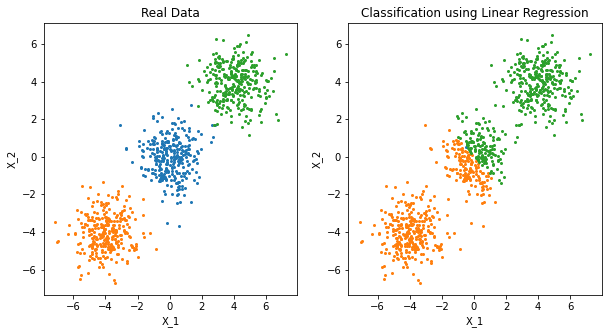

In [7]:
fig42 = plt.figure(0, figsize=(10, 5))
ax1 = fig42.add_subplot(1, 2, 1)
ax1.plot(cluster1[:,0], cluster1[:,1], 'o', color='C1', markersize=2)
ax1.plot(cluster2[:,0], cluster2[:,1], 'o', color='C0', markersize=2)
ax1.plot(cluster3[:,0], cluster3[:,1], 'o', color='C2', markersize=2)
ax1.set_xlabel('X_1')
ax1.set_ylabel('X_2')
ax1.set_title('Real Data')

ax2 = fig42.add_subplot(1, 2, 2)
ax2.plot(classified_cluster1[:,0], classified_cluster1[:,1], 'o', color='C1', markersize=2)
ax2.plot(classified_cluster2[:,0], classified_cluster2[:,1], 'o', color='C0', markersize=2)
ax2.plot(classified_cluster3[:,0], classified_cluster3[:,1], 'o', color='C2', markersize=2)
ax2.set_xlabel('X_1')
ax2.set_ylabel('X_2')
ax2.set_title('Classification using Linear Regression')
plt.show()

FIGURE 4.2. The data come from three classes in IR2 and are easily separated by linear decision boundaries. The right plot shows the boundaries found by linear regression of the indicator response variables. The middle class is completely masked (never dominates).

[1] "sigma"
      [,1]  [,2]
[1,] 0.005 0.000
[2,] 0.000 0.005


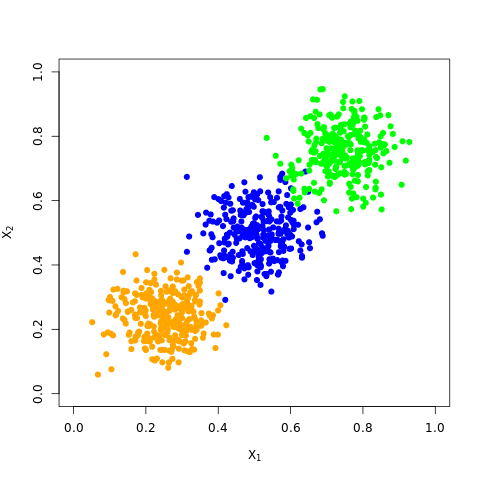

In [10]:
%%R

## generate data and reproduce figure 4.2
mu = c(0.25, 0.5, 0.75)
sigma = 0.005*matrix(c(1, 0,
                 0, 1), 2, 2)
print("sigma")
print(sigma)
library(MASS)
set.seed(1650)
N = 300
X1 = mvrnorm(n = N, c(mu[1], mu[1]), Sigma = sigma)
X2 = mvrnorm(n = N, c(mu[2], mu[2]), Sigma = sigma)
X3 = mvrnorm(n = N, c(mu[3], mu[3]), Sigma = sigma)
X = rbind(X1, X2, X3)


plot(X1[,1],X1[,2],col="orange", xlim = c(0,1),ylim = c(0,1), pch=19,
     xlab = expression(X[1]), ylab = expression(X[2]))
points(X2[,1],X2[,2],col="blue", pch=19)
points(X3[,1],X3[,2],col="green", pch=19)

In [12]:
"""FIGURE 4.3. The effects of masking on linear regression in R for a three
class problem.

The rug plot at the base indicates the positions and class membership of
each observation. The three curves in each panel are the fitted regression
to the three-class indicator variables.

We see on the left that the middle class line is horizontal and its fitted
values are never dominant! Thus, observations from class 2 are classified
either as class 1 or 3."""
# Make the simulation data
size_cluster = 300
# np.random.normal() draw random samples from a normal (Gaussian) distribution with mean -4, 0, 4
cluster1 = np.random.normal(-4, size=(size_cluster,1))
cluster2 = np.random.normal(0, size=(size_cluster,1))
cluster3 = np.random.normal(4, size=(size_cluster,1))
target1, target2, target3 = np.eye(3)
print(target1, target2, target3, type(target1))
mat_x0 = np.concatenate((cluster1, cluster2, cluster3))
#mat_x is 900X2 matrix
mat_x = np.hstack((np.ones((size_cluster*3, 1)), mat_x0))
#mat_y is 900X3 matrix
mat_y = np.vstack((np.tile(target1, (size_cluster, 1)),
                      np.tile(target2, (size_cluster, 1)),
                      np.tile(target3, (size_cluster, 1))))

# Multiple linear regression with degree 1, mat_beta is 2X3 matrix
mat_beta = scipy.linalg.solve(mat_x.T @ mat_x, mat_x.T @ mat_y)
# mat_y_hat is 900X3 matrix
mat_y_hat = mat_x @ mat_beta
print("mat_y_hat")
print(mat_y_hat)
idx_classified_y = mat_y_hat.argmax(axis=1)

[1. 0. 0.] [0. 1. 0.] [0. 0. 1.] <class 'numpy.ndarray'>
mat_y_hat
[[ 0.81458631  0.33179161 -0.14637792]
 [ 0.82090514  0.33177137 -0.15267651]
 [ 0.85306795  0.33166833 -0.18473629]
 ...
 [-0.13503942  0.33483379  0.80020562]
 [-0.08154107  0.33466241  0.74687866]
 [-0.05041249  0.33456268  0.71584981]]


mat_y2_hat
[[ 0.91692888  0.12167828 -0.03860716]
 [ 0.93141869  0.1048827  -0.03630139]
 [ 1.00683423  0.01598011 -0.02281434]
 ...
 [-0.04129243  0.14236755  0.89892488]
 [-0.05170661  0.27341109  0.77829552]
 [-0.05422768  0.34239542  0.71183226]]


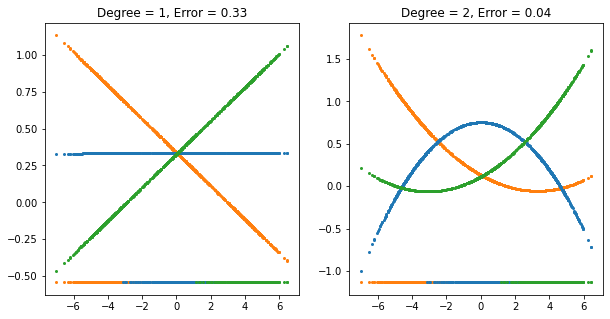

In [14]:
fig43 = plt.figure(1, figsize=(10, 5))
ax1 = fig43.add_subplot(1, 2, 1)
ax1.plot(mat_x0, mat_y_hat[:, 0], 'o', color='C1', markersize=2)
ax1.plot(mat_x0, mat_y_hat[:, 1], 'o', color='C0', markersize=2)
ax1.plot(mat_x0, mat_y_hat[:, 2], 'o', color='C2', markersize=2)
y_floor, _ = ax1.get_ylim()
ax1.plot(cluster1, [y_floor]*size_cluster, 'o', color='C1', markersize=2)
ax1.plot(cluster2, [y_floor]*size_cluster, 'o', color='C0', markersize=2)
ax1.plot(cluster3, [y_floor]*size_cluster, 'o', color='C2', markersize=2)
ax1.set_title('Degree = 1, Error = 0.33')

# Multiple linear regression with degree 2
# mat_x2 is 900X3 matrix
mat_x2 = np.hstack((mat_x, mat_x0*mat_x0))
# mat_beta2 is 3X3 matrix
mat_beta2 = np.linalg.solve(mat_x2.T @ mat_x2, mat_x2.T @ mat_y)
# mat_y2_hat is 900X3 matrix
mat_y2_hat = mat_x2 @ mat_beta2
print("mat_y2_hat")
print(mat_y2_hat)

ax2 = fig43.add_subplot(1, 2, 2)
ax2.plot(mat_x0, mat_y2_hat[:, 0], 'o', color='C1', markersize=2)
ax2.plot(mat_x0, mat_y2_hat[:, 1], 'o', color='C0', markersize=2)
ax2.plot(mat_x0, mat_y2_hat[:, 2], 'o', color='C2', markersize=2)
y_floor, _ = ax2.get_ylim()
ax2.plot(cluster1, [y_floor]*size_cluster, 'o', color='C1', markersize=2)
ax2.plot(cluster2, [y_floor]*size_cluster, 'o', color='C0', markersize=2)
ax2.plot(cluster3, [y_floor]*size_cluster, 'o', color='C2', markersize=2)
ax2.set_title('Degree = 2, Error = 0.04')
plt.show()

FIGURE 4.3. The effects of masking on linear regression in IR for a three-class
problem. The rug plot at the base indicates the positions and class membership of
each observation. The three curves in each panel are the fitted regressions to the
three-class indicator variables; for example, for the blue class, $y_{blue}$ is 1 for the
blue observations, and 0 for the green and orange. The fits are linear and quadratic
polynomials. Above each plot is the training error rate. The Bayes error rate is
0.025 for this problem, as is the LDA error rate.

In [27]:
%%R
## generate data and reproduce figure 4.3
mu = c(0.25, 0.5, 0.75)
sigma = 0.005*matrix(c(1, 0,
                 0, 1), 2, 2)
library(MASS)
set.seed(1650)
N = 300
X1 = mvrnorm(n = N, c(mu[1], mu[1]), Sigma = sigma)
X2 = mvrnorm(n = N, c(mu[2], mu[2]), Sigma = sigma)
X3 = mvrnorm(n = N, c(mu[3], mu[3]), Sigma = sigma)
# X is 900X2 matrix
X = rbind(X1, X2, X3)


Call:
lm(formula = Y1 ~ X.proj)

Coefficients:
(Intercept)       X.proj  
      1.283       -1.901  

(Intercept)      X.proj 
   1.282927   -1.901234 

Call:
lm(formula = Y2 ~ X.proj)

Coefficients:
(Intercept)       X.proj  
    0.31258      0.04155  

(Intercept)      X.proj 
 0.31257989  0.04155158 

Call:
lm(formula = Y3 ~ X.proj)

Coefficients:
(Intercept)       X.proj  
    -0.5955       1.8597  

(Intercept)      X.proj 
 -0.5955073   1.8596820 


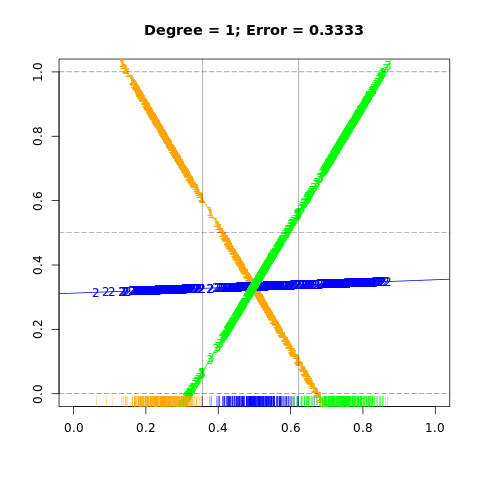

In [31]:
%%R

# X.proj is projection to [0.5,0.5]
X.proj = rowMeans(X)
## fit as in figure 4.3
## consider orange
Y1 = c(rep(1, N), rep(0, N*2))
## blue
Y2 = c(rep(0, N), rep(1, N), rep(0, N))
## green
Y3 = c(rep(0, N), rep(0, N), rep(1, N))
## regression
m1 = lm(Y1~X.proj)
print(m1)
print(coef(m1))
pred1 = as.numeric(fitted(m1)[order(X.proj)])
m2 = lm(Y2~X.proj)
print(m2)
print(coef(m2))
pred2 = as.numeric(fitted(m2)[order(X.proj)])
m3 = lm(Y3~X.proj)
print(m3)
print(coef(m3))
pred3 = as.numeric(fitted(m3)[order(X.proj)])
c1 = which(pred1 <= pred2)[1] 
c2 = min(which(pred3 > pred2)) 
# class 1: 1 ~ c1
# class 2: c1+1 ~ c2
# class 3: c2+1 ~ end
# actually, c1 = c2
err1 = (abs(c2 - 2*N) + abs(c1 - N))/(3*N)

## reproduce figure 4.3 left
plot(0, 0, type = "n", 
     xlim = c(0, 1), ylim = c(0,1), xlab = "", ylab = "",
     main = paste0("Degree = 1; Error = ", round(err1, digits = 4)))
abline(coef(m1), col = "orange")
abline(coef(m2), col = "blue")
abline(coef(m3), col = "green")
points(X.proj, fitted(m1), pch="1", col="orange")
points(X.proj, fitted(m2), pch = "2", col = "blue")
points(X.proj, fitted(m3), pch = "3", col = "green")
rug(X.proj[1:N], col = "orange")
rug(X.proj[(N+1):(2*N)], col = "blue")
rug(X.proj[(2*N+1):(3*N)], col = "green")
abline(h=c(0.0, 0.5, 1.0), lty=5, lwd = 0.4)
abline(v=c(sort(X.proj)[N], sort(X.proj)[N*2]), lwd = 0.4)


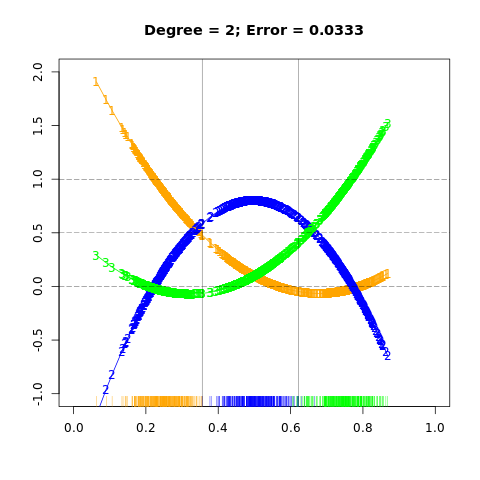

In [35]:
%%R
## polynomial regression
pm1 = lm(Y1~X.proj+I(X.proj^2))
pm2 = lm(Y2~X.proj+I(X.proj^2))
pm3 = lm(Y3~X.proj+I(X.proj^2))
## error rate for figure 4.3 right
pred21 = as.numeric(fitted(pm1)[order(X.proj)])
pred22 = as.numeric(fitted(pm2)[order(X.proj)])
pred23 = as.numeric(fitted(pm3)[order(X.proj)])
c1 = which(pred21 <= pred22)[1] - 1
c2 = max(which(pred23 <= pred22)) 
# class 1: 1 ~ c1
# class 2: c1+1 ~ c2
# class 3: c2+1 ~ end
err2 = (abs(c2 - 2*N) + abs(c1 - N))/(3*N)

## reproduce figure 4.3 right
plot(0, 0, type = "n", 
     xlim = c(0, 1), ylim = c(-1,2), xlab = "", ylab = "",
     main = paste0("Degree = 2; Error = ", round(err2, digits = 4)))
lines(sort(X.proj), fitted(pm1)[order(X.proj)], col="orange", type = "o", pch = "1")
lines(sort(X.proj), fitted(pm2)[order(X.proj)], col="blue", type = "o", pch = "2")
lines(sort(X.proj), fitted(pm3)[order(X.proj)], col="green", type = "o", pch = "3")
abline(h=c(0.0, 0.5, 1.0), lty=5, lwd = 0.4)
## add rug
rug(X.proj[1:N], col = "orange")
rug(X.proj[(N+1):(2*N)], col = "blue")
rug(X.proj[(2*N+1):(3*N)], col = "green")
abline(v=c(sort(X.proj)[N], sort(X.proj)[N*2]), lwd = 0.4)

For this simple example a quadratic rather than linear fit would solve the problem. However, if there were 4 classes, a quadratic would not come down fast enough, and a cubic would be needed as well. A loose but general rule is that if $K\ge 3$ classes are lined up, polynomial terms up to degree $K-1$ might be needed to resolve them.

Note also that these are polynomials along the derived direction passing through the centroids, which can have orbitrary orientation. So in $p$-dimensional input space, one would need general polynomial terms and cross-products of total degree $K-1$, $O(p^{K-1})$ terms in all, to resolve such worst-case scenarios.

The example is extreme, but for large $K$ and small $p$ such maskings natrually occur. As a more realistic illustration, FIGURE 4.4 is a projection of the training data for a vowel recognition problem onto an informative two-dimensional subspace.

In [48]:
"""FIGURE 4.4. A two-dimensional plot of the vowel training data.

There are K=11 classes in p=10 dimensions, and this is the best view in
terms of a LDA model (Section 4.3.3). The heavy circles are the projected
mean vectors for each class. The class overlap is considerable.

This is a difficult classficiation problem, and the best methods achieve
around 40% errors on the test data. The main point here is summarized in
Table 4.1; masking has hurt in this case. Here simply the first 2 coordinates x.1 and x.2 are used."""

vowel_df = pd.read_csv('../../data/vowel/vowel.train', index_col=0)
df_y = vowel_df['y']
df_x2d = vowel_df[['x.1', 'x.2']]
vowel_df

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396
...,...,...,...,...,...,...,...,...,...,...,...
524,7,-4.065,2.876,-0.856,-0.221,-0.533,0.232,0.855,0.633,-1.452,0.272
525,8,-4.513,4.265,-1.477,-1.090,0.215,0.829,0.342,0.693,-0.601,-0.056
526,9,-4.651,4.246,-0.823,-0.831,0.666,0.546,-0.300,0.094,-1.343,0.185


In [49]:
df_x2d.describe()

,x.1,x.2
count,528.000000,528.000000
mean,-3.166695,1.735343
std,0.957965,1.160970
min,-5.211000,-1.274000
25%,-3.923000,0.916750
50%,-3.097000,1.733000
75%,-2.511750,2.403750
max,-0.941000,5.074000


1
x.1   -3.359563
x.2    0.062938
dtype: float64
#1f77b4
2
x.1   -2.708875
x.2    0.490604
dtype: float64
#ff7f0e
3
x.1   -2.440250
x.2    0.774875
dtype: float64
#2ca02c
4
x.1   -2.226604
x.2    1.525833
dtype: float64
#d62728
5
x.1   -2.756312
x.2    2.275958
dtype: float64
#9467bd
6
x.1   -2.673542
x.2    1.758771
dtype: float64
#8c564b
7
x.1   -3.243729
x.2    2.468354
dtype: float64
#e377c2
8
x.1   -4.051333
x.2    3.233979
dtype: float64
#7f7f7f
9
x.1   -3.876896
x.2    2.345021
dtype: float64
#bcbd22
10
x.1   -4.506146
x.2    2.688562
dtype: float64
#17becf
11
x.1   -2.990396
x.2    1.463875
dtype: float64
#1f77b4


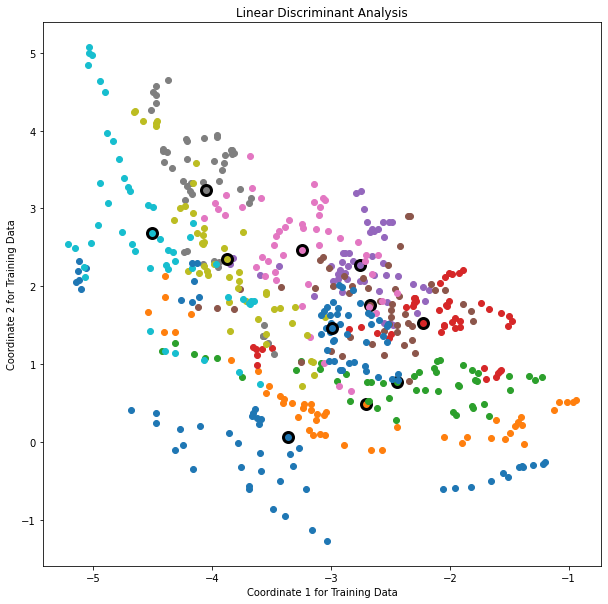

In [13]:
grouped = df_x2d.groupby(df_y)

fig44 = plt.figure(2, figsize=(10, 10))
ax = fig44.add_subplot(1, 1, 1)

for y, x in grouped:
    x_mean = x.mean()
    print(y)
    print(x_mean)
    color = next(ax._get_lines.prop_cycler)['color']
    print(color)
    ax.plot(x['x.1'], x['x.2'], 'o', color=color)
    ax.plot(x_mean[0], x_mean[1], 'o', color=color, markersize=10,
            markeredgecolor='black', markeredgewidth=3)
ax.set_xlabel('Coordinate 1 for Training Data')
ax.set_ylabel('Coordinate 2 for Training Data')
ax.set_title('Linear Discriminant Analysis')
plt.show()

FIGURE 4.4. A two-dimensional plot of the vowel training data. There are
eleven classes with $X \in \mathbb R^{10}$, and this is the best view in terms of a LDA model
(Section 4.3.3). The heavy circles are the projected mean vectors for each class.
The class overlap is considerable.

In [48]:
%%R
load_vowel_data <- function(doScaling=FALSE,doRandomization=FALSE){

  # Get the training data:
  #   
  XTrain  = read.csv("../../data/vowel/vowel.train", header=TRUE)

  # Delete the column named "row.names":
  #
  XTrain$row.names = NULL

  # Extract the true classification for each datum
  # 
  labelsTrain = XTrain[,1] 

  # Delete the column of classification labels:
  #
  XTrain$y = NULL 
  
  #
  # We try to scale ALL features so that they have mean zero and a
  # standard deviation of one.
  #
  if( doScaling ){
    XTrain = scale(XTrain, TRUE, TRUE)
    means  = attr(XTrain,"scaled:center")
    stds   = attr(XTrain,"scaled:scale")
    XTrain = data.frame(XTrain)
  }

  #
  # Sometime data is processed and stored on disk in a certain order.  When doing cross validation
  # on such data sets we don't want to bias our results if we grab the first or the last samples.
  # Thus we randomize the order of the rows in the Training data frame to make sure that each
  # cross validation training/testing set is as random as possible.
  # 
  if( doRandomization ){
    nSamples    = dim(XTrain)[1] 
    inds        = sample( 1:nSamples, nSamples )
    XTrain      = XTrain[inds,]
    labelsTrain = labelsTrain[inds]
  }

  # Get the testing data:
  #
  XTest  = read.csv("../../data/vowel/vowel.test", header=TRUE)

  # Delete the column named "row.names":
  #
  XTest$row.names = NULL

  # Extract the true classification for each datum
  # 
  labelsTest = XTest[,1] 

  # Delete the column of classification labels:
  #
  XTest$y = NULL 

  # Scale the testing data using the same transformation as was applied to the training data:
  #  apply "1" for rows and "2" for columns
  if( doScaling ){
    XTest = t( apply( XTest, 1, '-', means ) ) 
    XTest = t( apply( XTest, 1, '/', stds ) ) 
  }

  return( list( XTrain, labelsTrain, XTest, labelsTest ) ) 
}

In [32]:
%%R
linear_regression_indicator_matrix = function(XTrain,yTrain){

  # Inputs:
  #   XTrain = training matrix (without the common column of ones needed to represent the constant offset)
  #   yTrain = training labels matrix of true classifications with indices 1 - K (where K is the number of classes)

  K = max(yTrain) # the number of classes
  N = dim( XTrain )[1] # the number of samples 

  # form the indicator responce matrix Y
  # mat.or.vec(nr, nc) creates an nr by nc zero matrix if nr is greater than 1, and a zero vector of length nr if nc equals 1.
  Y = mat.or.vec( N, K ) 
  for( ii in 1:N ){
    jj       = yTrain[ii] 
    Y[ii,jj] = 1.
  }
  #Y is a 528X11 matrix with 1 in the diagonal and 0 elsewhere
  Y = as.matrix(Y)

  # for the feature vector matrix XTrain ( append a leading column of ones ) and compute Yhat:
  #
  ones = as.matrix( mat.or.vec( N, 1 ) + 1.0 )
  Xm   = as.matrix( cbind( ones, XTrain ) )
  # Bhat is a 11X11 matrix
  Bhat = solve( t(Xm) %*% Xm, t(Xm) %*% Y ) # this is used for predictions on out of sample data  
  Yhat = Xm %*% Bhat # the discriminant predictions on the training data  
  #which.max() Determines the location, i.e., index of the first maximum of a numeric (or logical) vector.
  #apply("1") for the row
  # gHat is a 528 vector
  gHat = apply( Yhat, 1, 'which.max' ) # classify this data 
  
  return( list(Bhat,Yhat,gHat) )

}

In [141]:
%%R
library(MASS) # this has functions for lda and qda 

out         = load_vowel_data(doScaling=FALSE, doRandomization=FALSE)
XTrain      = out[[1]]
labelsTrain = out[[2]] 
XTest       = out[[3]]
labelsTest  = out[[4]] 
lda( XTrain, labelsTrain )
predict( lda( XTrain, labelsTrain ), XTrain )$class

  [1] 1  1  3  4  5  5  5  8  9  10 11 1  1  3  4  5  5  5  8  9  10 11 1  1  3 
 [26] 4  5  5  7  8  9  10 11 1  1  3  4  5  5  7  8  9  10 11 1  2  3  4  6  5 
 [51] 7  8  9  10 11 1  2  3  4  11 5  5  8  9  10 11 1  2  3  4  5  6  7  8  8 
 [76] 10 11 1  2  3  4  5  6  7  8  8  10 6  1  2  3  4  5  6  7  8  8  10 6  1 
[101] 2  3  4  5  6  7  8  8  10 11 1  2  3  4  5  6  7  8  8  10 11 1  2  3  4 
[126] 5  6  7  8  10 10 11 3  2  2  6  7  6  7  8  7  10 9  3  3  2  6  7  7  7 
[151] 8  7  10 11 2  3  3  6  7  6  7  8  7  10 11 2  2  3  6  7  6  7  8  9  10
[176] 11 2  2  2  6  7  6  7  8  10 10 11 2  2  2  6  7  6  7  8  9  10 11 2  2 
[201] 3  4  7  6  7  7  9  9  11 2  11 3  4  7  5  7  7  9  9  11 2  2  3  4  5 
[226] 7  11 7  9  9  11 2  2  3  4  5  7  11 7  9  10 11 1  2  3  4  5  11 11 7 
[251] 9  9  11 1  2  3  4  5  11 6  7  9  10 11 1  2  3  4  5  6  7  8  10 10 11
[276] 1  2  3  4  5  6  7  8  10 10 11 1  2  3  4  5  6  7  8  10 10 11 1  2  3 
[301] 4  5  6  7  8  10 10 1

In [142]:
%%R
library(nnet)
fm = data.frame( cbind(XTrain,labelsTrain) )
#nnet::multinom: Fit Multinomial Log-linear Models
m = multinom( labelsTrain ~ x.1 + x.2 + x.3 + x.4 + x.5 + x.6 + x.7 + x.8 + x.9 + x.10, data=fm )
summary(m)

# weights:  132 (110 variable)
initial  value 1266.088704 
iter  10 value 800.991170
iter  20 value 609.647137
iter  30 value 467.787809
iter  40 value 378.168922
iter  50 value 353.235470
iter  60 value 346.430211
iter  70 value 341.952991
iter  80 value 339.249147
iter  90 value 338.593226
iter 100 value 338.518492
final  value 338.518492 
stopped after 100 iterations
Call:
multinom(formula = labelsTrain ~ x.1 + x.2 + x.3 + x.4 + x.5 + 
    x.6 + x.7 + x.8 + x.9 + x.10, data = fm)

Coefficients:
   (Intercept)       x.1      x.2          x.3        x.4       x.5        x.6
2    11.859912  5.015869  9.14065  -0.54668237  -5.842854  5.249095  4.5380736
3    22.991130  8.754650 10.51908  -8.09716943  -6.433698  2.844026 -3.0990773
4    21.211055  9.352021 14.27583 -11.44350228  -9.398762 -5.024023 -9.9120414
5    10.661226  7.994979 18.69133  -3.90686991 -10.227598 -6.879093 -2.3500276
6    17.371541  8.472878 16.80821  -3.55182322  -9.189781 -5.125459 -2.2086056
7    -4.496469  4.10863

In [144]:
%%R                                                                                                                          
library(MASS) # this has functions for lda and qda 

out         = load_vowel_data(doScaling=FALSE, doRandomization=FALSE)
XTrain      = out[[1]]
labelsTrain = out[[2]] 
XTest       = out[[3]]
labelsTest  = out[[4]] 

# TRAIN A LINEAR REGRESSION BASED MODEL:
#
out      = linear_regression_indicator_matrix(XTrain,labelsTrain)
Bhat     = out[[1]]
Yhat     = out[[2]] 
tpLabels = out[[3]]

numCC      = sum( (tpLabels - labelsTrain) == 0 ) #total correct predictions
numICC     = length(tpLabels)-numCC #total incorrect predictions
eRateTrain = numICC / length(tpLabels) # error rate

# predict on the testing data with this classifier:
#
N         = length(labelsTest)
ones      = as.matrix( mat.or.vec( N, 1 ) + 1.0 )
Xm        = as.matrix( cbind( ones, XTest ) )
tpLabels  = apply( Xm %*% Bhat, 1, 'which.max' ) 
numCC     = sum( (tpLabels - labelsTest) == 0 )
numICC    = length(tpLabels)-numCC 
eRateTest = numICC / length(tpLabels) 

print(sprintf("%40s: %10.6f; %10.6f","Linear Regression",eRateTrain,eRateTest))

# TRAIN A LDA MODEL:
# MASS::lda 
ldam = lda( XTrain, labelsTrain ) 

# get this models predictions on the training data
# 
predTrain = predict( ldam, XTrain ) 
tpLabels  = as.double( predTrain$class ) 

numCC      = sum( (tpLabels - labelsTrain) == 0 )
numICC     = length(tpLabels)-numCC 
eRateTrain = numICC / length(tpLabels) 

# get this models predictions on the testing data
# 
predTest = predict( ldam, XTest ) 
tpLabels = as.double( predTest$class ) 

numCC     = sum( (tpLabels - labelsTest) == 0 )
numICC    = length(tpLabels)-numCC 
eRateTest = numICC / length(tpLabels) 

print(sprintf("%40s: %10.6f; %10.6f","Linear Discriminant Analysis (LDA)",eRateTrain,eRateTest))

# TRAIN A QDA MODEL:

qdam = qda( XTrain, labelsTrain ) 

# get this models predictions on the training data
# 
predTrain = predict( qdam, XTrain ) 
tpLabels  = as.double( predTrain$class ) 

numCC      = sum( (tpLabels - labelsTrain) == 0 )
numICC     = length(tpLabels)-numCC 
eRateTrain = numICC / length(tpLabels) 

# get this models predictions on the testing data
# 
predTest = predict( qdam, XTest ) 
tpLabels = as.double( predTest$class ) 

numCC     = sum( (tpLabels - labelsTest) == 0 )
numICC    = length(tpLabels)-numCC 
eRateTest = numICC / length(tpLabels) 

print(sprintf("%40s: %10.6f; %10.6f","Quadratic Discriminant Analysis (QDA)",eRateTrain,eRateTest))

library(nnet)
fm = data.frame( cbind(XTrain,labelsTrain) )
#nnet::multinom: Fit Multinomial Log-linear Models
m = multinom( labelsTrain ~ x.1 + x.2 + x.3 + x.4 + x.5 + x.6 + x.7 + x.8 + x.9 + x.10, data=fm )
yhat_train = predict( m, newdata=XTrain, "class" )
yhat_test = predict( m, newdata=XTest, "class" )

numCC      = sum( (as.integer(yhat_train) - labelsTrain) == 0 )
numICC     = length(labelsTrain)-numCC 
eRateTrain = numICC / length(labelsTrain) 

numCC     = sum( (as.integer(yhat_test) - labelsTest) == 0 )
numICC    = length(labelsTest)-numCC 
eRateTest = numICC / length(labelsTest) 

print(sprintf("%40s: %10.6f; %10.6f","Logistic Regression",eRateTrain,eRateTest))

[1] "                       Linear Regression:   0.477273;   0.666667"
[1] "      Linear Discriminant Analysis (LDA):   0.316288;   0.556277"
[1] "   Quadratic Discriminant Analysis (QDA):   0.011364;   0.528139"
# weights:  132 (110 variable)
initial  value 1266.088704 
iter  10 value 800.991170
iter  20 value 609.647137
iter  30 value 467.787809
iter  40 value 378.168922
iter  50 value 353.235470
iter  60 value 346.430211
iter  70 value 341.952991
iter  80 value 339.249147
iter  90 value 338.593226
iter 100 value 338.518492
final  value 338.518492 
stopped after 100 iterations
[1] "                     Logistic Regression:   0.221591;   0.512987"


TABLE 4.1. Training and test error rates using a variety of linear techniques
on the vowel data. There are eleven classes in ten dimensions, of which three
account for 90% of the variance (via a principal components analysis). We see
that linear regression is hurt by masking, increasing the test and training error
by over 10%.

# $\S$ 4.3. Linear Discriminant Analysis

$\S$ 2.4. Decision theory for classification tells us that we need to know the class posteriors $\text{Pr}(G|X)$ for optimal classification. Suppose

* $f_k(x)$ is the class-conditional density of $X$ in class $G=k$,
* $\pi_k$ is the prior probability of class $k$, with $\sum\pi_k=1$.

A simple application of Bayes theorem gives us

\begin{equation}
\text{Pr}(G=k|X=x) = \frac{f_k(x)\pi_k}{\sum_{l=1}^K f_l(x)\pi_l}.
\end{equation}

We see that in terms of ability to classify, it is enough to have the $f_k(x)$.

Many techniques are based on models for the class densities:

* linear and quadratic discriminant analysis use Gaussian densities;
* more flexible mixtures of Gaussian allow for nonlinear decision boundaires ($\S$ 6.8);
* general nonparametric density estimates for each class density allow the most flexibility ($\S$ 6.6.2);
* *Naive Bayes* models are a variant of the previous case, and assume that the inputs are conditionally independent in each class; i.e., each of the class densities are products of marginal densities ($\S$ 6.6.3).

### LDA from multivariate Gaussian

Suppose that we model each class density as multivariate Gaussian

\begin{equation}
f_k(x) = \frac{1}{(2\pi)^{p/2}|\Sigma_k|^{1/2}}\exp\left\lbrace -\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k) \right\rbrace
\end{equation}

Linear discriminant analysis (LDA) arises in the special case when we assume that the classes have a common covariance matrix $\Sigma_k=\Sigma,\forall k$.

In comparing two classes $k$ and $l$, it is sufficient to look at the log-ratio, and we see that as an equation linear in $x$,
$$
\begin{align}
\log\frac{\text{Pr}(G=k|X=x)}{\text{Pr}(G=l|X=x)} &= \log\frac{f_k(x)}{f_l(x)} + \log\frac{\pi_k}{\pi_l} \\
&= \log\frac{\pi_k}{\pi_l} - \frac{1}{2}(\mu_k+\mu_l)^T\Sigma^{-1}(\mu_k-\mu_l)+x^T\Sigma^{-1}(\mu_k-\mu_l) \\
&= \log\frac{\pi_k}{\pi_l} - \frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k + \frac{1}{2}\mu_l^T\Sigma^{-1}\mu_l + x^T\Sigma^{-1}(\mu_k-\mu_l) \\
&= \delta_k(x) - \delta_l(x),
\end{align}
$$
where $\delta_k$ is the *linear discriminant function*

$$\begin{equation}
\delta_k(x) = -\frac{p}{2}\log(2\pi) -\frac{1}{2}\log(|\Sigma|) + x^T\Sigma^{-1}\mu_k - \frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k + \log\pi_k
\end{equation}$$

$$\begin{equation}
\delta_l(x) = -\frac{p}{2}\log(2\pi) -\frac{1}{2}\log(|\Sigma|) + x^T\Sigma^{-1}\mu_l - \frac{1}{2}\mu_l^T\Sigma^{-1}\mu_l + \log\pi_l
\end{equation}$$

This linear log-odds function implies that the decision boundary between classes $k$ and $l$

\begin{equation}
\left\lbrace x: \delta_k(x) - \delta_l(x) = 0 \right\rbrace
\end{equation}

is linear in $x$; in $p$ dimensions a hyperplane. Also the linear discriminant functions are equivalent description of the decision rule, with

\begin{equation}
G(x) = \arg\max_k \delta_k(x).
\end{equation}

### Estimating parameters

In practice we do not know the parameters of the Gaussian distributions, and will need to estimate them using our training data:


* $\hat\pi_k = N_k/N$,
* $\hat\mu_k = \sum_{g_i = k} x_i/N_k$;
* $\hat\Sigma = \sum_{k=1}^K \sum_{g_i=k}(x_i-\hat\mu_k)(x_i-\hat\mu_k)^T/(N-K)$.

### Simple correspondence between LDA and linear regression with two classes

The LDA rule classifies to class 2 if

$$\delta_2(x)-\delta_1(x)>0$$ or 

$$
\begin{equation}
x^T\hat\Sigma^{-1}(\hat\mu_2-\hat\mu_1) > \frac{1}{2}(\hat\mu_2+\hat\mu_1)^T\hat\Sigma^{-1}(\hat\mu_2-\hat\mu_1) - \log\frac{N_2}{N_1},
\end{equation}
$$
and class 1 otherwise. If we code the targets in the two classees as $+1$ and $-1$ respectively, then the coefficient vector from least squares is proportional to the LDA direction shown above (Exercise 4.2). However unless $N_1=N_2$ the intercepts are different and hence the resulting decision rules are different.

If $K>2$, LDA is not the same as linear regression of the class indicator matrix, and it avoids the masking problems (Hastie et al., 1994). A correspondence can be established through the notion of *optimal scoring*, discussed in $\S$ 12.5.

### Practice beyond the Gaussian assumption

Since the derivation of the LDA direction via least squares does not use a Gaussian assumption for the features, its applicability extends beyond the realm of Gaussian data. However the derivation of the particular intercept or cut-point given in the above LDA rule *does* require Gaussian data. Thus it makes sense to instead choose the cut-point that empirically minimizes training error for a given dataset. This something we have found to work well in practive, but have not seen it mentioned in the literature.

In [26]:
"""FIGURE 4.5. An idealized example with K=3, p=2, and a common covariance

Here the right panel shows the LDA classification results instead of the
decision boundaries."""

In [2]:
size_cluster = 30
# mat_rand = scipy.rand(2, 2)
# cov = mat_rand.T @ mat_rand / 10
cov = np.array([[1.0876306, 0.2065698],
                   [0.2065698, 0.1157603]])/2

cluster1 = np.random.multivariate_normal([-.5, 0], cov, size_cluster)
cluster2 = np.random.multivariate_normal([.5, 0], cov, size_cluster)
cluster3 = np.random.multivariate_normal([0, .5], cov, size_cluster)

# Estimating parameters axis = 0 is the means of the rows
vec_mean1 = cluster1.mean(axis=0)
print(vec_mean1)
vec_mean2 = cluster2.mean(axis=0)
print(vec_mean2)
vec_mean3 = cluster3.mean(axis=0)
print(vec_mean3)

cluster_centered1 = cluster1 - vec_mean1
cluster_centered2 = cluster2 - vec_mean2
cluster_centered3 = cluster3 - vec_mean3
#mat_cov is 2X2 covariance matrix, which is the \hat\Sigma
mat_cov = (cluster_centered1.T @ cluster_centered1 +
           cluster_centered2.T @ cluster_centered2 +
           cluster_centered3.T @ cluster_centered3)/(3*size_cluster-3)
print(mat_cov)

[-0.50612656 -0.01731414]
[ 0.59327288 -0.01532545]
[0.02818347 0.45984356]
[[0.53340587 0.10735396]
 [0.10735396 0.05431232]]


In [13]:
# Calculate linear discriminant scores
# mat_cov @ sigma_inv_mu123 = np.vstack((vec_mean1, vec_mean2, vec_mean3)).T
# sigma_inv_mu123 is \Sigma^{-1} @ u_{123}^T
sigma_inv_mu123 = scipy.linalg.solve(
    mat_cov,
    np.vstack((vec_mean1, vec_mean2, vec_mean3)).T,
)
print("sigma_inv_mu123")
print(sigma_inv_mu123)
print(sigma_inv_mu123.T)
sigma_inv_mu1, sigma_inv_mu2, sigma_inv_mu3 = sigma_inv_mu123.T

# mat_x is 90X2 matrix
# sigma_inv_mu123 is 2X3 matrix
mat_x = np.vstack((cluster1, cluster2, cluster3))
# mat_delta is 90X3 matrix
mat_delta = (mat_x @ sigma_inv_mu123 -
             np.array((vec_mean1 @ sigma_inv_mu1.T,
                          vec_mean2 @ sigma_inv_mu2.T,
                          vec_mean3 @ sigma_inv_mu3.T))/2)
cluster_classified1 = mat_x[mat_delta.argmax(axis=1) == 0]
cluster_classified2 = mat_x[mat_delta.argmax(axis=1) == 1]
cluster_classified3 = mat_x[mat_delta.argmax(axis=1) == 2]

sigma_inv_mu123
[[-1.46914484  1.9413035  -2.74196494]
 [ 2.58512974 -4.1193617  13.88643346]]
[[-1.46914484  2.58512974]
 [ 1.9413035  -4.1193617 ]
 [-2.74196494 13.88643346]]


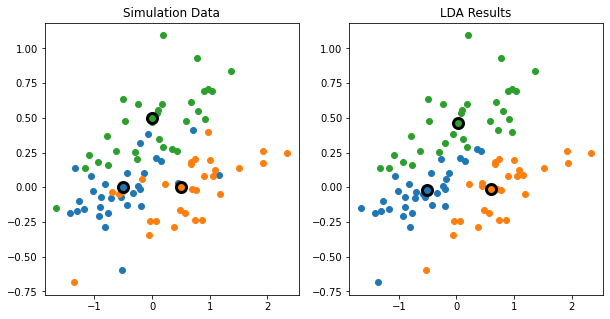

In [4]:
fig45 = plt.figure(0, figsize=(10, 5))
ax1 = fig45.add_subplot(1, 2, 1)
ax1.plot(cluster1[:, 0], cluster1[:, 1], 'o', color='C0')
ax1.plot(cluster2[:, 0], cluster2[:, 1], 'o', color='C1')
ax1.plot(cluster3[:, 0], cluster3[:, 1], 'o', color='C2')
ax1.plot(-.5, 0, 'o', color='C0', markersize=10, markeredgecolor='black',
         markeredgewidth=3)
ax1.plot(.5, 0, 'o', color='C1', markersize=10, markeredgecolor='black',
         markeredgewidth=3)
ax1.plot(0, .5, 'o', color='C2', markersize=10, markeredgecolor='black',
         markeredgewidth=3)
ax1.set_title('Simulation Data')

ax2 = fig45.add_subplot(1, 2, 2)
ax2.plot(cluster_classified1[:, 0], cluster_classified1[:, 1], 'o', color='C0')
ax2.plot(cluster_classified2[:, 0], cluster_classified2[:, 1], 'o', color='C1')
ax2.plot(cluster_classified3[:, 0], cluster_classified3[:, 1], 'o', color='C2')
ax2.plot(vec_mean1[0], vec_mean1[1], 'o', color='C0', markersize=10,
         markeredgecolor='black', markeredgewidth=3)
ax2.plot(vec_mean2[0], vec_mean2[1], 'o', color='C1', markersize=10,
         markeredgecolor='black', markeredgewidth=3)
ax2.plot(vec_mean3[0], vec_mean3[1], 'o', color='C2', markersize=10,
         markeredgecolor='black', markeredgewidth=3)
ax2.set_title('LDA Results')
plt.show()

In [148]:
%%R
diag(1, 3, 3)

     [,1] [,2] [,3]
[1,]    1    0    0
[2,]    0    1    0
[3,]    0    0    1


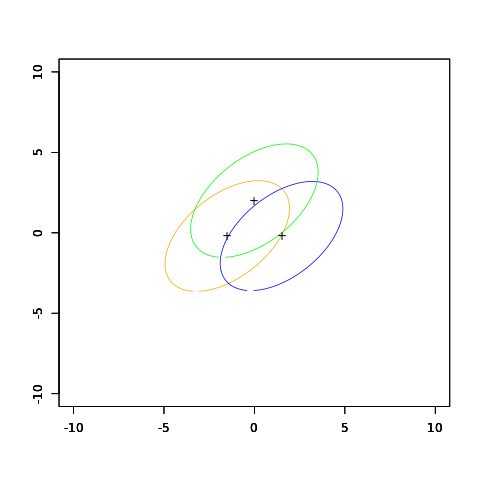

In [35]:
%%R

library(MASS)
library(mvtnorm)
#sigma = diag(1, 2, 2)
sigma = matrix(c(2,1,1,2), nrow = 2)
mu1 = c(-1.5, -0.2)
mu2 = c(1.5, -0.2)
mu3 = c(0, 2)

N = 1000
set.seed(123)
dm1 = mvrnorm(N, mu1, sigma)
dm2 = mvrnorm(N, mu2, sigma)
dm3 = mvrnorm(N, mu3, sigma)
# dmvnorm Calculates the probability density function of the multivariate normal distribution
z1 = dmvnorm(dm1, mu1, sigma)
z2 = dmvnorm(dm2, mu2, sigma)
z3 = dmvnorm(dm3, mu3, sigma)
lev1 = quantile(as.numeric(z1), 0.05)
lev2 = quantile(as.numeric(z2), 0.05)
lev3 = quantile(as.numeric(z3), 0.05)

myContour <- function(mu, sigma, level, col, n=300){
   x.points <- seq(-10,10,length.out=n)
   y.points <- x.points
   z <- matrix(0,nrow=n,ncol=n)
   for (i in 1:n) {
     for (j in 1:n) {
       z[i,j] <- dmvnorm(c(x.points[i],y.points[j]),
                         mean=mu,sigma=sigma)
     }
   }
   contour(x.points,y.points,z, levels = level, col = col, xlim = c(-10, 10), ylim = c(-10, 10), labels = "")
 }
myContour(mu1, sigma, lev1, "orange")
par(new=TRUE)
myContour(mu2, sigma, lev2, "blue")
par(new=TRUE)
myContour(mu3, sigma, lev3, "green")
points(rbind(mu1, mu2, mu3), pch="+", col="black")

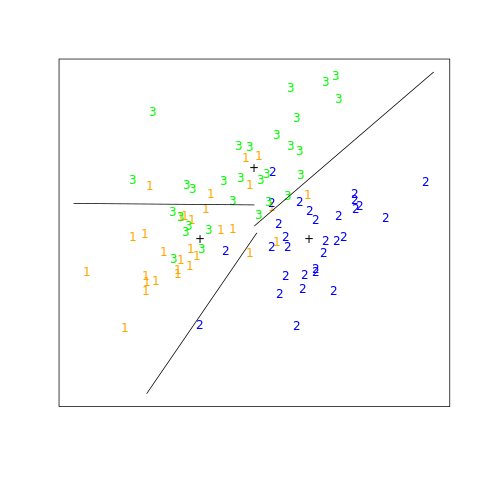

In [36]:
%%R

N = 30
sigma = matrix(c(2,1,1,2), nrow = 2)
mu1 = c(-1.5, -0.2)
mu2 = c(1.5, -0.2)
mu3 = c(0, 2)
set.seed(123)
dm1 = mvrnorm(N, mu1, sigma)
dm2 = mvrnorm(N, mu2, sigma)
dm3 = mvrnorm(N, mu3, sigma)

m12 = lda(rbind(dm1, dm2), rep(c("c1","c2"), each=N))
m13 = lda(rbind(dm1, dm3), rep(c("c1","c3"), each=N))
m23 = lda(rbind(dm2, dm3), rep(c("c2","c3"), each=N))

calcY <- function(c, x) { return(-1*c[1]*x/c[2]) }

calcLD <- function(object) {
  mu = object$means
  mu.pool = colSums(mu)/2 ## (mu1+mu2)/2
  scaling = object$scaling
  intercept = sum(scaling * mu.pool)/scaling[2]
  slope = -1* scaling[1]/scaling[2]
  return(c(intercept, slope))
}

#plot
plot(dm1[, 1], dm1[, 2], col = "orange", pch="1", 
     xlim = c(-5, 5), ylim = c(-5, 5), 
     xaxt="n", yaxt="n", xlab = "", ylab = "")
points(dm2[, 1], dm2[, 2], col = "blue", pch="2")
points(dm3[, 1], dm3[, 2], col = "green", pch="3")
points(rbind(mu1, mu2, mu3), pch="+", col="black")
clip(-5,5,-5,0)
#abline(0, -1*m12$scaling[1]/m12$scaling[2])
abline(calcLD(m12))
clip(-5,0,-5,5)
#abline(0, -1*m13$scaling[1]/m13$scaling[2])
abline(calcLD(m13))
clip(0,5,-5,5)
#abline(0, -1*m23$scaling[1]/m23$scaling[2])
abline(calcLD(m23))


FIGURE 4.5. The upper panel shows three Gaussian distributions, with the same
covariance and different means. Included are the contours of constant density
enclosing 95% of the probability in each case. The Bayes decision boundaries
between each pair of classes are shown (broken straight lines), and the Bayes
decision boundaries separating all three classes are the thicker solid lines (a subset
of the former). On the lower we see a sample of 30 drawn from each Gaussian
distribution, and the fitted LDA decision boundaries.

In [37]:
%%R
## #######################################
## directly compute
## ######################################

## sample mean
zmu1 = colMeans(dm1)
zmu2 = colMeans(dm2)
zmu3 = colMeans(dm3)

## sample variance
zs1 = var(dm1)
zs2 = var(dm2)
zs3 = var(dm3)
zs12 = (zs1+zs2)/2 ## ((n1-1)S1+(n2-1)S2)/(n1+n2-2)
zs13 = (zs1+zs3)/2
zs23 = (zs2+zs3)/2

## #############################
## coef:
##   a = S^{-1}(mu1-mu2)
## #############################
za12 = solve(zs12) %*% (zmu1-zmu2)
za12
za13 = solve(zs13) %*% (zmu1-zmu3)
za13
za23 = solve(zs23) %*% (zmu2-zmu3)
za23

## ############################
## constant
##    0.5*a'(mu1+mu2)
## ############################
c12 = sum(za12 * (zmu1+zmu2)/2)
c13 = sum(za13 * (zmu1+zmu3)/2)
c23 = sum(za23 * (zmu2+zmu3)/2)

calcLD2 <- function(za, c) {return(c(c/za[2], -za[1]/za[2]))}
calcLD2(za12, c12)
calcLD2(za13, c13)
calcLD2(za23, c23)
cat("for class 1 and class 2",
    "\nuse lda results: ", calcLD(m12), "\ncompute directly: ", calcLD2(za12, c12),
    "\n",
    "\nfor class 1 and class 3", 
    "\nuse lda results: ", calcLD(m13), "\ncompute directly: ", calcLD2(za13, c13), 
    "\n",
    "\nfor class 2 and class 3",
    "\nuse lda results: ", calcLD(m23), "\ncompute directly: ", calcLD2(za23, c23))

for class 1 and class 2 
use lda results:  -0.1122356 1.641163 
compute directly:  -0.1122356 1.641163 
 
for class 1 and class 3 
use lda results:  0.8667723 -0.009281836 
compute directly:  0.8667723 -0.009281836 
 
for class 2 and class 3 
use lda results:  0.2141177 0.9654518 
compute directly:  0.2141177 0.9654518

### Quadratic Discriminant Analysis

If the $\Sigma_k$ are not assumed to be equal, then the convenient cancellations do not occur. We then get *quadratic discriminant functions* (QDA),

\begin{equation}
\delta_k(x) =\log(p(x|\mathcal G_k))+\log(\pi_k) = -\frac{p}{2}\log(2\pi) -\frac{1}{2}\log|\Sigma_k| -\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k) + \log\pi_k
\end{equation}

The decision boundary between each pair of classes $k$ and $l$ is described by a quadratic equation $\left\lbrace x: \delta_k(x) = \delta_l(x) \right\rbrace$.

This estimates for QDA are similar to those for LDA, except that separate covariance matrices must be estimated for each class. When $p$ is large this can mean a dramatic increase in parameters.

> Since the decision boundaries are functions of the parameters of the densities, counting the number of parameters must be done with care.

For LDA, it seems there are $(K-1)\times(p+1)$ paramters, since we only need the differences $\delta_k(x)-\delta_K(x)$ between the discriminant functions where $K$ is some pre-chosen class (here the last), and each difference requires $p+1$ parameters. Likewise for QDA there will be $(K-1)\times\lbrace p(p+3)/2+1 \rbrace$ parameters.

Both LDA and QDA perform well on an amazingly large and diverse set of classification tasks.

### Why LDA and QDA have such a good track record?

The data are approximately Gaussian, or for LDA the covariances are approximately equal? Maybe not.

More likely a reason is that the data can only support simple decision boundaries such as linear or quadratic, and the estimates provided via the Guassian models are stable.

This is a bias-variance tradeoff -- we can put up with the bias of a linear decision boundary because it can be estimated with much lower variance than more exotic alternatives. This argument is less believable for QDA, since it can have many parameters itself, although perhaps fewer than the non-parametric alternatives.

## $\S$ 4.3.1. Regularized Discriminant Analysis

### $\Sigma_k \leftrightarrow \Sigma$
These methods are very similar in flavor to ridge regression. Friedman (1989) proposed a compromise between LDA and QDA, which allows one to shrink the separate covariances of QDA toward a common covariance $\hat\Sigma$ as in LDA. The regularized covariance matrices have the form

\begin{equation}
\hat\Sigma_k(\alpha) = \alpha\hat\Sigma_k + (1-\alpha)\hat\Sigma,
\end{equation}

where $\hat\Sigma$ is the pooled covariance matrix as used in LDA and $\alpha\in[0,1]$ allows a continuum of models between LDA and QDA, and needs to be specified. In practice $\alpha$ can be chosen based on the performance of the model on validation data, or by cross-validation.

### $\Sigma \leftrightarrow \sigma$

Similar modifications allow $\hat\Sigma$ itelf to be shrunk toward the scalar covariance,

\begin{equation}
\hat\Sigma(\gamma) = \gamma\hat\Sigma + (1-\gamma)\hat\sigma^2\mathbf{I},
\end{equation}

for $\gamma\in[0,1]$.

Combining two regularization leads to a more general family of covariances $$\hat\Sigma(\alpha,\gamma)=\alpha\hat\Sigma_k + (1-\alpha)\left(\gamma\hat\Sigma + (1-\gamma)\hat\sigma^2\mathbf{I}\right)$$.

### To be continued

In Chapter 12, we discuss other regularized versions of LDA, which are more suitable when the data arise from digitized analog signals and images. In these situations the features are high-dimensional and correlated, and the LDA coefficients can be regularized to be smooth or sparse in original domain of the signal.

In Chapter 18, we also deal with very high-dimensional problems, where for example, the features are gene-expression measurements in microarray studies.

In [2]:
%%R
repmat = function(X,m,n){
  ##R equivalent of repmat (matlab)
  mx = dim(X)[1]
  nx = dim(X)[2]
  matrix(t(matrix(X,mx,nx*n)),mx*m,nx*n,byrow=T)
}

In [3]:
%%R
rda = function( XTrain, yTrain, XTest, yTest, alpha=1.0, gamma=1.0 ){
  #
  # R code to implement classification using Regularized Discriminant Analysis
  # Inputs:
  #   XTrain = training data frame
  #   yTrain = training labels of true classifications with indices 1 - K (where K is the number of classes)
  #   xTest = testing data frame
  #   yTest = testing response
  #
  # Note that
  #   gamma, alpha = (1.0, 1.0) gives quadratic discriminant analysis
  #   gamma, alpha = (1.0, 0.0) gives linear discriminant analysis
  # Check that our class labels are all positive: 
  stopifnot( all( yTrain>0 ) )
  stopifnot( all( yTest>0 ) )
  
  K = length(unique(yTrain)) # the number of classes (expect the classes to be labeled 1, 2, 3, ..., K-1, K 
  N = dim( XTrain )[1] # the number of samples
  p = dim( XTrain )[2] # the number of features 

  # Estimate \hat{sigma}^2 variance of all features:
  #
  XTM = as.matrix( XTrain )
  dim(XTM) = prod(dim(XTM)) # we now have all data in one vector
  sigmaHat2 = var(XTM) #\hat{\sigma}

  # Compute the class independent covariance matrix:
  #
  SigmaHat = cov(XTrain) #\hat{\Sigma} 10X10 matrix

  # Compute the class dependent mean vector and covariance matrices:

  PiK = list()
  MuHatK = list()
  SigmaHatK = list()
  for( ci in 1:K ){
    inds = (yTrain == ci)
    PiK[[ci]] = sum(inds)/N
    MuHatK[[ci]] = as.matrix( colMeans( XTrain[ inds, ] ) ) # 10X1 matrix
    SigmaHatK[[ci]] = cov( XTrain[ inds, ] )
  }

  # Blend the covariances as specified by Regularized Discriminant Analysis:

  RDA_SigmaHatK = list()
  for( ci in 1:K ){
    RDA_SigmaHatK[[ci]] = alpha * SigmaHatK[[ci]] + ( 1 - alpha ) * ( gamma * SigmaHat + ( 1 - gamma ) * sigmaHat2 * diag(p) )
  }

  # Compute some of the things needed for classification via the discriminant functions:
  #
  RDA_SigmaHatK_Det = list()
  RDA_SigmaHatK_Inv = list()
  for( ci in 1:K ){
    RDA_SigmaHatK_Det[[ci]] = det(RDA_SigmaHatK[[ci]])
    RDA_SigmaHatK_Inv[[ci]] = solve(RDA_SigmaHatK[[ci]]) # there are numerically better ways of doing this but ... 
  }

  # Classify Training data:
  #
  XTM = t(as.matrix( XTrain )) # dim= p x N 
  CDTrain = matrix( data=0, nrow=N, ncol=K ) # CDTrain = training class discriminants
  for( ci in 1:K ){
    MU = repmat( MuHatK[[ci]], 1, N ) # dim= p x N
    X_minus_MU = XTM - MU # dim= p x N
    SInv = RDA_SigmaHatK_Inv[[ci]] # dim= p x p
    SX = SInv %*% X_minus_MU # dim= ( p x N ); S^{-1}(X-\mu)
    for( si in 1:N ){
      CDTrain[si,ci] = -0.5 * log(RDA_SigmaHatK_Det[[ci]]) - 0.5 * t(X_minus_MU[,si]) %*% SX[,si] + PiK[[ci]]
    }
  }
  yHatTrain = apply( CDTrain, 1, which.max )
  errRateTrain = sum( yHatTrain != yTrain )/N

  # Classify Testing data:
  #
  N = dim( XTest )[1] 
  XTM = t(as.matrix( XTest )) # dim= p x N 
  CDTest = matrix( data=0, nrow=N, ncol=K ) # CDTest = testing class discriminants
  for( ci in 1:K ){
    MU = repmat( MuHatK[[ci]], 1, N ) # dim= p x N
    X_minus_MU = XTM - MU # dim= p x N
    SInv = RDA_SigmaHatK_Inv[[ci]] # dim= p x p
    SX = SInv %*% X_minus_MU # dim= ( p x N )
    for( si in 1:N ){
      CDTest[si,ci] = -0.5 * log(RDA_SigmaHatK_Det[[ci]]) - 0.5 * t(X_minus_MU[,si]) %*% SX[,si] + log(PiK[[ci]])
    }
  }
  yHatTest = apply( CDTest, 1, which.max )
  errRateTest = sum( yHatTest != yTest )/N
  
  return( list(yHatTrain,errRateTrain, yHatTest,errRateTest) )
}

[1] "Min test error rate=   0.478355; alpha=   0.969697"
[1] "Min test error rate=   0.439394; alpha=   0.767677; gamma=   0.050505"


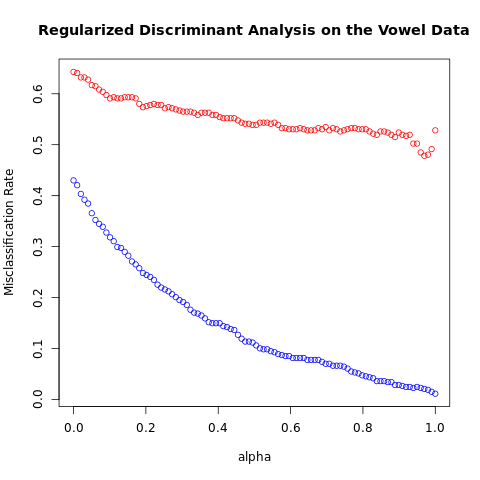

In [5]:
%%R                                                                                                                           

out    = load_vowel_data( TRUE, FALSE )
XTrain = out[[1]]
yTrain = out[[2]] 
XTest  = out[[3]]
yTest  = out[[4]] 

alphas = seq(0.0,1.0,length.out=100)
err_rate_train = c()
err_rate_test = c()
for( apha in alphas ){
  out = rda( XTrain, yTrain, XTest, yTest, apha )
  err_rate_train = c(err_rate_train, out[[2]])
  err_rate_test = c(err_rate_test, out[[4]])
}
plot( alphas, err_rate_train, type="p", col="blue", ylim=range(c(err_rate_train,err_rate_test)), 
     xlab="alpha", ylab="Misclassification Rate", main="Regularized Discriminant Analysis on the Vowel Data" )
lines( alphas, err_rate_test, type="p", col="red" )


min_err_rate_spot = which.min( err_rate_test )
print( sprintf( "Min test error rate= %10.6f; alpha= %10.6f", 
               err_rate_test[min_err_rate_spot], alphas[min_err_rate_spot] ) )


# run model selection with alpha and gamma models to combine to get Sigma_hat:

Nsamples = 100
alphas = seq(0.0,1.0,length.out=Nsamples)
gammas = seq(0.0,1.0,length.out=Nsamples)
err_rate_train = matrix( data=0, nrow=Nsamples, ncol=Nsamples )
err_rate_test = matrix( data=0, nrow=Nsamples, ncol=Nsamples )
for( ii in 1:Nsamples ){
  a = alphas[ii]
  for( jj in 1:Nsamples ){
    g = gammas[jj] 
    out = rda( XTrain, yTrain, XTest, yTest, a, gamma=g )
    err_rate_train[ii,jj] = out[[2]]
    err_rate_test[ii,jj] = out[[4]]
  }
}

inds = which( err_rate_test == min(err_rate_test), arr.ind=TRUE ); ii = inds[1]; jj = inds[2]
print( sprintf( "Min test error rate= %10.6f; alpha= %10.6f; gamma= %10.6f", 
               err_rate_test[ii,jj], alphas[ii], gammas[jj] ) )

FIGURE 4.7. Test and training errors for the vowel data, using regularized
discriminant analysis with a series of values of $\alpha\in [0, 1]$. The optimum for the
test data occurs around $\alpha = 0.97$, close to quadratic discriminant analysis.

## $\S$ 4.3.2. Computations for LDA

Computations for LDA and QDA are simplified by diagonalizing $\hat\Sigma$ or $\hat\Sigma_k$. For the latter, suppose we compute the eigen-decomposition, for each $k$,

\begin{equation}
\hat\Sigma_k = \mathbf{U}_k\mathbf{D}_k\mathbf{U}_k^T,
\end{equation}

where $\mathbf{U}_k$ is $p\times p$ orthogonal, and $\mathbf{D}_k$ a diagonal matrix of positive eigenvalues $d_{kl}$.

Then the ingredients for $\delta_k(x)$ are


* $(x-\hat\mu_k)^T\hat\Sigma_k^{-1}(x-\hat\mu_k) = \left[\mathbf{U}_k^T(x-\hat\mu_k)\right]^T\mathbf{D}_k^{-1}\left[\mathbf{U}_k^T(x-\hat\mu_k)\right]$
* $\log|\hat\Sigma_k| = \sum_l \log d_{kl}$

Note that the inversion of diagonal matrices only requires elementwise reciprocals.

The LDA classifier can be implemented by the following pair of steps:

* *Sphere* the data w.r.t. the common covariance estimate $\hat\Sigma = \mathbf{U}\mathbf{D}\mathbf{U}^T$:  

\begin{equation}
X^* \leftarrow \mathbf{D}^{-\frac{1}{2}}\mathbf{U}^TX,
\end{equation}  
The common covariance estimate of $X^*$ will now be the identity.
* Classify to the closest class centroid in the transformed space, modulo the effect of the class prior probabilities $\pi_k$.

## $\S$ 4.3.3. Reduced-Rank Linear Discriminant Analysis

The $K$ centroids in $p$-dimensional input space lie in an affine subspace of dimension $\le K-1$, and if $p \gg K$, then there will possibly be a considerable drop in dimension. Part of the popularity of LDA is due to such an additional restriction that allows us to view informative low-dimensional projections of the data.

Moreover, in locating the closest centroid, we can ignore distances orthogonal to this subspace, since they will contribute equally to each class. Thus we might just as well project the $X^*$ onto this centroid-spanning subspace $H_{K-1}$, and make distance comparisons there.

Therefore there is a fundamental dimension reduction in LDA, namely, that we need only consider the data in a subspace of dimension at most $K-1$. If  $K=3$, e.g., this could allow us to view the data in $\mathbb{R}^2$, color-coding the classes. In doing so we would not have relinquished any of the information needed for LDA classification.

### What if $K>3$? Principal components subspace

We might then ask for a $L<K-1$ dimensional subspace $H_L \subseteq H_{K-1}$ optimal for LDA in some sense. Fisher defined optimal to mean that the projected centroids were spread out as much as possible in terms of variance. This amounts to finding principal component subspaces of the centroids themselves ($\S$ 3.5.1, $\S$ 14.5.1).

In FIGURE 4.4 with the vowel data, there are eleven classes, each a different vowel sound, in a 10D input space. The centroids require the full space in this case, since $K-1=p$, but we have shown an optimal 2D subspace.

The dimensions are ordered, so we can compute additional dimensions in sequence. FIGURE 4.8 shows four additional pairs of coordinates, a.k.a. *canonical* or *discriminant* variables.

In summary then, finding the sequences of optimal subspaces for LDA involves the following steps:


* Compute the $K\times p$ matrix of class centroids $\mathbf{M}$  
the common covariance matrix $\mathbf{W}$ (for *within*-class covariance).
* Compute $\mathbf{M}^* = \mathbf{MW}^{-\frac{1}{2}}$ using the eigen-decomposition of $\mathbf{W}$.
* Compute $\mathbf{B}^*$, the covariance matrix of $\mathbf{M}^*$ ($\mathbf{B}$ for *between*-class covariance),  
and its eigen-decomposition $\mathbf{B}^* = \mathbf{V}^*\mathbf{D}_B\mathbf{V}^{*T}$.  
The columns $v_l^*$ of $\mathbf{V}^*$ in sequence from first to last define the coordinates of the optimal subspaces.
* Then the $l$th *discriminant variable* is given by  
\begin{equation}
Z_l = v_l^TX \text{ with } v_l = \mathbf{W}^{-\frac{1}{2}}v_l^*.
\end{equation}

In [7]:
"""FIGURE 4.8. Four projections onto pairs of canonical variates.

"""

df_vowel = pd.read_csv('../../data/vowel/vowel.train', index_col=0)
print('A pandas DataFrame of size {} x {} '
      'has been loaded.'.format(*df_vowel.shape))
df_y = df_vowel.pop('y')
mat_x = df_vowel.values
df_vowel

A pandas DataFrame of size 528 x 11 has been loaded.


,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,
1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396
...,...,...,...,...,...,...,...,...,...,...
524,-4.065,2.876,-0.856,-0.221,-0.533,0.232,0.855,0.633,-1.452,0.272
525,-4.513,4.265,-1.477,-1.090,0.215,0.829,0.342,0.693,-0.601,-0.056
526,-4.651,4.246,-0.823,-0.831,0.666,0.546,-0.300,0.094,-1.343,0.185


In [8]:
df_x_grouped = df_vowel.groupby(df_y)
size_class = len(df_x_grouped)
df_mean = df_x_grouped.mean()

print(df_mean)
print(df_vowel[df_y == 1].mean())

         x.1       x.2       x.3       x.4       x.5       x.6       x.7  \
y                                                                          
1  -3.359563  0.062937 -0.294062  1.203333  0.387479  1.221896  0.096375   
2  -2.708875  0.490604 -0.580229  0.813500  0.201938  1.063479 -0.190917   
3  -2.440250  0.774875 -0.798396  0.808667  0.042458  0.569250 -0.280062   
4  -2.226604  1.525833 -0.874437  0.422146 -0.371313  0.248354 -0.018958   
5  -2.756313  2.275958 -0.465729  0.225312 -1.036792  0.389792  0.236417   
6  -2.673542  1.758771 -0.474562  0.350562 -0.665854  0.417000  0.162333   
7  -3.243729  2.468354 -0.105063  0.396458 -0.980292  0.162312  0.019583   
8  -4.051333  3.233979 -0.173979  0.396583 -1.046021  0.195187  0.086667   
9  -3.876896  2.345021 -0.366833  0.317042 -0.394500  0.803375  0.025042   
10 -4.506146  2.688563 -0.284917  0.469563 -0.038792  0.638875  0.139167   
11 -2.990396  1.463875 -0.509812  0.371646 -0.380396  0.725042 -0.083396   

         x.

In [9]:
def within_cov(df_grouped: pd.DataFrame,
               df_mean: pd.DataFrame)->np.ndarray:
    """Compute the within-class covariance matrix"""
    size_class = len(df_grouped)
    dim = df_mean.columns.size
    mat_cov = np.zeros((dim, dim))
    n = 0
    
    for (c, df), (_, mean) in zip(df_grouped, df_mean.iterrows()):
        n += df.shape[0] # df is the grouped dataframe, n is the sum of the lengths of each group
        mat_centered = (df - mean).values # 48 X 10 matrix for each group
        mat_cov += mat_centered.T @ mat_centered # sum of the 10 X 10 within covariance matrix for each group.
    return mat_cov/(n-size_class)

In [10]:
mat_M = df_mean.values #K X p matrix of class centroids 𝐌
mat_W = within_cov(df_x_grouped, df_mean) # sum of the 10 X 10 within covariance matrix for each group.
#scipy.linalg.eigh() Find eigenvalues array and optionally eigenvectors array of matrix.
vec_D, mat_U = scipy.linalg.eigh(mat_W) #  mat_W = mat_U @ np.diag(vec_D) @ mat_U.T
print(np.allclose(mat_U @ np.diag(vec_D) @ mat_U.T, mat_W))

True


In [11]:
mat_W_inv_sqrt = (mat_U @ np.diag(np.sqrt(np.reciprocal(vec_D))) @
                  mat_U.T)
mat_Mstar = mat_M @ mat_W_inv_sqrt  # Compute 𝐌∗=𝐌𝐖^{−1/2} using the eigen-decomposition of  𝐖; (K X p)X(p X p)=K X p
vec_Mstar_mean = mat_Mstar.mean(axis=0) # axis=0 mean along the rows, 1 X p dataframe

mat_Mstar_centered = mat_Mstar - vec_Mstar_mean # K X p dataframe
#Compute 𝐁∗ , the covariance matrix of 𝐌∗ ( 𝐁  for between-class covariance)
mat_Bstar = mat_Mstar_centered.T @ mat_Mstar_centered/(mat_Mstar.shape[0]-1)
#and its eigen-decomposition 𝐁∗=𝐕∗𝐃_𝐵𝐕∗𝑇
vec_DBstar, mat_Vstar = scipy.linalg.eigh(mat_Bstar)
#The columns  𝑣∗𝑙  of  𝐕∗  in sequence from first to last define the coordinates of the optimal subspaces.
mat_V = mat_W_inv_sqrt @ mat_Vstar # (p X p)X(p X p)=p X p
mat_x_canonical = mat_x @ mat_V # 528 X p

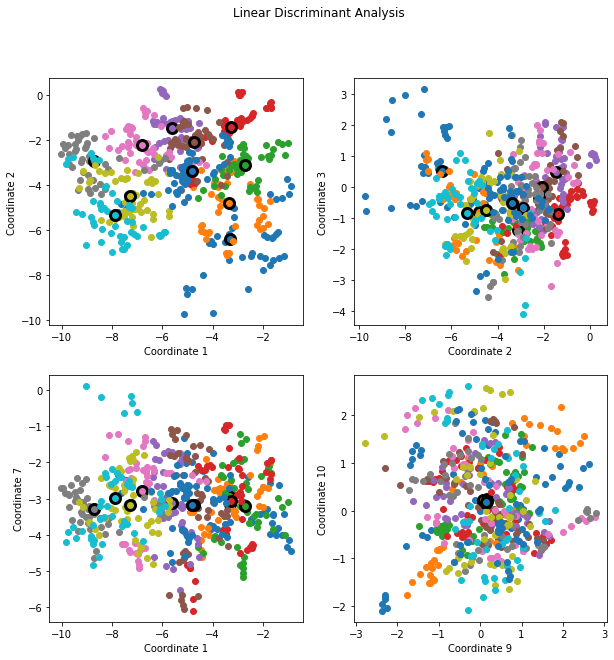

In [12]:
fig48 = plt.figure(0, figsize=(10, 10))

ax11 = fig48.add_subplot(2, 2, 1)
ax12 = fig48.add_subplot(2, 2, 2)
ax21 = fig48.add_subplot(2, 2, 3)
ax22 = fig48.add_subplot(2, 2, 4)

for y in range(1, size_class+1):
    mat_x_grouped = mat_x_canonical[df_y == y]
    c = next(ax11._get_lines.prop_cycler)['color']
    ax11.plot(mat_x_grouped[:, -1], mat_x_grouped[:, -2], 'o', color=c)
    ax12.plot(mat_x_grouped[:, -2], mat_x_grouped[:, -3], 'o', color=c)
    ax21.plot(mat_x_grouped[:, -1], mat_x_grouped[:, -7], 'o', color=c)
    ax22.plot(mat_x_grouped[:, -9], mat_x_grouped[:, -10], 'o', color=c)
    
    vec_centroid = mat_x_grouped.mean(axis=0)
    ax11.plot(vec_centroid[-1], vec_centroid[-2], 'o', color=c,
              markersize=10, markeredgecolor='black', markeredgewidth=3)
    ax12.plot(vec_centroid[-2], vec_centroid[-3], 'o', color=c,
              markersize=10, markeredgecolor='black', markeredgewidth=3)
    ax21.plot(vec_centroid[-1], vec_centroid[-7], 'o', color=c,
              markersize=10, markeredgecolor='black', markeredgewidth=3)
    ax22.plot(vec_centroid[-9], vec_centroid[-10], 'o', color=c,
              markersize=10, markeredgecolor='black', markeredgewidth=3)
    
ax11.set_xlabel('Coordinate 1')
ax11.set_ylabel('Coordinate 2')
ax12.set_xlabel('Coordinate 2')
ax12.set_ylabel('Coordinate 3')
ax21.set_xlabel('Coordinate 1')
ax21.set_ylabel('Coordinate 7')
ax22.set_xlabel('Coordinate 9')
ax22.set_ylabel('Coordinate 10')
fig48.suptitle('Linear Discriminant Analysis')
plt.show()

In [4]:
%%R
reduced_rank_LDA = function( XTrain, yTrain, XTest, yTest ){
  #
  # R code to implement classification using Regularized Discriminant Analysis
  #
  # See the section with the same name as this function in Chapter 4 from the book ESLII
  #
  # Inputs:
  #   XTrain = training data frame
  #   yTrain = training labels of true classifications with indices 1 - K (where K is the number of classes)
  #   xTest = testing data frame
  #   yTest = testing response

  K = length(unique(yTrain)) # the number of classes (expect the classes to be labeled 1, 2, 3, ..., K-1, K 
  N = dim( XTrain )[1] # the number of samples
  p = dim( XTrain )[2] # the number of features
  
  # Compute the class dependent probabilities and class dependent centroids: 
  #
  PiK = matrix( data=0, nrow=K, ncol=1 )
  M = matrix( data=0, nrow=K, ncol=p )
  ScatterMatrices = list()
  for( ci in 1:K ){
    inds = yTrain == ci
    Nci = sum(inds)
    PiK[ci] = Nci/N
    M[ci,] = t( as.matrix( colMeans( XTrain[ inds, ] ) ) )
  }

  # Compute W:
  #
  W = cov( XTrain ) 

  # Compute M^* = M W^{-1/2} using the eigen-decomposition of W :
  #
  e = eigen(W)
  V = e$vectors # W = V %*% diag(e$values) %*% t(V)
  W_Minus_One_Half = V %*% diag( 1./sqrt(e$values) ) %*% t(V) 
  MStar = M %*% W_Minus_One_Half 

  # Compute B^* the covariance matrix of M^* and its eigen-decomposition:
  #
  BStar = cov( MStar )
  e = eigen(BStar)
  VStar = - e$vectors # note taking the negative to match the results in the book (results are independent of this)

  V = W_Minus_One_Half %*% VStar # the full projection matrix
  
  # Project the data into the invariant subspaces:
  #
  XTrainProjected = t( t(V) %*% t(XTrain) )
  XTestProjected = t( t(V) %*% t(XTest) )
  MProjected = t( t(V) %*% t(M) ) # the centroids projected

  # Classify the training/testing data for each possible projection dimension:
  # 
  TrainClassification = matrix( data=0, nrow=N, ncol=p ) # number of samples x number of projection dimensions 

  discriminant = matrix( data=0, nrow=1, ncol=K )
  for( si in 1:N ){ # for each sample
      for( pi in 1:p ){ # for each projection dimension 
      for( ci in 1:K ){ # for each class centroid 
          discriminant[ci] = 0.5 * sum( ( XTrainProjected[si,1:pi] - MProjected[ci,1:pi] )^2 ) - log( PiK[ci] )
      }
          TrainClassification[si,pi] = which.min( discriminant ) # return the index of the first minimum 
      }
  } 

  N = dim(XTest)[1]
  TestClassification = matrix( data=0, nrow=N, ncol=p ) # number of samples x number of projection dimensions 

  discriminant = matrix( data=0, nrow=1, ncol=K )
  for( si in 1:N ){ # for each sample 
      for( pi in 1:p ){ # for each projection dimension 
      for( ci in 1:K ){ # for each class centroid
          discriminant[ci] = 0.5 * sum( ( XTestProjected[si,1:pi] - MProjected[ci,1:pi] )^2 ) - log( PiK[ci] )
      }
          TestClassification[si,pi] = which.min( discriminant )
      }
  } 
  
  return( list(XTrainProjected,XTestProjected,MProjected,TrainClassification,TestClassification) )

}

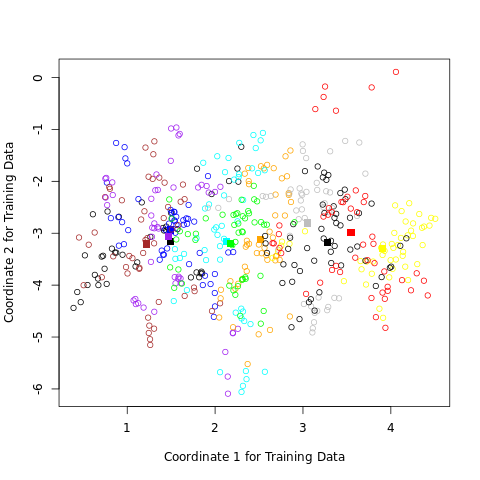

In [91]:
%%R                                                        

out    = load_vowel_data( FALSE, FALSE )
XTrain = out[[1]]
yTrain = out[[2]] 
XTest  = out[[3]]
yTest  = out[[4]] 

out = reduced_rank_LDA( XTrain, yTrain, XTest, yTest )

K = length(unique(yTrain)) # the number of classes (expect the classes to be labeled 1, 2, 3, ..., K-1, K 

XTProj = out[[1]]
MSProj = out[[3]]


x_plot_coordinate = 1
y_plot_coordinate = 7

plot_colors = c("black","blue","brown","purple","orange","cyan","gray","yellow","black","red","green")
for( ci in 1:K ){
    inds = yTrain == ci
    if( ci==1 ){
        plot( XTProj[inds,x_plot_coordinate], XTProj[inds,y_plot_coordinate], xlab="Coordinate 1 for Training Data", 
             ylab="Coordinate 2 for Training Data", col=plot_colors[ci], type="p", xlim=range(XTProj[,x_plot_coordinate]), 
             ylim=range(XTProj[,y_plot_coordinate]))  
    lines( MSProj[ci,x_plot_coordinate], MSProj[ci,y_plot_coordinate], col=plot_colors[ci], type="p", cex=10, pch="." )
    }else{
        lines( XTProj[inds,x_plot_coordinate], XTProj[inds,y_plot_coordinate], xlab="Coordinate 1 for Training Data", 
              ylab="Coordinate 2 for Training Data", col=plot_colors[ci], type="p" )
    lines( MSProj[ci,x_plot_coordinate], MSProj[ci,y_plot_coordinate], col=plot_colors[ci], type="p", cex=10, pch="." )    
    }
}

FIGURE 4.8. Four projections onto pairs of canonical variates. Notice that as
the rank of the canonical variates increases, the centroids become less spread out.
In the lower right panel they appear to be superimposed, and the classes most
confused.

### Maximize between-class variance relative to within-class

Fisher’s approach to Classification with $g$ Populations with the same covariance matrix $\mathbf\Sigma$ which is full rank: A fixed linear combination of the $n_i$ observations of the multivariate random variable from $\pi_i, i=1,2,\cdots,g$ is $$\underset{(n_i\times p)}{\mathbf X_i}\underset{(p\times 1)}{\mathbf a}=\begin{bmatrix}
\mathbf x_{i1}^T\\
\mathbf x_{i2}^T\\
\vdots\\
\mathbf x_{in_i}^T
\end{bmatrix}\mathbf a=\begin{bmatrix}
y_{i1}\\
y_{i2}\\
\vdots\\
y_{in_i}\\
\end{bmatrix}=Y_i$$ $E(\mathbf X_i)=\boldsymbol\mu_i$ and $Cov(\mathbf X_i)=\mathbf\Sigma$ then $E(Y_i)=\mu_{iY}=\mathbf a^T\boldsymbol\mu_i$ and $Cov(Y_i)=\mathbf a^T\mathbf\Sigma\mathbf a$ which is the same for all populations. The the overall mean of all populations is $$\bar{\boldsymbol\mu}=\frac{1}{g}\sum_{i=1}^{g}\boldsymbol\mu_i$$ and the overall mean of all $Y_i$ is $$\bar{\mu}_Y=\mathbf a^T\bar{\boldsymbol\mu}$$ Then for the squared separation $$\text{separation}^2=\frac{\displaystyle\sum_{i=1}^{g}(\mu_{iY}-\bar{\mu}_Y)^2}{\sigma_Y^2}=\frac{\displaystyle\sum_{i=1}^{g}(\mathbf a^T\boldsymbol\mu_i-\mathbf a^T\bar{\boldsymbol\mu})^2}{\mathbf a^T\mathbf \Sigma\mathbf a}=\frac{\mathbf a^T\Biggl(\displaystyle\sum_{i=1}^{g}(\boldsymbol\mu_i-\bar{\boldsymbol\mu})(\boldsymbol\mu_i-\bar{\boldsymbol\mu})^T\Biggr)\mathbf a}{\mathbf a^T\mathbf \Sigma\mathbf a}$$ The squared separation measures the variability between the groups of $Y$-values relative to the common variability within groups. We can then select $\mathbf a$ to maximize this ratio. For the sample mean vectors $$\bar{\mathbf x}_i=\frac{1}{n_i}\sum_{j=1}^{n_i}\mathbf x_{ij}$$ the mean vector is $$\bar{\mathbf x}=\frac{1}{g}\sum_{i=1}^{g}\bar{\mathbf x}_i$$ and $$\mathbf S=\frac{\displaystyle\sum_{i=1}^{g}\sum_{j=1}^{n_i}(\mathbf x_{ij}-\bar{\mathbf x}_i)(\mathbf x_{ij}-\bar{\mathbf x}_i)^T}{n_1+n_2+\cdots+n_g-g}$$ is the estimate of $\mathbf\Sigma$  Then for the squared separation $$\text{separation}^2=\frac{\mathbf a^T\Biggl(\displaystyle\sum_{i=1}^{g}(\bar{\mathbf x}_i-\bar{\mathbf x})(\bar{\mathbf x}_i-\bar{\mathbf x})^T\Biggr)\mathbf a}{\mathbf a^T\mathbf S\mathbf a}$$ Or $$\frac{\text{separation}^2}{n_1+n_2+\cdots+n_g-g}=\frac{\mathbf a^T\Biggl(\displaystyle\sum_{i=1}^{g}(\bar{\mathbf x}_i-\bar{\mathbf x})(\bar{\mathbf x}_i-\bar{\mathbf x})^T\Biggr)\mathbf a}{\mathbf a^T\Biggl(\displaystyle\sum_{i=1}^{g}\sum_{j=1}^{n_i}(\mathbf x_{ij}-\bar{\mathbf x}_i)(\mathbf x_{ij}-\bar{\mathbf x}_i)^T\Biggr)\mathbf a}$$ Let $(\lambda_1, \mathbf e_1),(\lambda_2, \mathbf e_2),\cdots,(\lambda_s, \mathbf e_s), s\le \text{min}(g-1,p)$ are the eigenvalue-eigenvector pairs of matrix $$\Biggl(\displaystyle\sum_{i=1}^{g}\sum_{j=1}^{n_i}(\mathbf x_{ij}-\bar{\mathbf x}_i)(\mathbf x_{ij}-\bar{\mathbf x}_i)^T\Biggr)^{-1}\Biggl(\displaystyle\sum_{i=1}^{g}(\bar{\mathbf x}_i-\bar{\mathbf x})(\bar{\mathbf x}_i-\bar{\mathbf x})^T\Biggr)$$ Then the vector of coefficients $\mathbf a$ that maximizes the ratio $$\frac{\mathbf a^T\Biggl(\displaystyle\sum_{i=1}^{g}(\bar{\mathbf x}_i-\bar{\mathbf x})(\bar{\mathbf x}_i-\bar{\mathbf x})^T\Biggr)\mathbf a}{\mathbf a^T\Biggl(\displaystyle\sum_{i=1}^{g}\sum_{j=1}^{n_i}(\mathbf x_{ij}-\bar{\mathbf x}_i)(\mathbf x_{ij}-\bar{\mathbf x}_i)^T\Biggr)\mathbf a}$$ is given by $\mathbf e_1$ and the linear combination $\mathbf e_1^T\mathbf x$ is called the <span style="color: red;">**sample first discriminant**</span>, and the linear combination $\mathbf e_k^T\mathbf x$ is called the <span style="color: red;">**sample $k^{th}$ discriminant**</span>, $k\le s$.  $\mathbf W=\displaystyle\sum_{i=1}^{g}\sum_{j=1}^{n_i}(\mathbf x_{ij}-\bar{\mathbf x}_i)(\mathbf x_{ij}-\bar{\mathbf x}_i)^T$ is the <span style="color: red;">sample **Within** groups matrix</span>, and $\mathbf B=\displaystyle\sum_{i=1}^{g}(\bar{\mathbf x}_i-\bar{\mathbf x})(\bar{\mathbf x}_i-\bar{\mathbf x})^T$ is the <span style="color: red;">sample **Between** groups matrix</span>.  Let $$\mathbf Y=\begin{bmatrix}
\mathbf e_1^T\mathbf x\\
\mathbf e_2^T\mathbf x\\
\vdots\\
\mathbf e_s^T\mathbf x\\
\end{bmatrix}(s\le \text{min}(g-1,p))$$ contains all the **sample discriminants**, then population $\mathbf X_i$ with $n_i$ observations have **sample discriminants** $$\mathbf Y_i=\underset{(s\times p)}{\begin{bmatrix}
\mathbf e_1^T\\
\mathbf e_2^T\\
\vdots\\
\mathbf e_s^T\\
\end{bmatrix}}\underset{(p\times n_i)}{\mathbf X_i}=\underset{(s\times n_i)}{\begin{bmatrix}
\mathbf Y_1\\
\mathbf Y_2\\
\vdots\\
\mathbf Y_s\\
\end{bmatrix}}(s\le \text{min}(g-1,p))$$ and it has mean vector $$\boldsymbol\mu_{iY}=\begin{bmatrix}
\mu_{iY_1}\\
\mu_{iY_2}\\
\vdots\\
\mu_{iY_s}\\
\end{bmatrix}=\begin{bmatrix}
\mathbf e_1^T\\
\mathbf e_2^T\\
\vdots\\
\mathbf e_s^T\\
\end{bmatrix}\boldsymbol\mu_i=\begin{bmatrix}
\mathbf e_1^T\boldsymbol\mu_i\\
\mathbf e_2^T\boldsymbol\mu_i\\
\vdots\\
\mathbf e_s^T\boldsymbol\mu_i\\
\end{bmatrix}$$. The squared distance from column components of $\mathbf Y_i$ to its column mean $\boldsymbol\mu_{iY}$ is $$(\mathbf y-\boldsymbol\mu_{iY})^T(\mathbf y-\boldsymbol\mu_{iY})=\sum_{j=1}^{s}[\mathbf a^T(\mathbf x-\boldsymbol\mu_i)]^2$$, we can assigns $\mathbf y$ to population $\pi_k$ if the square of the distance from $\mathbf y$ to $\boldsymbol\mu_{kY}$ is smaller than the square of the distance from $\mathbf y$ to $\boldsymbol\mu_{iY}$ for $i\ne k$ $$(\mathbf y-\boldsymbol\mu_{kY})^T(\mathbf y-\boldsymbol\mu_{kY})=\sum_{j=1}^{s}(y_j-\mu_{iY_j})^2=\sum_{j=1}^{s}[\mathbf a_j^T(\mathbf x-\boldsymbol\mu_k)]^2\le \sum_{j=1}^{s}[\mathbf a_j^T(\mathbf x-\boldsymbol\mu_i)]^2$$ If we only use the first $r, r\le s$ discriminants then **Fisher’s Classification Procedure** based on sample discriminants is allocate $\mathbf x$ to $\pi_k$ if $$\sum_{j=1}^{r}(\hat{y}_j-\bar{y}_{kj})^2=\sum_{j=1}^{r}[\hat{\mathbf a}_j^T(\mathbf x-\bar{\mathbf x}_k)]^2\le \sum_{j=1}^{r}[\mathbf a_j^T(\mathbf x-\bar{\mathbf x}_i)]^2$$ where $\hat{\mathbf a}_j$ is the eigenvectors of $(p\times p)$ matrix $$\mathbf W^{-1}\mathbf B=\Biggl(\displaystyle\sum_{i=1}^{g}\sum_{j=1}^{n_i}(\mathbf x_{ij}-\bar{\mathbf x}_i)(\mathbf x_{ij}-\bar{\mathbf x}_i)^T\Biggr)^{-1}\Biggl(\displaystyle\sum_{i=1}^{g}(\bar{\mathbf x}_i-\bar{\mathbf x})(\bar{\mathbf x}_i-\bar{\mathbf x})^T\Biggr)$$  



Fisher arrived at this decomposition via a different route, without referencing to Gaussian distributions at all. He posed the problem:

> Find the linear combination $Z=a^TX$ such that the between-class variance is maximized relative to the within-class variance.

FIGURE 4.9 shows why this criterion makes sense. Although the direction joining the centroids separates the means as much as possible (i.e., maximizes the between-class variance), there is considerable overlap between the projected classes due to the nature of the covariances. By taking the covariance into account as well, a direction with minimum overlap can be found.

The between-class variance of Z is $a^T\mathbf{B}a$ and the within-class variance $a^T\mathbf{W}a$ and the *total* covariance $\mathbf{T} = \mathbf{B} + \mathbf{W}$, ignoring class information. Then Fisher's problem  amounts to maximizing the *Rayleigh quotient*,

\begin{equation}
\max_a \frac{a^T\mathbf{B}a}{a^T\mathbf{W}a},
\end{equation}

or equivalently

\begin{equation}
\max_a a^T\mathbf{B}a \text{ subject to } a^T\mathbf{W}a = 1.
\end{equation}

This is a generalized eigenvalue problem, with $a$ given by the largest eigenvalue of $\mathbf{W}^{-1}\mathbf{B}$.

### Algorithm for the generalized eigenvalue problem

It is not hard to show (Exercise 4.1) the followings.
1. The optimal $a_1$ is identical to $v_1$ defined above.
2. Similarly one can find the next direction $a_2$, orthogonal in $\mathbf{W}$ to $a_1$, such that $a_2^T\mathbf{B}a_2/a_2^T\mathbf{W}a_2$ is maximized; the solution is $a_2 = v_2$, and so on.

The $a_l$ are referred to as *discriminant coordinates* or *canonical variates*, since an alternative derivation of these results is through a canonical correlation analysis of the indicator response matrix $\mathbf{Y}$ on the predictor matrix $\mathbf{X}$ ($\S$ 12.5).

### Summary

* Gaussian classification with common covariance leads to linear decision boundaries. Classficiation can be achieved by sphering the data w.r.t. $\mathbf{W}$, and classifying to the closest centroid (modulo $\log\pi_k$) in the sphered space.
* Since only the relative distances to the centroids count, one can confine the data to the subspace spanned by the centroids in the sphered space.
* This subspace can be further decomposed into successively optimal subspaces in terms of centroid separation. This decomposition is identical to the decomposition due to Fisher.

### Dimension reduction for classification

The reduced subspaces have been motivated as a data reduction (for viewing) tool. Can they also be used for classification, and what is the rationale?

Clearly they can, as in our original derivation; we simply limit the distance-to-centroid calculations to the chosen subspace. One can show that this is a Gaussian classfication rule with the additional restriction that the centroids of the Gaussian lie in a $L$-dimensional subspace of $\mathbb{R}^p$. Fitting such a model by maximum likelihood, and then constructing the posterior probabilities using Bayes' theorem amounts to the classification rule described above (Exercise 4.8).

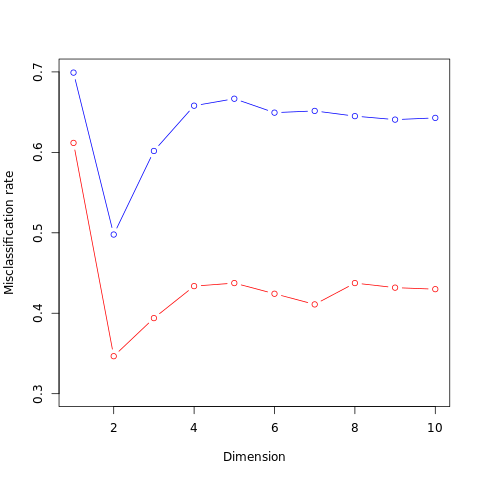

In [5]:
%%R                                                        

out    = load_vowel_data( FALSE, FALSE )
XTrain = out[[1]]
yTrain = out[[2]] 
XTest  = out[[3]]
yTest  = out[[4]] 

out2 = reduced_rank_LDA( XTrain, yTrain, XTest, yTest )

K = length(unique(yTrain)) # the number of classes (expect the classes to be labeled 1, 2, 3, ..., K-1, K 
p = dim( XTrain )[2] # the number of features

TrainClassification = out2[[4]]
TestClassification = out2[[5]]


train_error_rate = matrix( data=0, nrow=1, ncol=p )
test_error_rate = matrix( data=0, nrow=1, ncol=p )

NTrain = dim(XTrain)[1]
NTest = dim(XTest)[1]

for( pi in 1:p ){
   train_error_rate[pi] = sum( TrainClassification[,pi] != yTrain )/NTrain
   test_error_rate[pi] = sum( TestClassification[,pi] != yTest )/NTest
}

plot( 1:p, train_error_rate, col="red", ylim=c( 0.3, 0.7 ), type="b", xlab="Dimension", ylab="Misclassification rate" ) # range( c(train_error_rate,test_error_rate) )
lines( 1:p, test_error_rate, col="blue", type="b" )

FIGURE 4.10. Training and test error rates for the vowel data, as a function
of the dimension of the discriminant subspace. In this case the best error rate is
for dimension 2. Figure 4.11 shows the decision boundaries in this space.

### Impact of prior information $\pi_k$

Gaussian classification dictates the $\log\pi_k$ correction factor in the distance calculation. The reason for this correction can be seen in FIGURE 4.9. The misclassfication rate is based on the area of overlap between the two densities. If the $\pi_k$ are equal, then the optimal cut-point is midway between the projected means. If not equal, moving the cut-point toward the *smaller* class will improve the error rate. One can derive the linear rule using LDA (or any other method), and then choose the cut-point to minimize misclassification error over the training data.

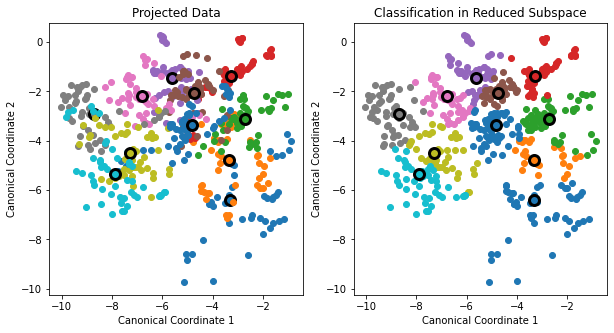

In [24]:
"""FIGURE 4.11. The decision boundaries for the classifier based on the 2D
LDA solution.

As an example of the benefit of the reduced-rank restriction, we return to
the vowel data with 11 classes and 10 variables, and hence 10 possible
dimensions for the classifier.
"""
fig411 = plt.figure(1, figsize=(10, 5))

ax1 = fig411.add_subplot(1, 2, 1)
ax2 = fig411.add_subplot(1, 2, 2)

mat_centroid2d = []
for y in range(1, size_class+1):
    mat_x2d_grouped = mat_x_canonical[df_y == y][:, -1:-3:-1]
    c = next(ax1._get_lines.prop_cycler)['color']
    ax1.plot(mat_x2d_grouped[:, 0], mat_x2d_grouped[:, 1], 'o', color=c)
    
    vec_centroid2d = mat_x2d_grouped.mean(axis=0)
    mat_centroid2d.append(vec_centroid2d)
    ax1.plot(vec_centroid2d[0], vec_centroid2d[1], 'o', color=c,
             markersize=10, markeredgecolor='black', markeredgewidth=3)

mat_centroid2d = np.array(mat_centroid2d)
vec_classified = np.array([
    ((mat_centroid2d - vec_x)**2).sum(axis=1).argmin()
    for vec_x in mat_x_canonical[:, -1:-3:-1]
])
for y, centroid in enumerate(mat_centroid2d):
    mat_x2d_classified = mat_x_canonical[vec_classified == y][:, -1:-3:-1]
    c = next(ax2._get_lines.prop_cycler)['color']
    ax2.plot(mat_x2d_classified[:, 0], mat_x2d_classified[:, 1], 'o',
             color=c)
    ax2.plot(centroid[0], centroid[1], 'o', color=c,
             markersize=10, markeredgecolor='black', markeredgewidth=3)

ax1.set_xlabel('Canonical Coordinate 1')
ax1.set_ylabel('Canonical Coordinate 2')
ax1.set_title('Projected Data')
ax2.set_xlabel('Canonical Coordinate 1')
ax2.set_ylabel('Canonical Coordinate 2')
ax2.set_title('Classification in Reduced Subspace')
plt.show()

### Connection between Fisher's reduced-rank discriminant analysis and regression of an indicator response matrix

It turns out that LDA amounts to the regression followed by an eigen-decomposition of $\hat{\mathbf{Y}}^T\mathbf{Y}$. In the case of two classes, there is a single discriminant variable that is identical up to a scalar multiplication to either of the columns of $\hat{\mathbf{Y}}$. A related fact is that if one transforms the original predictors $\mathbf{X}$ to $\hat{\mathbf{Y}}$, then LDA using $\hat{\mathbf{Y}}$ is identical to LDA in the original space (Exercise 4.3).

In [41]:
df = pd.read_csv("../../data/South African Heart Disease.txt")
names = ['sbp', 'tobacco', 'ldl', 'famhist', 'obesity', 'alcohol', 'age']
df['famhist'] = pd.get_dummies(df['famhist'])['Present']
X, y = df[names].values, df[['chd']].values
X = np.insert(X, 0, values=1, axis=1)
N, p = X.shape
X

array([[  1.  , 160.  ,  12.  , ...,  25.3 ,  97.2 ,  52.  ],
       [  1.  , 144.  ,   0.01, ...,  28.87,   2.06,  63.  ],
       [  1.  , 118.  ,   0.08, ...,  29.14,   3.81,  46.  ],
       ...,
       [  1.  , 108.  ,   3.  , ...,  20.09,  26.64,  55.  ],
       [  1.  , 118.  ,   5.4 , ...,  27.35,  23.97,  40.  ],
       [  1.  , 132.  ,   0.  , ...,  14.7 ,   0.  ,  46.  ]])

In [54]:
b_hat = np.zeros(shape=(p))
b_hat @ X[0]
df[['chd']].values[461, 0]

1

In [28]:
b_hat = np.zeros(shape=(p))
delta = np.inf
while delta > 0.000000001:
    grad = np.zeros(shape=(1, p))
    hess = np.zeros(shape=(p, p))
    loss = 0.
    for i in range(N):
        bt_xi = b_hat @ X[i]
        ebx = np.exp(bt_xi)
        pxi = ebx/(1+ebx)
        grad += X[i] * (y[i, 0] - pxi)
        xi = np.reshape(X[i], (1, p))
        hess += -(xi.T @ xi) * pxi * (1 - pxi)
        loss += y[i][0] * bt_xi - np.log(1+np.exp(bt_xi))
    delta = np.squeeze(np.linalg.inv(hess) @ grad.T)
    b_hat -= delta
    delta = delta @ delta.T
    print(loss, b_hat)

-320.2339974186954 [-2.8943  0.005   0.0681  0.1436  0.7224 -0.0297 -0.0004  0.0267]
-245.79726362664837 [-3.8984  0.0057  0.0781  0.1792  0.9061 -0.0348  0.0004  0.0395]
-241.70241294159865 [-4.1209  0.0058  0.0795  0.1846  0.9381 -0.0346  0.0006  0.0424]
-241.58716354419536 [-4.1296  0.0058  0.0795  0.1848  0.9392 -0.0345  0.0006  0.0425]
-241.58701618263942 [-4.1296  0.0058  0.0795  0.1848  0.9392 -0.0345  0.0006  0.0425]


In [29]:
y_hat = np.zeros(shape=y.shape)
for i in range(N):
    e = np.exp(b_hat @ X[i])
    ps = [1 / (1 + e), e / (1 + e)]
    y_hat[i,0] = np.argmax(ps)
np.sum(y == y_hat)

337

# $\S$ 4.4. Logistic Regression

The logistic regression model arises from the desire to model the posterior probabilities of the $K$ classes via linear functions in $x$, ensuring the natural properties of the probability: They sum to one and remain in $[0,1]$.

The model has the form

\begin{align}
\log\frac{\text{Pr}(G=1|X=x)}{\text{Pr}(G=K|X=x)} &= \beta_{10} + \beta_1^Tx \\
\log\frac{\text{Pr}(G=2|X=x)}{\text{Pr}(G=K|X=x)} &= \beta_{20} + \beta_2^Tx \\
&\vdots \\
\log\frac{\text{Pr}(G=K-1|X=x)}{\text{Pr}(G=K|X=x)} &= \beta_{(K-1)0} + \beta_{K-1}^Tx \\
\end{align}

The model is specified in terms of $K-1$ log-odds or logit transformations, reflecting the constraint that the probabilities sum to one. The choice of denominator ($K$ in this case) is arbitrary in that the estimates are equivalent under this choice.

### Sum to one

To emphasize the dependence on the entire parameter set $\theta = \left\lbrace \beta_{10}, \beta_1^T, \cdots, \beta_{(K-1)0}, \beta_{K-1}^T\right\rbrace$, we denote the probabilities

\begin{equation}
\text{Pr}(G=k|X=x) = p_k(x;\theta)
\end{equation}

A simple calculation shows that

\begin{align}
\text{Pr}(G=k|X=x) &= \frac{\exp(\beta_{k0}+\beta_k^Tx)}{1+\sum_{l=1}^{K-1}\exp(\beta_{l0}+\beta_l^Tx)}, \text{ for } k=1,\cdots,K-1, \\
\text{Pr}(G=K|X=x) &= \frac{1}{1+\sum_{l=1}^{K-1}\exp(\beta_{l0}+\beta_l^Tx)},
\end{align}

and they clearly sum to one.

When $K=2$, this model is especially simple, since there is only a single linear function.

# $\S$ 4.4.1. Fitting Logistic Regression Models

### Maximum likelihood

Logistic regression models are usually fit by maximum likelihood, using the conditional likelihood of $G$ given $X$. Since $\text{Pr}(G|X)$ completely specifies the conditional distribution, the *multinomial* distribution is appropriate.

The log-likelihood for $N$ observation is

\begin{equation}
l(\theta) = \sum_{i=1}^N \log p_{g_i}(x_i;\theta),
\end{equation}

where $p_k(x_i;\theta) = \text{Pr}(G=k|X=x_i;\theta)$

### Maximum likelihood for $K=2$ case

We discuss in detail the two-class case, sine the algorithms simplify considerably. It is convenient to code the two-class $g_i$ via a $0/1$ response $y_i$, where $y_i=1$ when $g_i=1$, and $0$ otherwise. Then we can let

\begin{align}
p_1(x;\theta) &= p(x;\theta), \\
p_2(x;\theta) &= 1- p(x;\theta). \\
\end{align}

The likelihood of the data is $$L= \prod_{i=1}^{N}p_{g_i}(x_i)=\prod_{i=1}^{N}\text{Pr }(G=1|X=x_i)^{y_i}\text{Pr }(G=2|X=x_i)^{1-y_i}$$

The log-likelihood can be written

$$\begin{align}
l(\beta) &= \sum_{i=1}^N \left\lbrace y_i\log p(x_i;\beta) + (1-y_i)\log(1-p(x_i;\beta)) \right\rbrace\\
&= \sum_{i=1}^N \left\lbrace y_i\log \left(\frac{\exp(\beta_k^Tx_i)}{1+\sum_{l=1}^{K-1}\exp(\beta_l^Tx_i)}\right) + (1-y_i)\log\left(1-\left(\frac{\exp(\beta_k^Tx_i)}{1+\sum_{l=1}^{K-1}\exp(\beta_l^Tx_i)}\right)\right) \right\rbrace\\
&= \sum_{i=1}^N \left\lbrace y_i\log \left(\frac{\exp(\beta^Tx_i)}{1+\exp(\beta^Tx_i)}\right) + (1-y_i)\log\left(1-\left(\frac{\exp(\beta^Tx_i)}{1+\exp(\beta^Tx_i)}\right)\right) \right\rbrace\\
&= \sum_{i=1}^N \left\lbrace y_i\log \left(\frac{\exp(\beta^Tx_i)}{1+\exp(\beta^Tx_i)}\right) + (1-y_i)\log\left(\frac{1}{1+\exp(\beta^Tx_i)}\right) \right\rbrace\\
&= \sum_{i=1}^N \left\lbrace y_i\left(\beta^Tx_i-\log(1+\exp(\beta^Tx_i))\right) - (1-y_i)\log\left(1+\exp(\beta^Tx_i)\right) \right\rbrace\\
&= \sum_{i=1}^N \left\lbrace y_i\beta^Tx_i - \log(1+\exp(\beta^Tx_i)) \right\rbrace,
\end{align}$$


where $\beta^T = \lbrace \beta_{10}, \beta_1^T \rbrace$, and we assume that the vector of inputs $x_i$ includes the constant term 1 to acommodate the intercept.

To maximize the log-likelihood, we set its derivatives to zero. These *score* equations are

\begin{equation}
\frac{\partial l(\beta)}{\partial\beta} = \sum_{i=1}^N x_i(y_i-p(x_i;\beta)) = 0,
\end{equation}

which are $p+1$ equations *nonlinear* in $\beta$. Notice that since $x_{i1} =1$, the first score equation specifies that

\begin{equation}
\sum_{i=1}^N y_i = \sum_{i=1}^N p(x_i;\beta),
\end{equation}

implying that the *expected* number of class ones matches the observed number (and hence also class twos).

### Newton-Raphson algorithm

To solve the score equation, we use the Newton-Raphson algorithm, which requires the second-derivative or Hessian matrix

\begin{align}
\frac{\partial^2 l(\beta)}{\partial\beta\partial\beta^T} &= \frac{\partial \left(\sum_{i=1}^N x_i(y_i-p(x_i;\beta))\right)}{\partial\beta}\\
&= -\sum_{i=1}^Nx_i\frac{\partial \left(p(x_i;\beta)\right)}{\partial\beta}\\
&= -\sum_{i=1}^Nx_i\frac{\partial \left(\frac{\exp(\beta^Tx_i)}{1+\exp(\beta^Tx_i)}\right)}{\partial\beta}\\
&= -\sum_{i=1}^Nx_i\left(\frac{x_i^T\exp(\beta^Tx_i)}{1+\exp(\beta^Tx_i)}-\frac{x_i^T\exp(\beta^Tx_i)\exp(\beta^Tx_i)}{\left(1+\exp(\beta^Tx_i)\right)^2}\right)\\
&= -\sum_{i=1}^Nx_ix_i^T\left(\frac{\exp(\beta^Tx_i)(1+\exp(\beta^Tx_i))}{\left(1+\exp(\beta^Tx_i)\right)^2}-\frac{\exp(\beta^Tx_i)\exp(\beta^Tx_i)}{\left(1+\exp(\beta^Tx_i)\right)^2}\right)\\
&= -\sum_{i=1}^Nx_ix_i^T\left(\frac{\exp(\beta^Tx_i)}{\left(1+\exp(\beta^Tx_i)\right)^2}\right)\\
&= -\sum_{i=1}^N x_ix_i^T p(x_i;\beta)(1-p(x_i;\beta)).
\end{align}

Starting with $\beta^{\text{old}}$, a single Newton update is

\begin{equation}
\beta^{\text{new}} = \beta^{\text{old}} - \left( \frac{\partial^2 l(\beta)}{\partial\beta\partial\beta^T} \right)^{-1} \frac{\partial l(\beta)}{\partial\beta},
\end{equation}

where the derivatives are evaluated at $\beta^{\text{old}}$.

### The same thing in matrix notation

Let


* $\mathbf{y}$ be the vector of $y_i$ values,
* $\mathbf{X}$ the $N\times (p+1)$ matrix of $x_i$ values,
* $\mathbf{p}$ the vector of fitted probabilities with $i$th element $p(x_i;\beta^{\text{old}})$, and
* $\mathbf{W}$ $N\times N$ diagonal matrix of weights with $i$th diagonal elements $p(x_i;\beta^{\text{old}})(1-p(x_i;\beta^{\text{old}}))$.

Then we have

\begin{align}
\frac{\partial l(\beta)}{\partial\beta} &= \mathbf{X}^T(\mathbf{y}-\mathbf{p}) \\
\frac{\partial^2l(\beta)}{\partial\beta\partial\beta^T} &= -\mathbf{X}^T\mathbf{WX},
\end{align}

and thus the Newton step is

\begin{align}
\beta^{\text{new}} &= \beta^{\text{old}} + (\mathbf{X}^T\mathbf{WX})^{-1}\mathbf{X}^T(\mathbf{y}-\mathbf{p}) \\
&= (\mathbf{X}^T\mathbf{WX})^{-1} \mathbf{X}^T\mathbf{W}\left( \mathbf{X}\beta^{\text{old}} + \mathbf{W}^{-1}(\mathbf{y}-\mathbf{p}) \right) \\
&= (\mathbf{X}^T\mathbf{WX})^{-1}\mathbf{X}^T\mathbf{W}\mathbf{z},
\end{align}

where we have re-expressed the Newton step as weighted least squares step, with the response

\begin{equation}
\mathbf{z} = \mathbf{X}\beta^{\text{old}} + \mathbf{W}^{-1}(\mathbf{y}-\mathbf{p}),
\end{equation}

sometimes known as the *adjusted response*.

### Iteratively reweighted least squares

These equations for the Newton step get solved repeatedly, since at each iteration $p$ changes, and hence so does $\mathbf{W}$ and $\mathbf{z}$. This algorithm is referred to as *iteratively reweighted least squares* or IRLS, since each iteration solves the weighted least squares problem:

\begin{equation}
\beta^{\text{new}} \leftarrow \arg\min_\beta (\mathbf{z}-\mathbf{X}\beta)^T\mathbf{W}(\mathbf{z}-\mathbf{X}\beta)
\end{equation}

It seems that $\beta=0$ is a good starting value, although convergence is never guaranteed. Typically the algorithm does converge, since the log-likelihood is concave, but overshooting can occur. In the rare cases that the log-likelihood decreases, step size halving will guarantee convergence.

### Multiclass case with $K\ge 3$

The Newton step can also be expressed as an IRLS, but with a *vector* of $K-1$ responses and a nondiagonal weight matrix per observation. (Exercise 4.4)

Alternatively coordinate-descent methods ($\S$ 3.8.6) can be used to maximize the log-likelihood efficiently.

The $\textsf{R}$ package $\textsf{glmnet}$ (Friedman et al., 2010) can fit very large logistic regression problems efficiently, both in $N$ and $p$.

### Goal of logistic regression

Logistic regression models are used mostly as a data analysis and inference tool, where the goal is to understand the role of the input variables in *explaning* the outcome. Typically many models are fit in a search for a parsimonious model involving a subset of the variables, possibly with some interactions terms. The following example illustrates some of the issues involved.

## $\S$ 4.4.2. Example: South African Heart Disease

The data in FIGURE 4.12 are a subset of the Coronary Risk-Factor Study (CORIS) baseline survey, carried out in three rural areas of the Western Cape, South Africa (Rousseauw et al., 1983). These data are described in more detail in Hastie and Tibshirani (1987).

In [1]:
"""FIGURE 4.12. A scatterplot matrix of the South African heart desease
data.

"""
import pandas as pd
import scipy
import scipy.linalg
import matplotlib.pyplot as plt

In [3]:
df_saheart = pd.read_csv('../../data/SAheart/SAheart.data.txt', index_col=0)
print('A pandas DataFrame of size {} x {} '
      'has been loaded.'.format(*df_saheart.shape))
df_saheart

A pandas DataFrame of size 462 x 10 has been loaded.


,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0


In [4]:
df_saheart.pop('adiposity')
df_saheart.pop('typea') 
df_y = df_saheart.pop('chd')
df_saheart['famhist'] = df_saheart['famhist'].map({'Present': 1,
                                                   'Absent': 0})
df_saheart.describe()

,sbp,tobacco,ldl,famhist,obesity,alcohol,age
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,0.415584,26.044113,17.044394,42.816017
std,20.496317,4.593024,2.070909,0.493357,4.213680,24.481059,14.608956
min,101.000000,0.000000,0.980000,0.000000,14.700000,0.000000,15.000000
25%,124.000000,0.052500,3.282500,0.000000,22.985000,0.510000,31.000000
50%,134.000000,2.000000,4.340000,0.000000,25.805000,7.510000,45.000000
75%,148.000000,5.500000,5.790000,1.000000,28.497500,23.892500,55.000000
max,218.000000,31.200000,15.330000,1.000000,46.580000,147.190000,64.000000


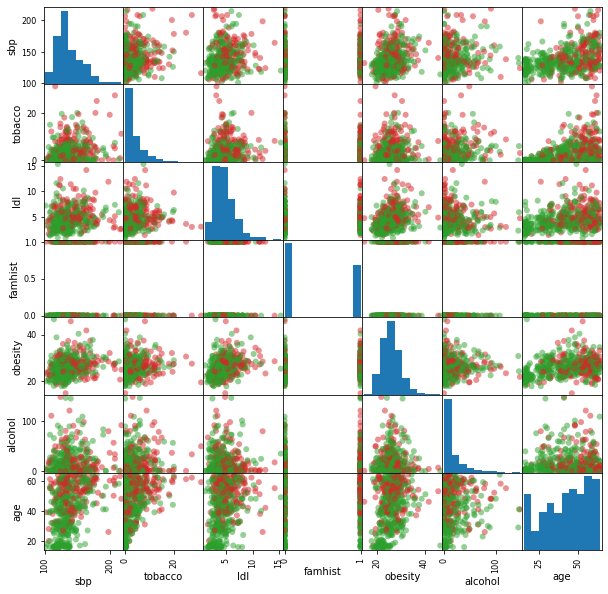

In [5]:
colors = df_y.apply(lambda y: 'C3' if y else 'C2')
pd.plotting.scatter_matrix(df_saheart, c=colors, figsize=(10, 10), marker = 'o')
plt.show()

FIGURE 4.12. A scatterplot matrix of the South African heart disease data.
Each plot shows a pair of risk factors, and the cases and controls are color coded
(red is a case). The variable family history of heart disease (famhist) is binary
(yes or no).

We fit a logistic-regression model by maximum likelihood, giving the results shown in TABLE 4.2.

In [6]:
"""TABLE 4.2. Results from a logistic regression fit to the South African
heart disease data
"""
mat_X = df_saheart.values
size_training, size_predictor = mat_X.shape
size_beta = size_predictor + 1

vec_y = df_y.values
mat_1X = np.hstack((np.ones((size_training, 1)), mat_X))


def fvec_p(mat_x:np.ndarray, vec_beta:np.ndarray)->np.ndarray:
    num = np.exp(mat_x@vec_beta)
    return num/(num+1)


def fdiag_W(mat_x:np.ndarray, vec_beta:np.ndarray)->np.ndarray:
    vec_p = fvec_p(mat_x, vec_beta)
    return vec_p*(1-vec_p)

In [7]:
vec_beta_old = np.zeros(size_beta)
vec_increment = np.ones(size_beta)
while (vec_increment**2).sum() > 1e-8:
    vec_p = fvec_p(mat_1X, vec_beta_old)
    gradient = mat_1X.T @ (vec_y-vec_p)
    hessian = mat_1X.T @ np.diag(fdiag_W(mat_1X, vec_beta_old)) @ mat_1X
    vec_increment = scipy.linalg.solve(hessian, gradient)
    vec_beta_new = vec_beta_old + vec_increment
    vec_beta_old = vec_beta_new.copy()

In [46]:
import math
mat_xWx_inv = scipy.linalg.inv(mat_1X.T @ np.diag(fdiag_W(mat_1X, vec_beta_new)) @ mat_1X)
vec_y_fitted = []
for i in 1-fvec_p(mat_1X, vec_beta_new):
    value = 1 if i > 0.5 else 0
    vec_y_fitted.append(value)
est_sigma2 = sum((vec_y-vec_y_fitted)**2)/(size_training-size_predictor-1)
table_stderr = [math.sqrt(mat_xWx_inv[j, j]*est_sigma2)
                for j in range(size_predictor+1)]
Z_Score = vec_beta_new/table_stderr
table_stderr

[0.8307079712754366,
 0.004852899700883536,
 0.022586133885393725,
 0.049464390940702214,
 0.1937428632282466,
 0.025076456406714104,
 0.003838312168845923,
 0.008766703653259727]

In [47]:
print('{0:>15} {1:>15} {2:>15} {3:>15}'.format('Term', 'Coefficient',
                                               'Std. Error', 'Z Score'))
print('-'*64)
table_term = ['intercept'] + list(df_saheart.columns)
for term, coeff, stderr, Z_Score in zip(table_term, vec_beta_new, table_stderr, Z_Score):
    print('{0:>15} {1:>15f} {2:>15f} {3:>15f}'.format(term, coeff, stderr, Z_Score))

           Term     Coefficient      Std. Error         Z Score
----------------------------------------------------------------
      intercept       -4.129600        0.830708       -4.971181
            sbp        0.005761        0.004853        1.187059
        tobacco        0.079526        0.022586        3.520994
            ldl        0.184779        0.049464        3.735603
        famhist        0.939185        0.193743        4.847588
        obesity       -0.034543        0.025076       -1.377525
        alcohol        0.000607        0.003838        0.158013
            age        0.042541        0.008767        4.852589


This summary includes $Z$ scores ($\frac{\text{coefficients}}{\text{stderr}}$); a nonsignificant $Z$ score suggests a coefficient can be dropped from the model. Each of these correspond formally to a test of the null hypothesis that the coefficient in question is zero, while all the others are not (a.k.a. the Wald test).

### Correlations between predictors

There are some surprises in this table, which must be interpreted with caution. Systolic blood pressure ($\textsf{sbp}$) is not significant! Nor is $\textsf{obesity}$, and its sign is negative.

This confusion is a result of the correlation between the set of predictors. On their own, both $\textsf{sbp}$ and $\textsf{obesity}$ are significant, However, in the presense of many other correlated variables, thery are no longer needed (and can even get a negative sign).

### Model selection

At this stage the analyst might do some model selection; find a subset of the variables that are sufficient for explaining their joint effect on the prevalence of the response ($\textsf{chd}$).

One way to proceed by is to drop the least significant coefficient, and refit the model. This is done repeatedly until no further terms can be dropped. This gave the model shown in TABLE 4.3.

A better but time-consuming strategy is to refit each of the models with one variable removed, and then perform an *analysis of deviance* to decide which variable to exclude.

The residual deviance of a fitted model is

\begin{equation}
\text{residual deviance}(\beta) = -2\text{ log-likelihood}(\beta),
\end{equation}

and the deviance between two models is the difference of their residual deviance, as

\begin{equation}
\text{deviance}(\beta^{(1)}, \beta^{(2)}) = \text{residual deviance}(\beta^{(1)}) - \text{residual deviance}(\beta^{(2)}).
\end{equation}

This strategy gave the same final model as TABLE 4.3.

TABLE 4.3. Results from stepwise logistic regression fit to South African heart
disease data.

In [61]:
%%R

SAheart = read.csv('../../data/SAheart/SAheart.data.txt', header=TRUE)

m_Largest = glm( chd ~ sbp + tobacco + ldl + famhist + obesity + alcohol + age, family=binomial(), data=SAheart )
m_Smallest = glm( chd ~ 1.0, family=binomial(), data=SAheart )

stepped_model = step( m_Largest, scope=list(lower=~+1, upper=~sbp + tobacco + ldl + famhist + obesity + alcohol + age), direction="backward", data=SAheart )

print( stepped_model )
summary(stepped_model)

Start:  AIC=499.17
chd ~ sbp + tobacco + ldl + famhist + obesity + alcohol + age

          Df Deviance    AIC
- alcohol  1   483.19 497.19
- sbp      1   484.22 498.22
- obesity  1   484.61 498.61
<none>         483.17 499.17
- tobacco  1   493.05 507.05
- ldl      1   494.09 508.09
- famhist  1   500.89 514.89
- age      1   501.51 515.51

Step:  AIC=497.19
chd ~ sbp + tobacco + ldl + famhist + obesity + age

          Df Deviance    AIC
- sbp      1   484.30 496.30
- obesity  1   484.63 496.63
<none>         483.19 497.19
- tobacco  1   493.62 505.62
- ldl      1   494.12 506.12
- famhist  1   501.07 513.07
- age      1   501.54 513.54

Step:  AIC=496.3
chd ~ tobacco + ldl + famhist + obesity + age

          Df Deviance    AIC
- obesity  1   485.44 495.44
<none>         484.30 496.30
- tobacco  1   494.99 504.99
- ldl      1   495.36 505.36
- famhist  1   501.93 511.93
- age      1   507.07 517.07

Step:  AIC=495.44
chd ~ tobacco + ldl + famhist + age

          Df Deviance    AIC


### Interpretation of a coefficient

How does one interpret $\textsf{tobacco}$ coefficient of $0.081$ ($\text{Std. Error} = 0.026$), for example?

An increase of $1\text{kg}$ in lifetime tobacco usage accounts for an increase in the odds of coronary heart disease of $\exp(0.081)=1.084$ or $8.4\%$.

Incorporating the standard error we get an approximate $95\%$ confidence interval of

\begin{equation}
\exp(0.081 \pm 2\times 0.026) = (1.03, 1.14).
\end{equation}

We see that some of the variables have nonlinear effects, and when modeled appropriately, are not excluded from the model.

## $\S$ 4.4.3. Quadratic Approximations and Inference

The maximum-likelihood parameter estimates $\hat\beta$ satisfy a self-consistency relationship: they are the coefficients of a weighted least squares fit, where the responses are:
$$z_i=x_i^T\hat\beta+\frac{(y_i-\hat p_i)}{\hat p_i(1-\hat p_i)}$$ and the weights are $w_i = \hat p_i(1− \hat p_i)$, both depending on $\hat\beta$ itself. Apart from providing a convenient algorithm, this connection with least squares has more to offer:

* The weighted residual sum-of-squares is the familiar Pearson chi-square
statistic $$\sum_{i=1}^{N}\frac{(y_i-\hat p_i)^2}{\hat p_i(1-\hat p_i)}$$ a quadratic approximation to the deviance.

* Asymptotic likelihood theory says that if the model is correct, then
$\hat\beta$ is consistent (i.e., converges to the true $\beta$).

* A central limit theorem then shows that the distribution of $\hat\beta$ converges to $N(\beta, (X^TWX)^{−1})$. This and other asymptotics can be derived
directly from the weighted least squares fit by mimicking normal theory inference.

* Model building can be costly for logistic regression models, because
each model fitted requires iteration. Popular shortcuts are the Rao
score test which tests for inclusion of a term, and the Wald test which
can be used to test for exclusion of a term. Neither of these require
iterative fitting, and are based on the maximum-likelihood fit of the
current model. It turns out that both of these amount to adding
or dropping a term from the weighted least squares fit, using the
same weights. Such computations can be done efficiently, without
recomputing the entire weighted least squares fit.

## $\S$ 4.4.4 $L_1$ Regularized Logistic Regression  

The L1 penalty used in the lasso (Section 3.4.2) can be used for variable
selection and shrinkage with any linear regression model. For logistic regression,
we would maximize a penalized version of 
$$\begin{align}
l(\beta) &= \sum_{i=1}^N \left\lbrace y_i\log p(x_i;\beta) + (1-y_i)\log(1-p(x_i;\beta)) \right\rbrace \\
&= \sum_{i=1}^N \left\lbrace y_i\beta^Tx_i - \log(1+\exp(\beta^Tx)) \right\rbrace,\quad (4.20)
\end{align}
$$

$$\underset{\beta_0,\beta}{\text{max}}\left\lbrace\sum_{i=1}^N \left[y_i\left(\beta_0+\beta^Tx_i\right)- \log\left(1+\exp(\beta_0+\beta^Tx_i)\right)\right]-\lambda\sum_{j=1}^{p}|\beta_j|\right\rbrace, \quad (4.31)$$
As with the lasso, we typically do not penalize the intercept term, and standardize the predictors for the penalty to be meaningful. Criterion (4.31) is concave, and a solution can be found using nonlinear programming methods
(Koh et al., 2007, for example). Alternatively, using the same quadratic
approximations that were used in the Newton algorithm in Section 4.4.1,
we can solve (4.31) by repeated application of a weighted lasso algorithm.
Interestingly, the score equations [see (4.24)] for the variables with non-zero
coefficients have the form $$x_j^T(y-p)=\lambda\cdot\text{sign}(\beta_j), \quad(4.32)$$  which generalizes $$x_j^T(y-X\beta)=\lambda\cdot\text{sign}(\beta_j), \quad(3.58)$$ in Section 3.4.4; the active variables are tied in their generalized correlation with the residuals.
Path algorithms such as LAR for lasso are more difficult, because the
coefficient profiles are piecewise smooth rather than linear. Nevertheless,
progress can be made using quadratic approximations.

R[write to console]: The following objects are masked from heart.data (pos = 3):

    x, y


R[write to console]: The following objects are masked from heart.data (pos = 4):

    x, y




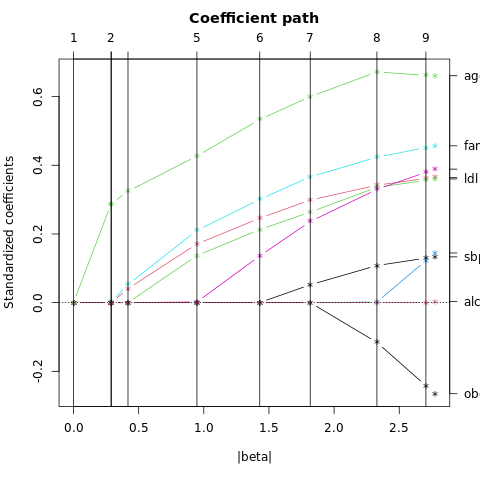

In [51]:
%%R
library(glmpath)
data(heart.data)
attach(heart.data)
fit <- glmpath(x, y, family=binomial)
par(mfrow=c(1, 1))
plot(fit)

FIGURE 4.13. L1 regularized logistic regression coefficients for the South
African heart disease data, plotted as a function of the L1 norm. The variables
were all standardized to have unit variance. The profiles are computed exactly at
each of the plotted points.

R[write to console]: The following objects are masked from heart.data (pos = 3):

    x, y


R[write to console]: The following objects are masked from heart.data (pos = 4):

    x, y


R[write to console]: The following objects are masked from heart.data (pos = 5):

    x, y


R[write to console]: The following objects are masked from heart.data (pos = 6):

    x, y


R[write to console]: The following objects are masked from heart.data (pos = 7):

    x, y




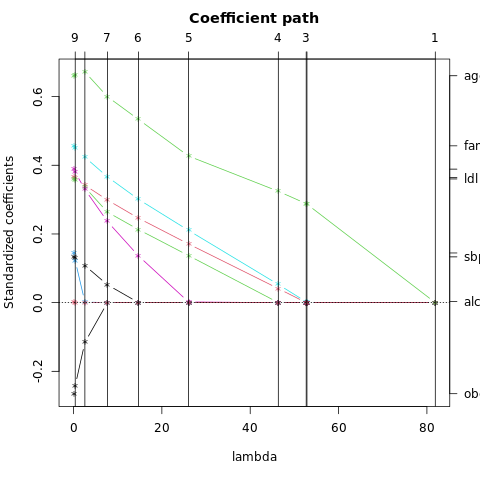

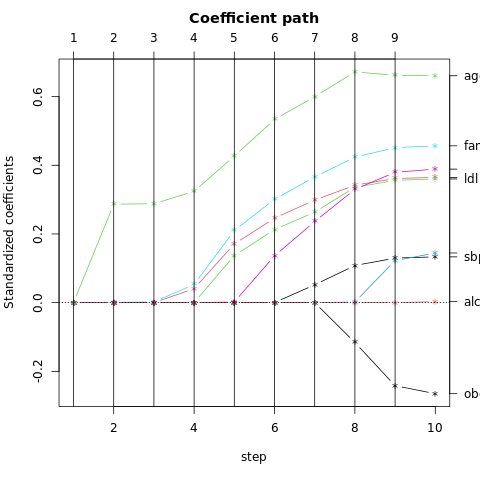

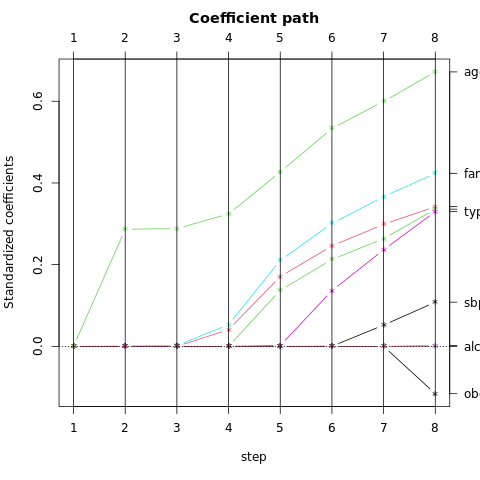

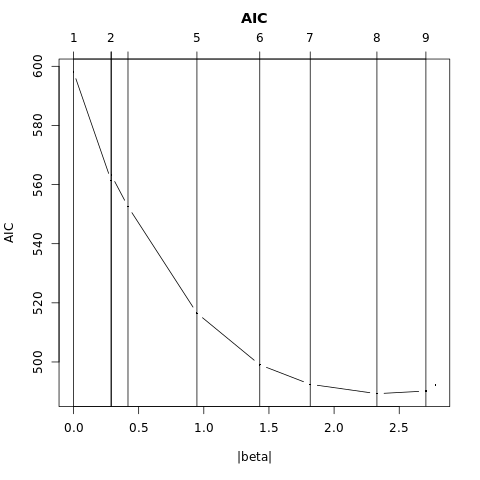

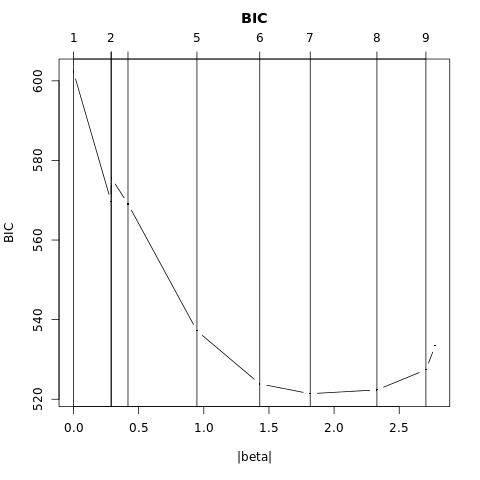

In [56]:
%%R
library(glmpath)
data(heart.data)
attach(heart.data)
fit <- glmpath(x, y, family=binomial)
plot(fit, xvar="lambda")
plot(fit, xvar="step")
plot(fit, xvar="step", xlimit=8)
plot(fit, type="aic")
plot(fit, type="bic")

## $\S$ 4.4.5 Logistic Regression or LDA?
### Common linearity

LDA has the log-posterior odds which are linear functions of x:

\begin{align}
\log\frac{\text{Pr}(G=k|X=x)}{\text{Pr}(G=K|X=x)} &= \log\frac{\pi_k}{\pi_K} - \frac{1}{2}(\mu_k-\mu_K)^T\Sigma^{-1}(\mu_k-\mu_K) + x^T\Sigma^{-1}(\mu_k-\mu_K) \\
&= \alpha_{k0} + \alpha_k^Tx,
\end{align}

and this linearity is a consequence of the Gaussian assumption for the class densities with a common covariance matrix.

The linear logistic model by construction has linear logits:

\begin{equation}
\log\frac{\text{Pr}(G=k|X=x)}{\text{Pr}(G=K|X=x)} = \beta_{k0} + \beta_k^Tx
\end{equation}

It seems that the models are the same. Although they have exactly the same
form, the difference lies in the way the linear coefficients are estimated. The
logistic regression model is more general, in that it makes less assumptions.
We can write the **joint density** of $X$ and $G$ as $$\text{Pr}(X,G=k)=\text{Pr}(G=k|X)\text{Pr}(X), \quad(4.35)$$


where $Pr(X)$ denotes the marginal density of the inputs $X$. For both LDA
and logistic regression, the first term on the right has the logit-linear
form:

\begin{equation}
\text{Pr}(G=k|X=x) = \frac{\exp(\beta_{k0}+\beta_k^Tx)}{1+\sum_{l=1}^{K-1}\exp(\beta_{l0}+\beta_l^Tx)} \quad(4.36)
\end{equation}

where we have again arbitrarily chosen the last class as the reference.

### Different assumptions

Although they have exactly the same form, the difference lies in the way the linear coefficients are estimated: The logistic regression model is more general, in that it makes less assumptions.

Note the *joint density* of $X$ and $G$ as

\begin{equation}
\text{Pr}(X,G=k) = \text{Pr}(X)\text{Pr}(G=k|X),
\end{equation}

where $\text{Pr}(X)$ denotes the marginal density of the inputs $X$.

The logistic regression model leaves $\text{Pr}(X)$ as an arbitrary density function, and fits the parameters of $\text{Pr}(G|X)$ by maximizing the *conditional likelihood* -- the multinomial likelihood with probabilities the $\text{Pr}(G=k|X)$. Although $\text{Pr}(X)$ is totally ignored, we can think of this marginal density as being estimated in a fully nonparametric and unrestricted fashion, using empirical distribution function which places mass $1/N$ at each observation.

LDA fits the parameters by maximizing the full log-likelihood, based on the joint density

\begin{equation}
\text{Pr}(X,G=k) = \phi(X;\mu_k,\Sigma)\pi_k,
\end{equation}

where $\phi$ is the Gaussian density function. Standard normal theory leads easily to the estimates $\hat\mu_k$, $\hat\Sigma$, and $\hat\pi_k$ given in Section 4.3. Since the linear parameters of the logistic form

\begin{equation}
\log\frac{\text{Pr}(G=k|X=x)}{\text{Pr}(G=K|X=x)} = \log\frac{\pi_k}{\pi_K} - \frac{1}{2}(\mu_k-\mu_K)^T\Sigma^{-1}(\mu_k-\mu_K) + x^T\Sigma^{-1}(\mu_k-\mu_K)
\end{equation}

are functions of the Gaussian parameters, we get their maximum-likelihood estimates by plugging in the corresponding estimates.

### Role of the marginal density $\text{Pr}(X)$ in LDA

However, unlike in the conditional case, the marginal density $\text{Pr}(X)$ does play a role here. It is a mixture density

\begin{equation}
\text{Pr}(X) = \sum_{k=1}^K \pi_k\phi(X;\mu_k,\Sigma),
\end{equation}

which also involves the parameters. What role can this additional component or restriction play?

By relying on the additional model assumptions, we have more information about the parameters, and hence can estimate them more efficiently (lower variance). If in fact the true $f_k(x)$ are Gaussian, then in the worst case ignoring this marginal part of the likelihood constitutes a loss of efficiency of about $30\%$ asymptotically in the error rate (Efron, 1975). Paraphrasing: With $30\%$ more data, the conditional likelihood will do as well.

For example, observations far from the decision boundary (which are down-weighted by logistic regression) play a role in estimating the common covariance matrix. This is not a good news, because it also means that LDA is not robust to gross outliers.

### Marginal likelihood as a regularizer

The marginal likelihood can be thought of as a regularizer, requiring in some sense that class densities be *visible* from this marginal view.

For example, if the data in a two-class logistic regression model can be perfectly separated by a hyperplane, the maximum likelihood estimates of the parameters are undefined (i.e., infinite; see Exercise 4.5).

The LDA coefficients for the same data will be well defined, since the marginal likelihood will not permit these degeneracies.

### In real world

> It is generally felt that logistic regression is a safer and more robust bet than the LDA model, relying on fewer assumptions.

In practice these assumptions are never correct, and often some of the components of $X$ are qualitative variables. It is our experience that the models give very similar results, even when LDA is used inappropriately, such as with qualitative predictors.

In [6]:
import numpy as np
from numpy.linalg import norm
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# |Figure 4.14 shows 20 data points in two classes R^2. 
# |These data can be separated by a linear boundary.
points = np.array([[ 65, 410,   1], [331, 479,   1], [483, 483,   1], 
                   [318, 410,   1], [187, 348,   1], [192, 310,   1],
                   [223, 234,   1], [270, 241,   1], [339, 254,   1],
                   [303, 209,   1],
                   [168, 244,  -1], [222, 192,  -1], [168, 213,  -1],
                   [ 16, 214,  -1], [197, 180,  -1], [ 48, 120,  -1],
                   [ 91, 110,  -1], [192,  79,  -1], [219, 107,  -1],
                   [223,  66,  -1]])
X, Y = points[:,:2], points[:,2]
colors = np.array(['red', '', 'green'])[Y+1]

In [4]:
def plot_separating_line(b0, b1, b2, c):
    fig, ax1 = plt.subplots(figsize=(3.35, 3.1), dpi=110)
    ax1.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)
    fig.subplots_adjust(left=0, right=1, top=1, bottom=0)
    ax1.scatter(points[:,0], points[:,1], color=colors, s=8)
    ax1.plot([-10, 510], [-(b0-10*b1)/b2, -(b0+510*b1)/b2], color=c, lw=1)
    ax1.set_xlim(-10, 510)
    ax1.set_ylim(50, 510)

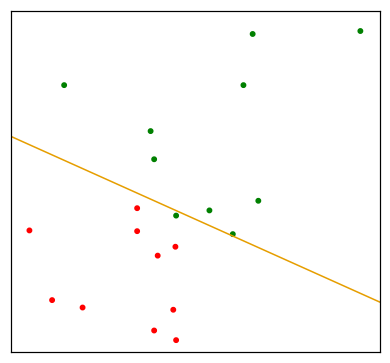

In [7]:
# |The orange line is the least squares solution to the problem, 
# |obtained by regressing the -1/1 response Y on X (with intercept); 
# |the line is given by {x: b0 + b1*x1 + b2*x2 = 0}.
reg = LinearRegression().fit(X, Y)
b0, b1, b2 = reg.intercept_, *reg.coef_
# |This least squares solution does not do a perfect job 
# |in separating the points, and makes one error.
plot_separating_line(b0, b1, b2, '#E69E00')

In [8]:
# The perceptron learning algorithm tries to find separating hyperplane
# by minimizing the distance of missclassified points to the decision bounary.
p = 0.000001
for k in range(1000):
    has_misclassifications = False
    for i in range(points.shape[0]):
        if np.sign(X[i] @ np.array([b1, b2]) + b0) != Y[i]:            
            # The algorithm in fact uses stochastic gradient descent to minimize this 
            # piecewise linear criterion. This means that rather that computing the 
            # sum of the dradient contributions of each observation followed by a step
            # in the negative gradient direction, a step is taken after each observation
            # is visited
            db = p * Y[i] * points[i] # delta b
            b0 += p* Y[i]
            b1 += db[0]
            b2 += db[1]
            has_misclassifications = True
    if not has_misclassifications:
        break
print('epochs', k)

epochs 1


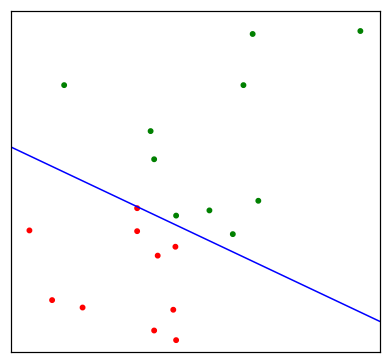

In [9]:
plot_separating_line(b0, b1, b2, 'b')

In [10]:
# CVXPY is a Python-embedded modeling language for convex optimization problems. 
# It automatically transforms the problem into standard form, calls a solver, and unpacks the results.
b0, b1, b2 = cp.Variable(), cp.Variable(), cp.Variable()
objective = cp.Minimize(0.5*(b1**2 + b2**2))
constraints = []
for i in range(X.shape[0]):
    constraints.append(Y[i]*(X[i,0]*b1+X[i,1]*b2+b0) >= 1)
prob = cp.Problem(objective, constraints)
result = prob.solve()
b0, b1, b2 = b0.value, b1.value, b2.value

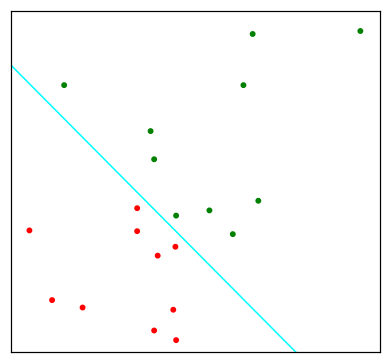

In [14]:
plot_separating_line(b0, b1, b2, 'cyan')

FIGURE 4.14. A toy example with two classes separable by a hyperplane. The
orange line is the least squares solution, which misclassifies one of the training
points. Also shown are blue and cyan separating hyperplanes found by the perceptron
learning algorithm with different random starts.

# $\S$ 4.5. Separating Hyperplanes

We describe separating hyperplane classifiers, constructing linear decision boundaries that explicitly try to separate the data into different classes as well as possible. They provide the basis for support vector classifiers, discussed in Chapter 12.

FIGURE 4.14 shows 20 data points of two classes in $\mathbb{R}^2$, which can be separated by a linear boundary but there are infinitely many possible *separating hyperplanes*.

The orange line is the least squares solution to the problem, obtained by regressing the $-1/1$ response $Y$ on $X$ with intercept; the line is given by

\begin{equation}
\left\lbrace x: \hat\beta_0 + \hat\beta_1x_1 + \hat\beta_2x_2=0 \right\rbrace.
\end{equation}

This least squares solution does not do a perfect job in separating the points, and makes one error. This is the same boundary found by LDA, in light of its equivalence with linear regression in the two-class case ($\S$ 4.3 and Exercise 4.2).

### Perceptrons

Classifiers such as above, that compute a linear combination of the input features and return the sign, were called *perceptrons* in the engineering literatur in the late 1950s (Rosenblatt, 1958). Perceptrons set he foundations for the neural network models of the 1980s and 1990s.

### Review on vector algebra

FIGURE 4.15 depicts a hyperplane or *affine set* $L$ defined by the equation

\begin{equation}
f(x) = \beta_0 + \beta^T x = 0,
\end{equation}

since we are in $\mathbb{R}^2$ this is a line.

Here we list some properties:
1. For any two points $x_1$ and $x_2$ lying in $L$,  
\begin{equation}
\beta^T(x_1-x_2)=0,
\end{equation}
and hence the unit vector $\beta^* = \beta/\|\beta\|$ is normal to the surface of $L$.
2. For any point $x_0$ in $L$,  
\begin{equation}
\beta^Tx_0 = -\beta_0.
\end{equation}
3. The signed distance of any point $x$ to $L$ is given by  
\begin{align}
\beta^{*T}(x-x_0) &= \frac{1}{\|\beta\|}(\beta^Tx+\beta_0) \\
&= \frac{1}{\|f'(x)\|}f(x).
\end{align}
Hence $f(x)$ is proportional to the signed distance from $x$ to the hyperplane defined by $f(x)=0$.

Text(2.2, 1.5, '$\\beta_0+\\beta^Tx=0$')

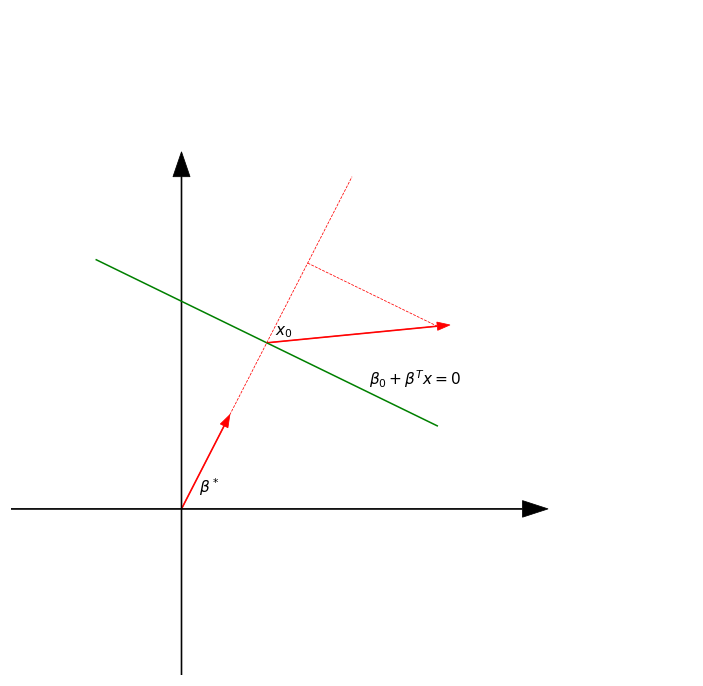

In [145]:
from scipy import stats
a = (0, 1)
b = (0, 2)
c = (-1, 3)

slope, intercept, r_value, p_value, std_err = stats.linregress(a,b)

# (Note that although math.sqrt returns only one number, in general there is a positive and negative square root. 
# C corresponds to the positive square root, and D to the negative).


fig35 = plt.figure(figsize=(8, 8), dpi=110)
ax1 = fig35.add_subplot(1, 1, 1)
ax1.plot([c[0],3.0], [c[1], c[1]+c[0]/slope-3.0/slope], color='g', lw=1)
ax1.axis('off')
ax1.set_xlim(-2, 6)
ax1.set_ylim(-2, 6)
ax1.arrow(0, 0, dx=0.5, dy=1, color='r', head_width=0.1,width=.01, linewidth=0.5)
ax1.arrow(-2, 0, dx=6, dy=0, color='0', head_width=0.2,width=.01, linewidth=0.5)
ax1.arrow(0, -2, dx=0, dy=6, color='0', head_width=0.2,width=.01, linewidth=0.5)

ax1.plot([0.5,2], [1, 4], 'r--', lw=0.5)
ax1.arrow(1, 2, dx=2, dy=0.2, color='r', head_width=0.1,width=.01, linewidth=0.5)
ax1.plot([(2.2+3/slope)/(2+1/slope),3], [2*(2.2+3/slope)/(2+1/slope), 2.2], 'r--', lw=0.5)
ax1.text(1.1, 2.1, r'$x_0$')
ax1.text(.2, .2, r'$\beta^*$')
ax1.text(2.2, 1.5, r'$\beta_0+\beta^Tx=0$')

FIGURE 4.15. The linear algebra of a hyperplane (affine set).

## $\S$ 4.5.1. Rosenblatt's Perceptron Learning Algorithm

> The *perceptron learning algorithm* tries to find a separating hyperplane by minimizing the distance of misclassified points to the decision boundary.

If a response $y_i=1$ is misclassified, then $x_i^T\beta + \beta_0 \lt 0$, and the opposite for a misclassified response with $y_i=-1$. The goal is to minimize

\begin{equation}
D(\beta,\beta_0) = -\sum_{i\in\mathcal{M}} y_i(x_i^T\beta + \beta_0),
\end{equation}

where $\mathcal{M}$ indexes the set of misclassified points. The quantity is non-negative and proportional to the distance of the misclassified points to the decision boundary defined by $\beta^Tx+\beta_0=0$.

Assuming $\mathcal{M}$ is fixed, the gradient is given by

\begin{align}
\partial\frac{D(\beta,\beta_0)}{\partial\beta} &= -\sum_{i\in\mathcal{M}} y_ix_i, \\
\partial\frac{D(\beta,\beta_0)}{\partial\beta_0} &= -\sum_{i\in\mathcal{M}} y_i.
\end{align}

### Stochastic gradient descent

The algorithm in face uses *stochastic gradient descent* to minimize this piecewise linear criterion. This means that rather than computing the sum of the gradient contributions of each observation followed by a step in the negative gradient direction, a step in taken after each observation is visited.

Hence the misclassified observations are visited in some sequence, and the parameters $\beta$ are updated via

\begin{equation}
\begin{pmatrix}\beta \\ \beta_0\end{pmatrix}
\leftarrow
\begin{pmatrix}\beta \\ \beta_0\end{pmatrix}
+
\rho \begin{pmatrix}y_ix_i \\ y_i\end{pmatrix},
\end{equation}

where $\rho$ is the learning rate, which in this case can be taken to be $1$ without loss in generality.

If the classes are linearly separable, it can be shown that the algorithm converges to a separating hyperplane in a finite number of steps (Exercise 4.6). FIGURE 4.14 shows two solutions to a toy problem, each started at a different random guess.

### Issues

There are a number of problems with this algorithm, summarized in Ripley (1996):


* When the data are separable, there are many solutions, and which one is found depends on the starting values.
* The "finite" number of steps can be very large. The smaller the gap, the longer the time to find it.
* When the data are not separable, the algorithm will not converge, and cycles develop. The cycles can be long and therefore hard to detect.

The second problem can often be eliminated by seeking a hyperplane not in the orignal space, but in a much enlarged space obtained by creating many basis-function transformations of the original variables. This is analogous to driving the residuals in a ploynomial regression problem down to zero by making the degree sufficiently large.

Perfect separation cannot always be achieved: For example, if observations from two different classes share the same input. It may not be desirable either, since the resulting model is likely to be overfit and will not generalizes well.

A rather elegant solution to the first problem is to add additional constraints to the separating hyperplane.

## $\S$ 4.5.2. Optimal Separating Hyperplanes

The *optimal separating hyperplanes* separates the two classes and maximizes the distance to the closest point from either class (Vapnik, 1996). Not only does this provide a unique solution to the separating hyperplane problem, but by maximizing the margin between two classes on the training data, this leads to better classification performance on test data.

### Formulation

We need to generalize the perceptron criterion

\begin{equation}
D(\beta,\beta_0) = -\sum_{i\in\mathcal{M}} y_i(x_i^T\beta + \beta_0).
\end{equation}

Consider the optimization problem

\begin{equation}
\max_{\beta,\beta_0,\|\beta\|=1} M \\
\text{subject to } y_i(x_i^T\beta + \beta_0) \ge M, \text{ for } i = 1,\cdots,N.
\end{equation}

The set of conditions ensure that all the points are at least a signed distance $M$ from the decision boundary defined by $\beta$ and $\beta_0$, and we seek the largest such $M$ and associated parameters.

We can get rid of the $\|\beta\| = 1$ constraint by replacing the conditions with

\begin{equation}
\frac{1}{\|\beta\|} y_i(x_i^T\beta + \beta_0) \ge M, \\
\text{or equivalently} \\
y_i(x_i^T\beta + \beta_0) \ge M\|\beta\|,
\end{equation}

which redefines $\beta_0$.

Since for any $\beta$ and $\beta_0$ satisfying these inequalities, any positively scaled multiple satisfies them too, we can arbitrarily set

\begin{equation}
\|\beta\| = \frac{1}{M},
\end{equation}

which leads to the equivalent formulation as

\begin{equation}
\min_{\beta,\beta_0} \frac{1}{2}\|\beta\|^2 \\
\text{subject to } y_i(x_i^T\beta + \beta_0) \ge 1, \text{ for }i=1,\cdots,N.
\end{equation}

In light of $(4.40)$, the constraints define an empty slab or margin around the linear decision boundary of thickness $1/\|\beta\|$. Hence we choose $\beta$ and $\beta_0$ to maximize its thickness.

### Convex optimization

This is a convex optimization problem (quadratic criterion with linear inequality constraints). The Lagrange (primal) function, to be minimized w.r.t. $\beta$ and $\beta_0$, is

\begin{equation}
L_P = \frac{1}{2}\|\beta\|^2 - \sum_{i=1}^N \alpha_i \left[ y_i(x_i^T\beta + \beta_0) -1 \right].
\end{equation}

Setting the derivatives to zero, we obtain:

\begin{align}
\beta &= \sum_{i=1}^N \alpha_i y_i x_i, \\
0 &= \sum_{i=1}^N \alpha_i y_i,
\end{align}

and substitutig these in $L_P$ we obtain the so-called Wolfe dual

$$\begin{align}
L_D &= \sum_{i=1}^N \alpha_i - \frac{1}{2}\|\beta\|^2\\
&= \sum_{i=1}^N \alpha_i - \frac{1}{2} \sum_{i=1}^N \sum_{k=1}^N \alpha_i \alpha_k y_i y_k x_i^T x_k \\
&\text{subject to } \alpha_i \ge 0 \text{ and } \sum_{i=1}^N \alpha_i y_i = 0.
\end{align}$$

The solution is obtained by maximizing $L_D$ in the positive orthant, a simpler convex optimization problem, for which standard software can be used. In addition the solution must satisfy the Karush-Kuhn-Tucker (KKT) conditions, which includes the above three conditions and

\begin{equation}
\alpha_i \left[ y_i (x_i^T\beta + \beta_0)-1 \right] = 0, \forall i.
\end{equation}

### Implications of the algorithm

From these we can see that


* if $\alpha_i \gt 0$, then $y_i(x_i^T\beta + \beta_0) = 1$, or in other words, $x_i$ is on the boundary of the slab;
* if $y_i(x_i^T\beta + \beta_0) \gt 1$, $x_i$ is not on the boundary of the slab, and $\alpha_i = 0$.

From the above condition of the primal Lagrange function

\begin{equation}
\beta = \sum_{i=1}^N \alpha_i y_i x_i,
\end{equation}

we see that the solution vector $\beta$ is defined in terms of a linear combination of the *support points* $x_i$ -- those points defined to be on the boundary of slab via $\alpha_i \gt 0$.

FIGURE 4.16 shows the optimal separating hyperplane for our toy example; these are three support points. Likewise, $\beta_0$ is obtained by solving the last KKT condition

\begin{equation}
\alpha_i \left[ y_i (x_i^T\beta + \beta_o) \right] = 0,
\end{equation}

for any of the support points.

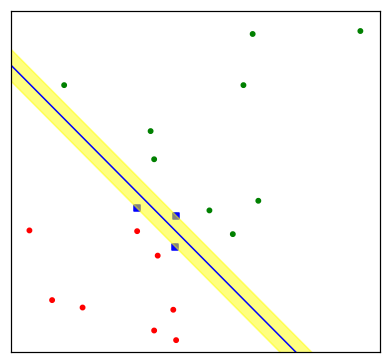

In [60]:
"""FIGURE 4.16. Optimal separating hyperplane

The same data aas in FIGURE 4.14. The shaded region delineates the maximum
margin separating the two classes. There are three support points
indicated, which lie on the boundary of the margin, and the optimal
separating hyperplane (blue line) bisects the slab. Included in the figure
is the boundary found using logistic regreesion (red line), which is very
close to the optimal separating hyperplane (see Section 12.3.3).

https://docs.scipy.org/doc/scipy/reference/optimize.html"""

b0, b1, b2 = cp.Variable(), cp.Variable(), cp.Variable()
objective = cp.Minimize(0.5*(b1**2 + b2**2))
constraints = []
for i in range(X.shape[0]):
    constraints.append(Y[i]*(X[i,0]*b1+X[i,1]*b2+b0) >= 1)
prob = cp.Problem(objective, constraints)
result = prob.solve()
b0, b1, b2 = b0.value, b1.value, b2.value
plot_separating_line(b0, b1, b2, 'b')

# the distances of the points
distances = (b0+b1*X[:,0]+b2*X[:,1])/math.sqrt(b1**2+b2**2)
distances[np.argsort(abs(distances))]
nearpoints = X[np.argsort(abs(distances))][0:3,:]

# the slab margin
dist = abs(distances[np.argsort(abs(distances))][0])
slope = (-(b0-10*b1)/b2+(b0+510*b1)/b2)/(-10-510)
slope2 = -1.0/slope
margin = math.sqrt(dist**2+(dist/slope2)**2)

plt.scatter(nearpoints[:,0], nearpoints[:,1], color="b", s=15, marker = "s")
plt.fill_between([-10, 510], [-(b0-10*b1)/b2+margin, -(b0+510*b1)/b2+margin], 
                 [-(b0-10*b1)/b2-margin, -(b0+510*b1)/b2-margin], color='yellow',
                alpha = 0.5)

FIGURE 4.16. The same data as in Figure 4.14. The shaded region delineates
the maximum margin separating the two classes. There are three support points
indicated, which lie on the boundary of the margin, and the optimal separating
hyperplane (blue line) bisects the slab. Included in the figure is the boundary found
using logistic regression (red line), which is very close to the optimal separating
hyperplane (see Section 12.3.3).

### Classification

The optimal separating hyperplane produces a function $\hat{f}(x) = x^T\hat\beta + \hat\beta_0$ for classifying new observations:

\begin{equation}
\hat{G}(x) = \text{sign } \hat{f}(x).
\end{equation}

Although none of the training observations fall in the margin (by construction), this will not necessarily be the case for test observations. The intuition is that a large margin on the training data will lead to good separation on the test data.

### Dependency on model assumption

The description of the solution in terms of support points seems to suggest that the optimal hyperplane focuses more on the points that count, and is more robust to model misspecification.

The LDA solution, on the other hand, depends on all of the data, even points far away from the decision boundary. Note, however, that the identification of these support points required the use of all the data. Of course, if the classes are really Gaussian, then LDA is optimal, and separating hyperplane will pay a price for focusing on the (noisier) data at the boundaries if the classes.

Included in FIGURE 4.16 is the logistic regression solution to this problem, fit by maximum likelihood. Both solutions are similar in this case. When a separating hyperplane exists, logistic regression will always find it, since the log-likelihood can be driven to $0$ in this case (Exercise 4.5).

The logistic regression solution shares some other qualitative features with
the separating hyperplane solution. The coefficient vector is defined by a
weighted least squares fit of a zero-mean linearized response on the input
features, and the weights are larger for points near the decision boundary
than for those further away.

### When the data are not separable

There will be no feasible solution to this problem, and an alternative formulation is needed.

Again one can enlarge the space using basis transformations, but this can lead to artificial separation through over-fitting. In Chapter 12 we discuss a more attractive alternative known as the *support vector machine*, which allows for overlap, but minimizes a measure of the extent of this overlap.

# Exercises

## Ex. 4.1 

Show how to solve the generalized eigenvalue problem $\text{max  }a^T\mathbf Ba$ subject to $a^TWa = 1$ by transforming to a standard eigenvalue problem, where $\mathbf B$ is the between-class covariance matrix and $\mathbf W$ is the within-class covariance matrix. 


Since this is an equality constraint, we can set it up in Lagrangian form and solve using lagrangian multipliers. The problem is of the form
$$\text{max  }a^T\mathbf Ba$$
$$\text{subject to }a^TWa = 1$$
Then, in Lagrangian form, this is $$L(a,\lambda)=a^T\mathbf Ba+\lambda(a^T\mathbf Wa-1)$$ We can take partials with respect to $a$ and $\lambda$ so that $$\frac{\partial(a,\lambda)}{\partial a}=2\mathbf Ba+2\lambda\mathbf Wa=0$$ 
$$\frac{\partial(a,\lambda)}{\partial \lambda}=a^T\mathbf Wa-1=0$$
And so for the first equation, $$-\mathbf Ba=\lambda\mathbf Wa$$
$$-\mathbf W^{-1}\mathbf Ba=\lambda a$$ 
Notice that this is in eigen decomposition form and since we want to maximize the original quantity, we know that $a$ must be the first eigenvector and $\lambda$ the corresponding eigenvalue to the matrix $-\mathbf W^{-1}\mathbf B$.

## Ex. 4.2 

Suppose we have features $x \in \mathbb R^p$, a two-class response, with class sizes $N_1,N_2$, and the target coded as $−N/N_1,N/N_2$.  

(a) Show that the LDA rule classifies to class 2 if 
$$x^T\hat\Sigma^{-1}(\hat\mu_2-\hat\mu_1)>\frac{1}{2}(\hat\mu_2+\hat\mu_1)^T\hat\Sigma^{-1}(\hat\mu_2-\hat\mu_1)-\log(N_2/N_1)$$
and class 1 otherwise.  


(b) Consider minimization of the least squares criterion
$$\sum_{i=1}^{N}(y_i-\beta_0-x_i^T\beta)^2$$
Show that the solution $\hat\beta$ satisfies
$$\left[(N-2)\hat\Sigma+N\hat\Sigma_{\mathcal B}\right]\beta=N(\hat\mu_2-\hat\mu_1)$$ (after simplification), where $$\hat\Sigma_{\mathcal B}=\frac{N_1N_2}{N_2}(\hat\mu_2-\hat\mu_1)(\hat\mu_2-\hat\mu_1)^T$$ 

(c) Hence show that $\hat\Sigma_{\mathcal B}\beta$ is in the direction $(\hat\mu_2-\hat\mu_1)$ and thus $$\hat\beta \propto\hat\Sigma^{-1}(\hat\mu_2-\hat\mu_1)$$ Therefore the least-squares regression coefficient is identical to the LDA coefficient, up to a scalar multiple.  


(d) Show that this result holds for any (distinct) coding of the two classes.


(e) Find the solution $\hat\beta_0$ (up to the same scalar multiple as in (c), and hence the predicted value $\hat f(x) = \hat\beta_0 + x^T \hat\beta$. Consider the following rule: classify to class 2 if $\hat f(x) > 0$ and class 1 otherwise. Show this is not the same as the LDA rule unless the classes have equal numbers of observations.





(a) Under zero-one classification loss, for each class $\mathcal G_k$ the Bayes’ discriminant functions $\delta_k(x)$ take the following form $$\delta_k(x)=\log(p(x|\mathcal G_k))+\log(\pi_k)$$
If our conditional density $p(x|\mathcal G_k)$ is given by a multidimensional normal then its function is given by

$$\begin{equation}
p(x|\mathcal G_k)= f_k(x;\mu_k, \Sigma_k) = \frac{1}{(2\pi)^{p/2}|\Sigma_k|^{1/2}}\exp\left\lbrace -\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k) \right\rbrace
\end{equation}$$

Linear discriminant analysis (LDA) arises in the special case when we assume that the classes have a common covariance matrix $\Sigma_k=\Sigma,\forall k$.

In comparing two classes $k$ and $l$, it is sufficient to look at the log-ratio, and we see that as an equation linear in $x$,
$$
\begin{align}
\log\frac{\text{Pr}(G=k|X=x)}{\text{Pr}(G=l|X=x)} &= \log\frac{f_k(x;\mu_k, \Sigma_k)}{f_l(x;\mu_l, \Sigma_l)} + \log\frac{\pi_k}{\pi_l}= \delta_k(x) - \delta_l(x),
\end{align}
$$
where $\delta_k$ is the *linear discriminant function*


$$\begin{align}
\delta_k(x) &= -\frac{p}{2}\log(2\pi)-\frac{1}{2}\log|\Sigma_k| -\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k) + \log\pi_k\\
&= -\frac{p}{2}\log(2\pi)-\frac{1}{2}\log|\Sigma_k| -\frac{1}{2}\left(x^T\Sigma_k^{-1}x-x^T\Sigma_k^{-1}\mu_k-\mu_k^T\Sigma_k^{-1}x+\mu_k^T\Sigma_k^{-1}\mu_k\right) + \log\pi_k\\
&= -\frac{p}{2}\log(2\pi)-\frac{1}{2}\log|\Sigma_k| -\frac{1}{2}\left(x^T\Sigma_k^{-1}x-2x^T\Sigma_k^{-1}\mu_k+\mu_k^T\Sigma_k^{-1}\mu_k\right) + \log\pi_k\\
&= -\frac{p}{2}\log(2\pi)-\frac{1}{2}\log|\Sigma_k| -\frac{1}{2}\left(x^T\Sigma_k^{-1}x-2x^T\Sigma_k^{-1}\mu_k+\mu_k^T\Sigma_k^{-1}\mu_k\right) + \log\left(\frac{N_k}{N}\right)\\
\end{align}$$

The decision boundary between each pair of classes $k$ and $l$ is described by a quadratic equation $\left\lbrace x: \delta_k(x) = \delta_l(x) \right\rbrace$. Since linear discriminant analysis (LDA) corresponds to the case of equal covariance matrices our decision boundaries and if there are only 2 classes, if
$\delta_2(x)>\delta_1(x)$ and we pick class 2 as the classification outcome (and class 1 otherwise).  
$$x^T\Sigma^{-1}\mu_2-\frac{1}{2}\mu_2^T\Sigma^{-1}\mu_2 + \log\left(\frac{N_2}{N}\right) > x^T\Sigma^{-1}\mu_1-\frac{1}{2}\mu_1^T\Sigma^{-1}\mu_1 + \log\left(\frac{N_1}{N}\right)$$


(b) To minimize the expression $$\sum_{i=1}^{N}(y_i-\beta_0-x_i^T\beta)^2$$ over $(\beta_0,\beta)'$ we know that the solution $(\hat\beta_0,\hat\beta)'$ must satisfy the normal equations which in this case is given by $$X^TX\begin{bmatrix}
\beta_0\\
\beta
\end{bmatrix}=X^Ty$$ since
$$X^TX=\begin{bmatrix}
1&\cdots&1\\
x_1&\cdots&x_N\\
\end{bmatrix}\begin{bmatrix}
1&x_1^T\\
\vdots&\vdots\\
1&x_N^T\\
\end{bmatrix}=\begin{bmatrix}
N&\sum_{i=1}^{N}x_i^T\\
\sum_{i=1}^{N}x_i&\sum_{i=1}^{N}x_ix_i^T\\
\end{bmatrix}\\
=\begin{bmatrix}
N&N_1\mu_1^T+N_2\mu_2^T\\
N_1\mu_1+N_2\mu_2&\sum_{i=1}^{N}x_ix_i^T\\
\end{bmatrix}$$ 
Also if we pool all of the samples for this two class problem ($K = 2$) together we can estimate the pooled covariance matrix $\hat\Sigma$ as
$$\hat\Sigma=\frac{1}{N-K}\sum_{k=1}^{K}\sum_{i:\mathcal G_i=k}(x_i-\mu_k)(x_i-\mu_k)^T$$ When $K=2$ this is $$\begin{align}\hat\Sigma &=\frac{1}{N-2}\left[\sum_{i:\mathcal G_i=1}(x_i-\mu_1)(x_i-\mu_1)^T+\sum_{i:\mathcal G_i=2}(x_i-\mu_2)(x_i-\mu_2)^T\right]\\
&=\frac{1}{N-2}\left[\sum_{i:\mathcal G_i=1}x_ix_i^T-N_1\mu_1\mu_1^T+\sum_{i:\mathcal G_i=2}x_ix_i^T-N_2\mu_2\mu_2^T\right]\\
\end{align}$$

Then $$X^TX=\begin{bmatrix}
N&N_1\mu_1^T+N_2\mu_2^T\\
N_1\mu_1+N_2\mu_2&\sum_{i=1}^{N}x_ix_i^T\\
\end{bmatrix}=\begin{bmatrix}
N&N_1\mu_1^T+N_2\mu_2^T\\
N_1\mu_1+N_2\mu_2&(N-2)\hat\Sigma+N_1\mu_1\mu_1^T+N_2\mu_2\mu_2^T\\
\end{bmatrix}$$


and if we code our response as $-\frac{N}{N_1}$ for the first class and $\frac{N}{N_2}$ class (where $N = N_1 + N_2$), then $$X^Ty=\begin{bmatrix}
1&\cdots&1\\
x_1&\cdots&x_N\\
\end{bmatrix}\begin{bmatrix}
-\frac{N}{N_1}\\
\vdots&\vdots\\
\frac{N}{N_2}\\
\end{bmatrix}=\begin{bmatrix}
-N_1\frac{N}{N_1}+N_2\frac{N}{N_2}\\
\sum_{i=1}^{N_1}x_i(-\frac{N}{N_1})+\sum_{i=N_1+1}^{N}x_i(\frac{N}{N_2})\\
\end{bmatrix}=\begin{bmatrix}
0\\
-N\mu_1+N\mu_2\\
\end{bmatrix}$$
then 
$$X^TX\begin{bmatrix}
\beta_0\\
\beta
\end{bmatrix}=\begin{bmatrix}
N&N_1\mu_1^T+N_2\mu_2^T\\
N_1\mu_1+N_2\mu_2&(N-2)\hat\Sigma+N_1\mu_1\mu_1^T+N_2\mu_2\mu_2^T\\
\end{bmatrix}\begin{bmatrix}
\beta_0\\
\beta
\end{bmatrix}=\begin{bmatrix}
0\\
-N\mu_1+N\mu_2\\
\end{bmatrix}$$

Then $$N\beta_0+(N_1\mu_1^T+N_2\mu_2^T)\beta=0$$ then $$\beta_0=-\frac{1}{N}(N_1\mu_1^T+N_2\mu_2^T)\beta$$

And $$(N_1\mu_1+N_2\mu_2)\beta_0+\left((N-2)\hat\Sigma+N_1\mu_1\mu_1^T+N_2\mu_2\mu_2^T\right)\beta=N(\mu_2-\mu_1)$$
then 
$$\begin{align}
(N_1\mu_1+N_2\mu_2)\left(-\frac{1}{N}(N_1\mu_1^T+N_2\mu_2^T)\beta\right)+\left((N-2)\hat\Sigma+N_1\mu_1\mu_1^T+N_2\mu_2\mu_2^T\right)\beta&=-\frac{1}{N}(N_1\mu_1+N_2\mu_2)(N_1\mu_1^T+N_2\mu_2^T)\beta+\left((N-2)\hat\Sigma+N_1\mu_1\mu_1^T+N_2\mu_2\mu_2^T\right)\beta\\
&=\left((N-2)\hat\Sigma-\frac{N_1^2}{N}\mu_1\mu_1^T-\frac{2N_1N_2}{N}\mu_1\mu_2^T-\frac{N_2^2}{N}\mu_2\mu_2^T+N_1\mu_1\mu_1^T+N_2\mu_2\mu_2^T\right)\beta\\
&=\left((N-2)\hat\Sigma+\left(-\frac{N_1^2}{N}+N_1\right)\mu_1\mu_1^T-\frac{2N_1N_2}{N}\mu_1\mu_2^T+\left(-\frac{N_2^2}{N}+N_2\right)\mu_2\mu_2^T\right)\beta\\
&=\left((N-2)\hat\Sigma+\frac{N_1N_2}{N}\mu_1\mu_1^T-\frac{2N_1N_2}{N}\mu_1\mu_2^T+\frac{N_2N_1}{N}\mu_2\mu_2^T\right)\beta\\
&=\left((N-2)\hat\Sigma+\frac{N_1N_2}{N}(\mu_1\mu_1^T-2\mu_1\mu_2^T+\mu_2\mu_2^T)\right)\beta\\
&=\left((N-2)\hat\Sigma+\frac{N_1N_2}{N}(\mu_1-\mu_2)(\mu_1-\mu_2)^T\right)\beta\\
&=\left((N-2)\hat\Sigma+\frac{N_1N_2}{N}(\mu_2-\mu_1)(\mu_2-\mu_1)^T\right)\beta\\
&=N(\mu_2-\mu_1)
\end{align}$$





then the solution $\hat\beta$ satisfies
$$\left[(N-2)\hat\Sigma+N\hat\Sigma_{\mathcal B}\right]\beta=N(\hat\mu_2-\hat\mu_1)$$ (after simplification), where $$\hat\Sigma_{\mathcal B}=\frac{N_1N_2}{N_2}(\hat\mu_2-\hat\mu_1)(\hat\mu_2-\hat\mu_1)^T$$ 

(c) Since that $$\hat\Sigma_{\mathcal B}\beta=\frac{N_1N_2}{N_2}(\hat\mu_2-\hat\mu_1)(\hat\mu_2-\hat\mu_1)^T\beta$$ and $(\hat\mu_2-\hat\mu_1)^T\beta$ is scalar. Then the direction is the same with $(\hat\mu_2-\hat\mu_1)$ and thus $$\hat\beta \propto\hat\Sigma^{-1}(\hat\mu_2-\hat\mu_1)$$ Therefore the least-squares regression coefficient is identical to the LDA coefficient, up to a scalar multiple. 

## Ex. 4.3  

Suppose we transform the original predictors $\mathbf X$ to $\hat{\mathbf Y}$ via linear regression. In detail, let $\hat{\mathbf Y} = \mathbf X(\mathbf X^T\mathbf X)^{−1}\mathbf X^T\mathbf Y = \mathbf X\hat{\mathbf B}$, where $\mathbf Y$ is the indicator response matrix. Similarly for any input $x \in \mathbb R^p$, we get a transformed vector $\hat y = \hat{\mathbf B}^Tx \in \mathbb R^K$. Show that LDA using $\hat{\mathbf Y}$ is identical to LDA in the original space.

## Ex. 4.4 (multidimensional logistic regression)

Consider the multilogit model with $K$ classes (4.17). Let $\beta$ be the
$(p + 1)(K − 1)$-vector consisting of all the coefficients. Define a suitably
enlarged version of the input vector x to accommodate this vectorized coefficient matrix. Derive the Newton-Raphson algorithm for maximizing the
multinomial log-likelihood, and describe how you would implement this algorithm.

In the case of $K > 2$ classes, in the same way as discussed in the section on fitting a logistic regression model, for each sample point with a given measurement vector $x$ (here we are implicitly considering one of the samples from our training set) we will associate a position coded response vector variable $y$ of size $K-1$ where the $l$-th component of $y$ is equal to one if this sample is drawn from the $l$-th class and zero otherwise i.e. if the sample $x_i$ came from class $l$ when $1 \le l \le K − 1$ the $l$th element of $y_i$ is one and all the other elements are zero. If $x_i$ is a sample from class $K$ then all elements of the vector $y_i$ are zero.

the likelihood that this particular measured vector $x$ is from its known
class can be written as $$p_y(x) = Pr(G = 1|X = x)^{y_1}Pr(G = 2|X = x)^{y_2} \cdots Pr(G = K − 1|X = x)y^{K-1}
\times \left[1 − Pr(G = 1|X = x) − Pr(G = 2|X = x) − \cdots − Pr(G = K − 1|X = x)\right]^{1-\sum_{l=1}^{K-1}y_l}$$

Since this expression is for one data point the log-likelihood for an entire data set will be given by $$l=\sum_{i=1}^{N}\log(p_{y_i}(x_i))$$ Using the Equation in the above expression we find $\log(p_y(x))$ for any given training pair $(x_i, y_i)$ is given by $$\begin{align}
\log(p_{\mathbf y}(\mathbf x))&=y_1 \log(Pr(G = 1|X = x)) + y_2 \log(Pr(G = 2|X = x)) + \cdots + y_{K-1} \log(Pr(G = K − 1|X = x)) + (1 − y_1 − y_2 − \cdots − y_{K−1}) \log(Pr(G = K|X = x))\\
&=\log(Pr(G = K|X = x))+y_1\log\left(\frac{Pr(G = 1|X = x)}{Pr(G = K|X = x)}\right)+y_2\log\left(\frac{Pr(G = 2|X = x)}{Pr(G = K|X = x)}\right)+\cdots+y_{K-1}\log\left(\frac{Pr(G = K-1|X = x)}{Pr(G = K|X = x)}\right)\\
&=\log(Pr(G = K|X = x))+y_1(\beta_{01}+\beta_1^Tx)+y_2(\beta_{02}+\beta_2^Tx)+\cdots+y_{K-1}(\beta_{0(k-1)}+\beta_{K-1}^Tx)
\end{align}$$ The total log-likelihood is then given by summing the above expression over all data points $$l(\theta)=\sum_{i=1}^{N}\left[\log(Pr(G = k|X = x_i))+\sum_{l=1}^{K-1}y_{il}\beta_l^Tx_i\right]$$ where

-   $x_i$ is the $i$th vector sample $1 \le i \le N$ with a leading one and so is of length $p + 1$.

-   $y_{il}$ is the lth component of the ith response vector, i.e. if the sample $x_i$ came from class $l$ when $1 \le l \le K − 1$ the $l$th element of $y_i$ is one and all the other elements are zero. If $x_i$ is a sample from class $K$ then all elements of the vector $y_i$ are zero.

-   $\beta_l$ is a vector of coefficients for the $l$th class $1 \le l \le K − 1$ with the leading $\beta_{0l}$ prepended and thus is of length $p + 1$.

-   $Pr(G = k|X = x_i)$ is the a posterior probability that $x_i$ comes from class $G = K$ and is given in terms of the parameters $\{\beta_l\}_{l=1}^{K−1}$ as $$Pr(G = k|X = x_i)=\frac{1}{1+\sum_{l=1}^{K-1}\exp(\beta_l^Tx_i)}$$

-   The total parameter set that we need to solve for of $\theta$ can be thought of as the "stacked" vector of $\beta$'s or $$\theta=\begin{bmatrix}
    \beta_1\\
    \beta_2\\
    \vdots\\
    \beta_{K-2}\\
    \beta_{K-1}\\
    \end{bmatrix}$$ this is a vector of size $(K − 1)(p + 1)$. Since each sub vector $\beta_l$ has $p + 1$ components. 
    
Then $$\begin{align}
l(\theta)&=\sum_{i=1}^{N}\left[\log(Pr(G = k|X = x_i))+\sum_{l=1}^{K-1}y_{il}\beta_l^Tx_i\right]\\
&=\sum_{i=1}^{N}\left[\log\left(\frac{1}{1+\sum_{l=1}^{K-1}\exp(\beta_l^Tx_i)}\right)+\sum_{l=1}^{K-1}y_{il}\beta_l^Tx_i\right]\\
&=\sum_{i=1}^{N}\left[-\log\left(1+\sum_{l=1}^{K-1}\exp(\beta_l^Tx_i)\right)+\sum_{l=1}^{K-1}y_{il}\beta_l^Tx_i\right]\\
\end{align}$$ Once we have the objective function $l(\theta)$ defined we can develop an algorithm to maximize it. To develop a procedure for this maximization we will use the Newton-Raphson algorithm in terms of $\theta$ (which is a block column vector in $\beta$) as $$\theta^{new}=\theta^{old}-\left(\frac{\partial^2l(\theta)}{\partial\theta\partial\theta^T}\right)^{-1}\frac{\partial l(\theta)}{\partial \theta}$$ We need to evaluate the derivatives in the Newton-Raphson method. We will do this in
block form (which is the same way that $\theta$ is constructed). The expression $\frac{\partial l(\theta)}{\partial \theta}$ is a vector with blocks given by the derivatives of $l(\theta)$ with respect to $\beta_l$ or $$\begin{align}
\frac{\partial l(\theta)}{\partial \beta_l}&=\sum_{i=1}^{N}y_{il}x_i-\frac{\exp(\beta_l^Tx_i)}{1+\sum_{l'=1}^{K-1}\exp(\beta_{l'}^Tx_i)}x_i\\
&=\sum_{i=1}^{N}\left(y_{il}-Pr(G=l|X=x_i)\right)x_i\\
\end{align}$$ The argument of the summation above are each column vectors of dimension $p + 1$ (since the vectors x_i are $p + 1$) and we to create the full vector $\partial l(\theta)/\partial \theta$ we would stack the $K − 1$ vectors
above (one for each of $l$ in $1 \le l \le K − 1$) on top of each other. That is we form the full gradient vector as 
$$\frac{\partial l(\theta)}{\partial \theta}=\begin{bmatrix}
    \partial l/\partial \beta_1\\
   \partial l/\partial \beta_2\\
    \vdots\\
   \partial l/\partial \beta_{K-1}\\
    \end{bmatrix}$$

If we write the above $\beta_l$ derivative as two terms as $$\begin{align}
\frac{\partial l(\theta)}{\partial \beta_l}&=\sum_{i=1}^{N}y_{il}x_i-\frac{\exp(\beta_l^Tx_i)}{1+\sum_{l'=1}^{K-1}\exp(\beta_{l'}^Tx_i)}x_i\\
&=\sum_{i=1}^{N}y_{il}x_i-\sum_{i=1}^{N}Pr(G=l|X=x_i)x_i\\
&=X^T\begin{bmatrix}
y_{1,l}\\
y_{2,l}\\
\vdots\\
y_{N,l}\\
\end{bmatrix}-X^T\begin{bmatrix}
Pr(G=l|X=x_1)\\
Pr(G=l|X=x_2)\\
\vdots\\
Pr(G=l|X=x_N)\\
\end{bmatrix}\\
&=X^T\begin{bmatrix}
y_{1,l}-Pr(G=l|X=x_1)\\
y_{2,l}-Pr(G=l|X=x_2)\\
\vdots\\
y_{N,l}-Pr(G=l|X=x_N)\\
\end{bmatrix}\\
&=X^T\begin{bmatrix}
\mathbf t_{l}-\mathbf P_l\\
\end{bmatrix}\\
\end{align}$$ and then
$$\begin{align}
\frac{\partial l(\theta)}{\partial \theta}&=\begin{bmatrix}
\partial l/\partial \beta_1\\
\partial l/\partial \beta_2\\
\vdots\\
\partial l/\partial \beta_{K-1}\\
\end{bmatrix}\\
&=\begin{bmatrix}
X^T\mathbf t_{1}-\mathbf P_1\\
X^T\mathbf t_{2}-\mathbf P_2\\
\vdots\\
X^T\mathbf t_{K-1}-\mathbf P_{K-1}\\
\end{bmatrix}\\
\end{align}$$ which is a $(K − 1)(p+ 1)\times(K − 1)N$ dimensioned matrix.

Next we have to evaluate the second derivative of $l(\theta)$. As we did when we evaluated the first derivative we will evaluate this expression in block form.
$$\begin{align}
\frac{\partial^2 l(\theta)}{\partial \beta_l\partial \beta_{l'}^T}
&=\frac{\partial\left\{\sum_{i=1}^{N}\left(y_{il}-Pr(G=l|X=x_i)\right)x_i\right\}}{\partial \beta_{l'}^T}\\
&=-\sum_{i=1}^{N}\frac{\partial Pr(G=l|X=x_i)}{\partial \beta_{l'}^T}x_i
\end{align}$$ The case where $l \ne l′$ is slightly easier to compute and the derivative of $Pr(G = l|X = x_i)$ with respect to $\beta_{l'}^T$ in that case is $$\begin{align}
\frac{\partial^2 l(\theta)}{\partial \beta_l\partial \beta_{l'}^T}
&=\frac{\partial\left\{\sum_{i=1}^{N}\left(y_{il}-Pr(G=l|X=x_i)\right)x_i\right\}}{\partial \beta_{l'}^T}\\
&=-\sum_{i=1}^{N}\frac{\partial Pr(G=l|X=x_i)}{\partial \beta_{l'}^T}x_i\\
&=-\sum_{i=1}^{N}Pr(G=l|X=x_i)Pr(G=l'|X=x_i)x_i^Tx_i\quad(l\ne l')\\
\end{align}$$ 


If $l = l'$ we find the derivative of $Pr(G = l|X = x_i)$ with respect to $\beta_{l'}^T$ given by $$\begin{align}
\frac{\partial Pr(G=l|X=x_i)}{\partial\beta_{l'}^T}&=\frac{\partial}{\partial\beta_{l'}^T}\left(\frac{\exp(\beta_{l'}x_i)}{1+\sum_{l''=1}^{K-1}\exp(\beta_{l''}x_i)}\right)\\
&=\frac{\exp(\beta_{l'}x_i)}{1+\sum_{l''=1}^{K-1}\exp(\beta_{l''}x_i)}x_i-\frac{\exp(\beta_{l'}x_i)}{\left(1+\sum_{l''=1}^{K-1}\exp(\beta_{l''}x_i)\right)^2}(\exp(\beta_{l'}x_i))x_i\\
&=Pr(G=l'|X=x_i)x_i-Pr(G=l'|X=x_i)^2x_i\\
&=Pr(G=l'|X=x_i)[1-Pr(G=l'|X=x_i)]x_i\\
\end{align}$$ From this we have that the block diagonal second derivative terms are given by $$\begin{align}
\frac{\partial^2 l(\theta)}{\partial \beta_l\partial \beta_{l'}^T}
&=\frac{\partial\left\{\sum_{i=1}^{N}\left(y_{il}-Pr(G=l|X=x_i)\right)x_i\right\}}{\partial \beta_{l'}^T}\\
&=-\sum_{i=1}^{N}\frac{\partial Pr(G=l|X=x_i)}{\partial \beta_{l'}^T}x_i\\
&=-\sum_{i=1}^{N}Pr(G=l'|X=x_i)[1-Pr(G=l'|X=x_i)]x_i^Tx_i\\
&=-\sum_{i=1}^{N}Pr(G=l|X=x_i)[1-Pr(G=l|X=x_i)]x_i^Tx_i\\
\end{align}$$ which is a $(p + 1) \times (p + 1)$ matrix.

To compute the full Hessian we will assemble the block pieces (computed above) and form the full matrix as $$\begin{align}
\frac{\partial^2 l(\theta)}{\partial \theta\partial \theta^T}&=\frac{\partial}{\partial \theta^T}\left(\frac{\partial l(\theta)}{\partial \theta}\right)\\
&=\frac{\partial}{\partial \theta^T}\begin{bmatrix}
\partial l/\partial \beta_1\\
\partial l/\partial \beta_2\\
\vdots\\
\partial l/\partial \beta_{K-1}\\
\end{bmatrix}\\
&=\begin{bmatrix}
\frac{\partial^2 l}{\partial\beta_1\partial\beta_1^T}&\frac{\partial^2 l}{\partial\beta_1\partial\beta_2^T}&\cdots&\frac{\partial^2 l}{\partial\beta_1\partial\beta_{K-1}^T}\\
\frac{\partial^2 l}{\partial\beta_2\partial\beta_1^T}&\frac{\partial^2 l}{\partial\beta_2\partial\beta_2^T}&\cdots&\frac{\partial^2 l}{\partial\beta_2\partial\beta_{K-1}^T}\\
\vdots&\vdots&\ddots&\vdots\\
\frac{\partial^2 l}{\partial\beta_{K-1}\partial\beta_1^T}&\frac{\partial^2 l}{\partial\beta_{K-1}\partial\beta_2^T}&\cdots&\frac{\partial^2 l}{\partial\beta_{K-1}\partial\beta_{K-1}^T}\\
\end{bmatrix}\\
&=\begin{bmatrix}
-\sum_{i=1}^{N}Pr(G=1|X=x_i)[1-Pr(G=1|X=x_i)]x_i^Tx_i&-\sum_{i=1}^{N}Pr(G=1|X=x_i)[1-Pr(G=2|X=x_i)]x_i^Tx_i&\cdots&-\sum_{i=1}^{N}Pr(G=1|X=x_i)[1-Pr(G=K-1|X=x_i)]x_i^Tx_i\\
-\sum_{i=1}^{N}Pr(G=2|X=x_i)[1-Pr(G=1|X=x_i)]x_i^Tx_i&-\sum_{i=1}^{N}Pr(G=2|X=x_i)[1-Pr(G=2|X=x_i)]x_i^Tx_i&\cdots&-\sum_{i=1}^{N}Pr(G=2|X=x_i)[1-Pr(G=K-1|X=x_i)]x_i^Tx_i\\
\vdots&\vdots&\ddots&\vdots\\
-\sum_{i=1}^{N}Pr(G=K-1|X=x_i)[1-Pr(G=1|X=x_i)]x_i^Tx_i&-\sum_{i=1}^{N}Pr(G=K-1|X=x_i)[1-Pr(G=2|X=x_i)]x_i^Tx_i&\cdots&-\sum_{i=1}^{N}Pr(G=K-1|X=x_i)[1-Pr(G=K-1|X=x_i)]x_i^Tx_i\\
\end{bmatrix}\\
&=-\begin{bmatrix}
X^T&0&\cdots&0\\
0&X^T&\cdots&0\\
\vdots&\vdots&\ddots&\vdots\\
0&0&\cdots&X^T\\
\end{bmatrix}
\begin{bmatrix}
\sum_{i=1}^{N}Pr(G=1|X=x_i)[1-Pr(G=1|X=x_i)]&\sum_{i=1}^{N}Pr(G=1|X=x_i)[1-Pr(G=2|X=x_i)]&\cdots&\sum_{i=1}^{N}Pr(G=1|X=x_i)[1-Pr(G=K-1|X=x_i)]\\
\sum_{i=1}^{N}Pr(G=2|X=x_i)[1-Pr(G=1|X=x_i)]&\sum_{i=1}^{N}Pr(G=2|X=x_i)[1-Pr(G=2|X=x_i)]&\cdots&\sum_{i=1}^{N}Pr(G=2|X=x_i)[1-Pr(G=K-1|X=x_i)]\\
\vdots&\vdots&\ddots&\vdots\\
\sum_{i=1}^{N}Pr(G=K-1|X=x_i)[1-Pr(G=1|X=x_i)]&\sum_{i=1}^{N}Pr(G=K-1|X=x_i)[1-Pr(G=2|X=x_i)]&\cdots&\sum_{i=1}^{N}Pr(G=K-1|X=x_i)[1-Pr(G=K-1|X=x_i)]\\
\end{bmatrix}\begin{bmatrix}
X&0&\cdots&0\\
0&X&\cdots&0\\
\vdots&\vdots&\ddots&\vdots\\
0&0&\cdots&X\\
\end{bmatrix}\\
&=-\mathbf X^T\mathbf W\mathbf X
\end{align}$$ 

Then $$\begin{align}
\theta^{new}&=\theta^{old}-\left(\frac{\partial^2l(\theta)}{\partial\theta\partial\theta^T}\right)^{-1}\frac{\partial l(\theta)}{\partial \theta}\\
&=\theta^{old}+(\mathbf X^T\mathbf W\mathbf X)^{-1}\begin{bmatrix}
X^T\mathbf t_{1}-\mathbf P_1\\
X^T\mathbf t_{2}-\mathbf P_2\\
\vdots\\
X^T\mathbf t_{K-1}-\mathbf P_{K-1}\\
\end{bmatrix}\\
&=\theta^{old}+(\mathbf X^T\mathbf W\mathbf X)^{-1}\mathbf X^T\begin{bmatrix}
\mathbf t_{1}-\mathbf P_1\\
\mathbf t_{2}-\mathbf P_2\\
\vdots\\
\mathbf t_{K-1}-\mathbf P_{K-1}\\
\end{bmatrix}
\end{align}$$ 

## Ex. 4.5 

Consider a two-class logistic regression problem with $x \in \mathbb R$. Characterize the maximum-likelihood estimates of the slope and intercept parameter if the sample $x_i$ for the two classes are separated by a point $x_0 \in \mathbb R$. Generalize this result to  

(a) $x \in \mathbb R$ (see Figure 4.16), and (b) more than two classes.

## Ex. 4.6 

Suppose we have $N$ points $x_i$ in $\mathbb R^p$ in general position, with class labels $y_i \in {−1, 1}$. Prove that the perceptron learning algorithm converges to a separating hyperplane in a finite number of steps:


(a) Denote a hyperplane by $f(x) = \beta_1^T x + \beta_0 = 0$, or in more compact notation $\beta^T x^∗ = 0$, where $x^∗ = (x, 1)$ and $\beta = (\beta_1, \beta_0)$. Let $z_i = x_i^∗ /\lVert x_i^∗ \rVert$. Show that separability implies the existence of a $\beta_{sep}$ such that $y_i\beta_{sep}^Tz_i \ge 1\;\; \forall i$   

By definition, if the points are separable then there exists a vector $\beta$ such that
$$\beta^T x_i^∗ > 0 \text{  when   } y_i = +1$$
$$\beta^T x_i^∗ < 0 \text{  when   } y_i = -1$$
$$ \forall i = 1, 2, \cdots ,N$$
This is equivalent to the expression that $y_i\beta^Tx_i^∗ > 0\quad \forall i$.
Equivalently we can divide this expression by $\lVert x_i^∗ \rVert$ (a positive number) to get $y_i\beta^Tz_i > 0\quad \forall i$. Since each one of these $N$ values of $y_i\beta^Tz_i$ is positive, let $m > 0$ be the smallest value of this product observed over all our training set. Thus by definition of $m$ we have
$y_i\beta^Tz_i\ge m\quad \forall i$. When we divide both sides of this inequality by this positive value of $m$ we get
$$\frac{1}{m}y_i\beta^Tz_i\ge 1\quad \forall i$$.
If we define $\beta^{sep} ≡ \frac{1}{m}\beta$ we have shown that $$y_i(\beta^{sep})^Tz_i\ge 1\quad \forall i$$


(b) Given a current $\beta_{old}$, the perceptron algorithm identifies a point $z_i$ that is misclassified, and produces the update $\beta_{new} ← \beta_{old} + y_iz_i$. Show that $$\lVert\beta_{new}−\beta_{sep}\rVert^2 ≤ \lVert\beta_{old}−\beta_{sep}\rVert^2 −1$$ and hence that the algorithm converges to a separating hyperplane in no more than $\lVert\beta_{start}−\beta_{sep}\rVert^2$ steps (Ripley, 1996).  

From $\beta_{new} = \beta_{old} + y_iz_i$ we have that
$$\beta_{new}-\beta_{sep} = \beta_{old} -\beta_{sep} + y_iz_i$$
When we square this result we get
$$\lVert \beta_{new}-\beta_{sep}\rVert^2 = \lVert\beta_{old} -\beta_{sep}\rVert^2 + \lVert y_iz_i\rVert^2+ 2y_i(\beta_{old} -\beta_{sep})^Tz_i$$
Since $y_i = \pm 1$ and $\lVert z_i\rVert^2 = 1$ we have that 
$$\lVert y_iz_i\rVert^2 = 1$$ 
Since the “point” $y_i$, $z_i$ was misclassified by the vector $\beta_{old}$ we have $y_i\beta_{old}z_i < 0$ (if it was positive we would have classified it correctly). Since $\beta_{sep}$ is the vector that can correctly classify all points we have $$y_i\beta_{sep}z_i > 1$$ With these two facts we can write $$2y_i(\beta_{old} -\beta_{sep})^Tz_i\le 2(0 − 1) = −2$$
Thus we have just shown that 
$$\lVert \beta_{new}-\beta_{sep}\rVert^2 = \lVert\beta_{old} -\beta_{sep}\rVert^2 + \lVert y_iz_i\rVert^2+ 2y_i(\beta_{old} -\beta_{sep})^Tz_i\le \lVert\beta_{old} -\beta_{sep}\rVert^2 -1$$


## Ex. 4.7 

Consider the criterion
$$D^*(\beta,\beta_0)=-\sum_{i=1}^{N}y_i(x_i^T\beta+\beta_0)$$ a generalization of (4.41) where we sum over all the observations. Consider minimizing $D^∗$ subject to $\lVert \beta\rVert = 1$. Describe this criterion in words. Does
it solve the optimal separating hyperplane problem?

## Ex. 4.8 

Consider the multivariate Gaussian model $X|G = k \sim N(\mu_k,\Sigma)$,
with the additional restriction that $\text{rank }\left\lbrace\mu_k\right\rbrace_1^K= L < \text{max}(K − 1, p)$. Derive the constrained MLEs for the $\mu_k$ and $\Sigma$. Show that the Bayes classification rule is equivalent to classifying in the reduced subspace computed by LDA (Hastie and Tibshirani, 1996b).

## Ex. 4.9 

Write a computer program to perform a quadratic discriminant
analysis by fitting a separate Gaussian model per class. Try it out on the
vowel data, and compute the misclassification error for the test data. The
data can be found in the book website www-stat.stanford.edu/ElemStatLearn.